## Introduction

In [this]() earlier blog post, I covered how to solve Tic-Tac-Toe using the classical Minimax algorithm. Here we will use Reinforcement Learning to solve the same problem.

This should give you an overview of this branch of AI in a familiar setting. As argued in this [paper](https://www.sciencedirect.com/science/article/pii/S0004370221000862) by pioneers in the field, RL could be the key to Artifical General Intelligence. Therefore, it would behoove us to better understand this discipline.

## Introduction to Reinforcement Learning

I will refer you to this [post](https://lilianweng.github.io/lil-log/2018/02/19/a-long-peek-into-reinforcement-learning.html) by someone way smarter than me if you want to really spend some time understanding Reinforcement Learning.

I will just skim the surface in this section. Feel free to skip this section entirely.

![](RL.png)

As shown in the figure above, the reinforcement learning framework comprises the following elements

1) **Agent** : Entity learning about the environment and making decisions. We need to specify a learning algorithm for the agent that allows it to learn a policy <br>
2) **Environment**: Everything outside the agent, including other agents <br>
3) **Rewards**: Numerical quanitities that represent feedback from the environment that an agent tries to maximize <br>
    - Goal reward representation: 1 for goal, 0 otherwise
    - Action penalty representation: -1 for not goal, 0 once goal is reached
    
4) **State**: A representation of the environment. At time step $t$,the agent is in state $S_t \in \mathcal{S}$ where $\mathcal{S}$ is the set of all possible states <br>
5) **Action**: At time step $t$, an agent takes an action $A_t \in \mathcal{A}(S_t)$ where $\mathcal{A}(S_t)$ is the set of actions available in state $S_t$ <br>
6) **Policy**: A policy tells the agent what action to take in a given state. $\pi(a|S$)

A policy can be deterministic i.e. there is one action that is deterministically selected in a given state $\pi(s)=a$,
or   stochastic i.e. the policy maps a state onto a set of probabilties for taking each action. $\mathbb{P}[a^i|s] < 1$  subject to $ \sum_i \mathbb{P}[a^i|s] =1$

To solve a problem using RL, we should be able to formulate it as a markov decision process (MDP).

### Markov Decision Process

In an MDP, the environment is completely characterized by the **transition dynamics equation** $$p(s',r|s,a)$$
That is, the probability of each possible value for $s'$ (the subsequent state) and $r$ (reward) depends only on the immediately preceding state and action, $s$ and $a$, and, given them, not at all on earlier states and actions. In other words, given the present, the future is independent of the past.

**The state must include information about all aspects of the past agent–environment interaction that make a difference for the future. If it does, then the state is said to have the *Markov property***

If the transtion dynamics equation is fully known by the agent, it means an optimal policy can be computed without interacting with the environment. This is **planning**. Some kind of search algorithm can be used here.<br>

When the environment is not fully known, the agent has to learn by interacting with the environment. i.e. **learning**. If an agent constructs a model of the environment , it is called **model based RL**, else it is called **model free RL**.

If you are contructing a self driving car, learning from real experience can be too expensive so you want to build a model of then environment which you can query for information to make decisions.

When an agent in state $S_t$ takes an action $A_t$ as prescribed by a policy $\pi$, it transitions to a state $S_{t+1}$ and receives a reward $R_{t+1}$. The Agent interacting with the **MDP** environment thus gives rise to a sequence or trajectory

$$S_0,A_0,R_1,S_1,A_1,R_2,S_2,...$$

The goal of an agent is to maximize the long term reward or return.

Long term reward or return is formally defined as the discounted sum of future rewards.

$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma R_{t+3} +... = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} $$

$$ = R_{t+1} + \gamma G_{t+1} $$

## Value Functions

To navigate an environment optimally, we need the concept of a value function that comes in two flavours

1) State Value Function <br>
2) Action Value Function

The **State - Value function** of a state $s$ under a policy $\pi$,is the expected return from following policy $\pi$ when starting in state $s$
$$v_{\pi}(s) \doteq \mathbb{E}_{\pi}[G_t | S_t =s]  $$

The **Action-Value function** is the value of taking action $a$ in state $s$ under policy $\pi$ and thereafter following the policy $\pi$

$$q_{\pi}(s,a) \doteq \mathbb{E}_{\pi}[G_t| S_t =s ,A_t=a] $$

## Bellman Equations

The above defintions of the state and action value functions suggest equations to evaluate them known as Bellman Equations.

**The Bellman expectation equation for the state value function** follows naturally from the above defintion of the state value function.

$$v_{\pi}(s) \doteq \mathbb{E}[G_t | S_t =s]  $$ <br>
$$ = \mathbb{E}_{\pi}[R_{t+1} + \gamma G_{t+1} | S_t =s]  $$ <br>
$$ = \sum_{a} \pi(a|s) \sum_{s'}\sum_{r} p(s',r|s,a) \Big[ r + \gamma \mathbb{E}_{\pi}[G_{t+1}|S_{t+1} = s']\Big]$$<br>
$$ \sum_{a} \pi(a|s) \sum_{s',r}  p(s',r|s,a) [r + \gamma v_{\pi}(s')] $$

This is easily understood from the backup diagram shown below.

![backup](backup.png)

The value of a state $s$ is obtained by considering all possible paths to all possible successor states , and weighting the rewards obtained and value of these successor states by the probabilities of taking each path.

**The Bellman expectation equation for the action value function** is similarly given by

$$q_{\pi}(s,a) \doteq \mathbb{E}_{\pi}[G_t| S_t =s ,A_t=a] $$

$$ = \mathbb{E}_{\pi}[R_{t+1} + \gamma G_{t+1} | S_t =s',A_t=a']  $$ <br>

$$ =  \sum_{s',r} p(s',r|s,a)[r + \gamma \sum_{a'} \pi(a'|s')q_{\pi}(s',a')] $$

To make this idea concrete, we can calculate the state and value functions for the simplified version of the example we covered in the previous blog post.We will assume that there is only a single player carrying out a series of actions  following a random policy with an equal probability of taking either action - **L** or **R**

We will assume the discount factor $\gamma = 1 $

![](RL_my_image2.png)

The value of any given state is derived from the value of the successor states.E.g.
$$V_{\pi}(B) = 0.5V_{\pi}(D) + 0.5 V_{\pi}(E)  = 0.5 \times 4 + 0.5 \times 3 = 3.5$$

Once the value of the successive states are known, the agent can pick the action that leads to the optimal state.
In this example, the agent wants to move to state B, and takes action "L" to move to that state. A limitation of the state value funciton is that once you have determines the optimal state, you have to then identify the action that leads to that state.

The action value function does not have this limitation, it directly gives the value of each action at a given state making it easy to pick the optimal actions.

The action-value function at states B, C and A are given by

$$Q(\mathcal{S}=B,\mathcal{A}=L) = 4 $$
$$Q(\mathcal{S}=B,\mathcal{A}=R) = 3 $$
$$Q(\mathcal{S}=C,\mathcal{A}=L) = 2 $$
$$Q(\mathcal{S}=C,\mathcal{A}=R) = 1 $$
$$Q(\mathcal{S}=A,\mathcal{A}=L) = 3.5 $$
$$Q(\mathcal{S}=A,\mathcal{A}=R) = 1.5 $$

## Optimal Policy

**Theorem** <br>
For any MDP <br>
- There exists an optimal policy $\pi_*$, that is better than or equal to all other policies, $\pi_* \ge \pi, \forall \pi $
- All optimal policies achieve the optimal value function $v_{\pi_*} = v_*(s)$
- All optimal policies achieve optimal action-value function, $q_{\pi_*}(s,a) = q_*(s,a)$

An optimal policy can be found by maximizing over the optimal value function
$$\pi_*(s) = \underset{a} \arg\max q_*(s,a)$$

$q_*(s,a)$ is given by the **Bellman optimality equations**

**The Bellman Optimality equation for state values** is given by

$$ v_*(s) =  \max_{a} \sum_{s',r}  p(s',r|s,a) [r + \gamma v_{\pi}(s')] $$

**The Bellman Optimality equation for action-values** is given by

$$ q_{*}(s,a) = \sum_{s',r} p(s',r|s,a)[r + \gamma\ \underset{a'}max \ \pi(a'|s')q_{\pi}(s',a')] $$


All RL algorithms solve for the Bellman Equations exactly or approximately.  To solve the Tic-Tac-Toe, I will use an algorithm called **Q-Learning**. I will not not go into details of Q-Learning as there are plenty of free online resources that cover this.

### Design

To solve this problem I will create a TicTacToe class that represents the board as a player sees it. Each of the two players retain their own copy of the board. This is possibly an inefficient design, but this is what I will run with.

Given tic-tac-toe is a 2 player game, I essentially simulate two different environemnts. In the first one, the agent is player X and in the second one the agent is player Y.

After the agent plays, the move by the opposing player is considered a change in the environment resulting from the agent's actions. The new state the agent lands in is a board where the opposing player has already made his/her move.


In [1]:
import numpy as np
from itertools import product
import pandas as pd
import random
from collections import defaultdict
from tqdm import tqdm
from collections import Counter

In [2]:
class TicTacToe():
    def __init__(self,player = 'X',reward_type ='goal_reward'):
        '''
        player: Role agent should play. If X, agent has the first turn else agent has second turn
        reward_type: 'goal_reward' or 'action_penalty'
        '''
        self.board = np.array(['__']*9).reshape(3,3)
        self.reward_type = reward_type
        self.winning_seqeunce = None #Keep track of winning move made by agent
        self.first_move = None #Keep track of first move made by agent
        if player == 'X':
            self.me ='X'
            self.id = 1
            self.opponent = 'O'
        else:
            self.me = 'O'
            self.id = 2
            self.opponent = 'X'

        self.game_over = False #Flag indicating whether game is over
        # Mapping of action representaion in board to action representation in tuple
        self.b_to_s = {'__':0,'X':1,'O':2}
        # Mapping of action representaion in tuple to action representation in board
        self.s_to_b = {0:'__',1:'X',2:'O'}

        #Create mapping from 2D position in board to 1D position in tuple
        positions = self.available_positions()
        self.b2_to_s1 = {position:i for (i,position) in enumerate(positions)}

        #Create mapping from 1D position in tuple to 2D position in board
        self.s1_to_b2 = {i:position for (i,position) in enumerate(positions)}

        #State the current player is in
        self.starting_state = self.board_to_state()

        #Initialize all possible states of the game
        l_o_l = [list(range(3)) for _ in range(9)]
        states = set(product(*l_o_l))



        #Player X states include states with odd number of blanks and both players have occupied equal number of slots
        #Player O playes after Player X, so player O states include states with even number of blanks and where
        #player X has occupied one more slot than player O
        playerX_states = {state for state in states if (state.count(0)%2 == 1 and state.count(1)==state.count(2))} #
        playerO_states =  {state for state in states if (state.count(0)%2 == 0 and state.count(1)==(state.count(2)+1))}

        #States
        #self.board_full_states = {state for state in states if state.count(0)==0}
        if player == 'X':
            self.my_states = playerX_states
        else:
            self.my_states = playerO_states


    def reset_board(self):
        "Function to reset game and reset board to starting state"
        self.board = np.array(['__']*9).reshape(3,3)
        self.starting_state = self.board_to_state()
        self.game_over = False
        self.winning_sequence = None
        self.first_move = None

    def show_board_old(self):
        "Shows board as a pandas dataframe"
        return pd.DataFrame(self.board)

    def show_board(self):
        labels = np.where(self.board == '__', np.array([str(i) for i in range(1, 10)]).reshape(3, 3), self.board)
        display = pd.DataFrame(labels, index=[" ", " ", " "], columns=[" ", " ", " "])
        print(display)

    def board_to_state(self):
        "Convert a board to a state in tuple format"
        return tuple([self.b_to_s[x] for x in np.ravel(self.board)])

    @staticmethod
    def possible_actions(state):
        "Return possible actions given a state"
        return [i for i,x  in enumerate(state) if x ==0]

    def is_game_over(self):
        "Function to check if game is over"
        if not np.any(self.board == '__') :
            self.game_over = True

        return self.game_over

    def available_positions(self):
        "Return available positions on the board"
        x,y = np.where(self.board =='__')
        return[(x,y) for x,y in zip(x,y)]


    def win(self,player):
        "Check if player won the game and record the winning sequence"
        if np.all(self.board[0,:] == player):
            self.winning_sequence = 'R1'
        elif np.all(self.board[1,:] == player):
            self.winning_sequence = 'R2'
        elif np.all(self.board[2,:] == player):
            self.winning_sequence = 'R3'
        elif np.all(self.board[:,0] == player):
            self.winning_sequence = 'C1'
        elif np.all(self.board[:,1] == player):
            self.winning_sequence = 'C2'
        elif np.all(self.board[:,2] == player):
            self.winning_sequence = 'C3'
        elif np.all(self.board.diagonal()==player):
            self.winning_sequence = 'D1'
        elif  np.all(np.fliplr(self.board).diagonal()==player):
            self.winning_sequence = 'D2'
        else:
            return False

        return True


    def my_move(self,position):
        "Fills out the board in the given position with the action of the agent"

        assert position[0] >= 0 and position[0] <= 2 and position[1] >= 0 and position[1] <= 2 , "incorrect position"
        assert self.board[position] == "__" , "position already filled"
        assert np.any(self.board == '__') , "Board is complete"
        assert self.win(self.me) == False and self.win(self.opponent)== False , " Game has already been won"
        self.board[position] = self.me

        I_win = self.win(self.me)
        opponent_win = self.win(self.opponent)

        if self.reward_type == 'goal_reward':
            if I_win:
                self.game_over = True
                return 1

            elif opponent_win:
                self.game_over = True
                return -1

            else:
                return 0

        elif self.reward_type == 'action_penalty':
            if I_win:
                self.game_over = True
                return 0

            elif opponent_win:
                self.game_over = True
                return -10

            else:
                return -1

    def opponent_move(self,position):
        "Fills out the board in the given position with the action of the opponent"
        assert position[0] >= 0 and position[0] <= 2 and position[1] >= 0 and position[1] <= 2 , "incorrect position"
        assert self.board[position] == "__" , "position already filled"
        assert np.any(self.board == '__') , "Board is complete"
        assert self.win(self.me) == False and self.win(self.opponent)== False , " Game has already been won"
        self.board[position] = self.opponent


#     def get_action(self,next_state):
#         " return action that will take agent to the specified next state"
#         current_state = self.board_to_state()
#         return [i for (i,j) in enumerate(current_state) if current_state[i]==0 and next_state[i]==self.id][0]



    def pick_best_action(self,Q,action_type,eps=None):
        '''Given a Q function return optimal action
        If action_type is 'greedy' return best action with ties broken randomly else return epsilon greedy action
        '''
        #Get possible actions
        current_state = self.board_to_state()
        actions =  self.possible_actions(current_state)

        best_action = []
        best_action_value = -np.Inf

        for action in actions:
            Q_s_a = Q[current_state][action]
            if Q_s_a == best_action_value:
                best_action.append(action)
            elif Q_s_a > best_action_value:
                best_action = [action]
                best_action_value = Q_s_a
        best_action = random.choice(best_action)

        if action_type == 'greedy':
            return self.s1_to_b2[best_action]
        else:
            assert eps != None , "Include epsilon parameter"
            n_actions =len(actions) #No of legal actions
            p = np.full(n_actions,eps/n_actions)
            #Get index of best action
            best_action_i = actions.index(best_action)
            p[best_action_i]+= 1 - eps
            return self.s1_to_b2[np.random.choice(actions,p=p)]

    def human_move(self):
        while True:
            try:
                position = int(input("Choose your move (1-9): "))
                row, col = divmod(position - 1, 3)
                if self.board[row, col] == "__":
                    self.board[row, col] = self.opponent
                    break
                else:
                    print("That position is already taken. Choose another.")
            except IndexError:
                print("Invalid position. Please choose from 1 to 9.")
            except ValueError:
                print("Please enter integers only.")

    def agent_move(self, Q):
        state = self.board_to_state()
        actions = self.possible_actions(state)
        if actions:
            if random.random() < 0.05:  # Add some randomness to the agent's moves (exploration)
                action = random.choice(actions)
            else:
                action = max(actions, key=lambda x: Q[state][x])
            self.board[self.s1_to_b2[action]] = self.me
        else:
            print("No available moves.")

    def play_game(self, Q):
        self.reset_board()
        print("Game start!")
        self.show_board()

        if self.me == "X":  # Agent plays first
            player_turn = True
        else:
            player_turn = False

        while not self.is_game_over():
            if player_turn:  # Agent's turn
                print("Agent's move:")
                self.agent_move(Q)
                self.show_board()
                player_turn = False
            else:  # Human's turn
                print("Your move:")
                self.human_move()
                self.show_board()
                player_turn = True

            if self.win(self.me):
                print("Agent wins!")
                break
            elif self.win(self.opponent):
                print("You win!")
                break

            if not np.any(self.board == '__'):
                print("It's a draw!")
                break



Below is a demonstration of how this class works. Let us assume the we are training Player X to play the game.

In [3]:
t_board_X = TicTacToe(player = 'X',reward_type ='goal_reward')

In [4]:
t_board_X.show_board()

          
   1  2  3
   4  5  6
   7  8  9


We will alternate between moves for X and Y until the game ends with player X winning

In [5]:
t_board_X.my_move((0,0))
t_board_X.show_board()

          
   X  2  3
   4  5  6
   7  8  9


In [6]:
t_board_X.opponent_move((0,1))
t_board_X.show_board()

          
   X  O  3
   4  5  6
   7  8  9


In [7]:
t_board_X.my_move((1,0))
t_board_X.opponent_move((1,1))
t_board_X.my_move((2,0))

1

In [8]:
t_board_X.show_board()

          
   X  O  3
   X  O  6
   X  8  9


## Utility Functions

The following primary utility functions will be used. Please refer to the jupyter notebook for the definitions of these functions


1) `play_games` :This function simulates games between the two players a specified number of times and returns relevant statistics from the game <br>
2) `get_win_statistics` : This functions simulates the specified number of games N times(equivalent to sets in a tennis game) and returns statistics
collected across these sets <br>
3) `plot_results` : This function visualizes the statistics collected <br>
4) `initialize_Q` : Randomly initialize a Q table for the given player <br>
5) `train`: Function to train the agent using the Q-Learning algorithm


In [9]:
def play_games(n_games,Q_X,Q_O,X_strategy = 'eps_greedy',O_strategy='eps_greedy',eps_X=0.05,eps_O=0.05,seed=1):
    """ Function to play tic tac toe specified no of times, and return summary of win statistics
        n_games: No of times to play the game
        Q_X: Q function for player X that gives X's policy
        Q_O: Q function for player O that gives O's policy
        X_strategy: eps_greedy or greedy
        O_strategy: eps_greedy or greedyj

    """
    np.random.seed(seed)
    #Dictionary for holding results of simulation
    win_stats = defaultdict(int)
    #List to  hold winning sequences of the winning player
    winning_sequences_X = []
    winning_sequences_O = []


    #List of final boards
    final_boards = []

    t_board_X = TicTacToe(player = 'X',reward_type ='action_penalty')
    t_board_O = TicTacToe(player = 'O',reward_type ='action_penalty')
    X_first_actions = [] #List to record first actions of player X
    O_first_actions = [] #List to record first actions of player O
    winning_X_first_actions = [] #List to record first actions that resulted in wins
    winning_O_first_actions = [] #List to record first actions that resulted in wins

    for i in tqdm(range(n_games),position = 0 ,leave=True):
         #Boards for players X and O
        first_action_flag = True
        while True:
            #X plays first
            x_action = t_board_X.pick_best_action(Q_X,action_type=X_strategy,eps=eps_X)
            if first_action_flag == True:
                X_first_actions.append(x_action)

            t_board_X.my_move(x_action) #make move on X's board
            t_board_O.opponent_move(x_action) #make same move on O's board
            if t_board_X.is_game_over(): #need to end game here if X makes the winning move
                break
            #O plays second
            o_action = t_board_O.pick_best_action(Q_O,action_type=O_strategy,eps=eps_O)
            if first_action_flag == True:
                O_first_actions.append(o_action)
                first_action_flag = False
            t_board_O.my_move(o_action) #make move on O's board
            t_board_X.opponent_move(o_action) #make same move on X's board
            if t_board_O.is_game_over(): #need to end game here if O makes the winnng move
                break
        #Check who won game or if game was drawn
        if t_board_X.win('X'):
            win_stats['X_win'] += 1
            winning_sequences_X.append(t_board_X.winning_sequence)
            winning_X_first_actions.append(X_first_actions[-1])

        elif t_board_X.win('O'):
            win_stats['O_win'] += 1
            winning_sequences_O.append(t_board_O.winning_sequence)
            winning_O_first_actions.append(O_first_actions[-1])
        else:
            win_stats['Draw'] += 1
        final_boards.append(t_board_X.show_board())
        t_board_X.reset_board()
        t_board_O.reset_board()

    return win_stats,final_boards,winning_sequences_X,winning_sequences_O,X_first_actions, \
            O_first_actions,winning_X_first_actions,winning_O_first_actions



Below we define a function to run simulations of the game and return essential statistics.

In [10]:
def get_win_statistics(Q_X,Q_O,sets = 5, games_in_set = 100,X_strategy = 'eps_greedy',O_strategy='eps_greedy', \
                       eps_X=1.0,eps_O=1.0):

    """
    Function to get winning statistics by pitting competing strategies.
    Q_X: Q table representing the strategy of X
    Q_O: Q Table representing the strategy of O
    sets: No of sets to be played
    games_in_set: No of games in each set
    X_strategy: greedy or epsilon greedy
    O_strategy: greedy or epsilon greedy
    eps_X and eps_O: epsilon in case of epsilon greedy strategy, set to 1 for random strategy
    """
    win_stats_list = []
    winning_sequences_X_list = []
    winning_sequences_O_list = []
    X_first_actions_list = []
    O_first_actions_list = []
    winning_X_first_actions_list = []
    winning_O_first_actions_list = []

    for i in range(sets):
        win_stats, _ ,winning_sequences_X,winning_sequences_O,X_first_actions,O_first_actions, \
        winning_X_first_actions,winning_O_first_actions=  play_games(n_games=games_in_set,\
                            Q_X=Q_X,Q_O=Q_O,X_strategy = X_strategy,O_strategy=O_strategy,eps_X=eps_X,eps_O=eps_O,seed=i)
        win_stats_list.append(win_stats)
        winning_sequences_X_list.append(winning_sequences_X)
        winning_sequences_O_list.append(winning_sequences_O)
        X_first_actions_list.append(X_first_actions)
        O_first_actions_list.append(O_first_actions)
        winning_X_first_actions_list.append(winning_X_first_actions)
        winning_O_first_actions_list.append(winning_O_first_actions)

        #Unwrap these lists
    flatten =  lambda l:[item for sublist in l for item in sublist]
    winning_sequences_X_list = flatten(winning_sequences_X_list)
    winning_sequences_O_list = flatten(winning_sequences_O_list)
    X_first_actions_list = flatten(X_first_actions_list)
    O_first_actions_list = flatten(O_first_actions_list)
    winning_X_first_actions_list = flatten(winning_X_first_actions_list)
    winning_O_first_actions_list = flatten(winning_O_first_actions_list)

    win_stats_df  = pd.DataFrame(win_stats_list)
#     stats = win_stats_df.describe()
#     lb = stats.loc['mean'] - 2 * stats.loc['std']
#     ub = stats.loc['mean'] + 2 * stats.loc['std']
#     results_df = pd.concat([lb,ub],axis=1)
#     results_df.columns= ['mu - 2 sd', 'mu + 2 sd']

    return (win_stats_df),(winning_sequences_X_list,winning_sequences_O_list),\
    (X_first_actions_list,winning_X_first_actions_list),(O_first_actions_list, winning_O_first_actions_list)



Another set of utility functions to process win statistics

In [11]:
#Mapping from 2D position to 1D position
map_2d_1d = {(0, 0): 0, (0, 1): 1,(0, 2): 2, (1, 0): 3, (1, 1): 4,(1, 2): 5,(2, 0): 6,(2, 1): 7,(2, 2): 8}

def get_win_rate(first_actions_list,winning_first_actions_list):
    "Get win rate in appropriate format from experiment results"
    first_actions = dict(Counter(first_actions_list))
    winning_first_actions = dict(Counter(winning_first_actions_list))
    win_rate = np.array([winning_first_actions.get(key,0)/first_actions.get(key,1) \
                         for key in sorted(map_2d_1d.keys())]).reshape(3,3)

    return win_rate


def get_win_seqs(winning_sequences_list):
    "Get winning sequence stats in appropriate format from experiment results"
    temp_dict = dict(Counter(winning_sequences_list))
    win_seq_df = pd.DataFrame({'winning_sequence':list(temp_dict.keys()),'N':list(temp_dict.values())})

    return win_seq_df



And a function to visualize the statistics

In [12]:
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

def plot_results(win_statistics):
    "Function to visualize results of experiments"
    sns.set(font_scale=5)
    final_results,winning_sequences,first_actions_X,first_actions_O = win_statistics
    win_stats_df_long = pd.melt(final_results,var_name='Result',value_name='N')
    plt.subplots_adjust(hspace = 2)
    fig, axs = plt.subplots(nrows = 2, ncols=3,figsize=(100,40))
    bplot = sns.boxplot(x="Result",y="N",data=win_stats_df_long, \
                ax=axs[0,0]).set_title("Distribution of Wins,Losses and Ties")

    #Plot aggregate results
    final_results_agg = pd.DataFrame(final_results.apply(sum,0),columns=["N"])
    final_results_agg.reset_index(level=0,inplace=True)

    splot = sns.barplot(x="index",y="N",data=final_results_agg,ax=axs[0,1])
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, -12),
                       textcoords = 'offset points')
    splot.set_title('Total No of Wins,Losses and Ties')

    win_rate_X = get_win_rate(*first_actions_X)
    win_rate_O = get_win_rate(*first_actions_O)

    _ = sns.heatmap(win_rate_X,annot=True,ax=axs[0,2]).set_title("Player X: % of wins for first move")
    _ = sns.heatmap(win_rate_O,annot=True,ax=axs[1,0]).set_title("Player O: % of wins for first move")

    #Gets stats of winning sequences for player X and player O
    win_seq_X = get_win_seqs(winning_sequences[0])
    win_seq_O = get_win_seqs(winning_sequences[1])

    _ = sns.barplot(x='winning_sequence',y='N',data=win_seq_X,
           order=['R1','R2','R3','C1','C2','C3','D1','D2'],ax=axs[1,1]).set_title("Player X: winning sequences")

    _ = sns.barplot(x='winning_sequence',y='N',data=win_seq_O,
           order=['R1','R2','R3','C1','C2','C3','D1','D2'],ax=axs[1,2]).set_title("Player O: winning sequences")

    plt.show()
    #Reset font size for future plots



Another utility function we need is one to randomly intialize the Q table which encapsulates a policy by quantifing the value of each state and action.

In [13]:
def initialize_Q(S,seed = 1):
    "Given a state assign random values to each possible action"
    np.random.seed(seed)
    Q = {}
    for state in S:
        Q[state]= {}
        for i,x  in enumerate(state): # Loop through action
            if x == 0:
                Q[state][i] = np.random.rand()

    return Q

In [14]:
def moving_average(x, w):
    "Function to calculate moving average of rewards"
    return np.convolve(x, np.ones(w), 'valid') / w

In [15]:
def train(n_games=1000,alpha = 0.5, gamma = 0.9,train_X=True,train_O=False,is_random=True,**kwargs):
    """
    Function to train a player in a game of tic-tac-toe
    Arguments:
        n_games: Number of games on which to train
        alpha: Learning rate
        gamme: discount factor
        train_X: Flag indicating whether player X should be trained
        train_O: Flag inficating whether player O should be trained
        is_random: should actions of untrained agent be random or deterministic according to Q table

    """


    # If Q is not provided, randomize intially, if provided, it will be used to select actions greedily
    if "Q_X" in kwargs:
        action_type_X = "greedy"
        assert train_X == False ,"Train flag should be set to False if Q table is being provided"
        Q_X = kwargs["Q_X"]
    else:
        Q_X = initialize_Q(States_X)

    if "Q_O" in kwargs:
        action_type_O = "greedy"
        assert train_O == False ,"Train flag should be set to False if Q table is being provided"
        Q_O = kwargs["Q_O"]
    else:
        Q_O = initialize_Q(States_O)


    #Set epsilon value conditional on whether we are training X or O
    eps_ = lambda flag,i: 0.05*0.99**i if flag else 1.0


    #Lists to keep track of rewards earned by both players during training

    rewards_X = []
    rewards_O = []


    if train_X:
        X_action_type = 'eps_greedy'
    else:
        X_action_type = 'greedy'
        if is_random:
            X_action_type = 'eps_greedy'



    if train_O:
        O_action_type = 'eps_greedy'
    else:
        O_action_type = 'greedy'
        if is_random:
            O_action_type = 'eps_greedy'

    for i in tqdm(range(n_games),position=0,leave=True):

        eps = 0.05*0.99**i
        t_board_X.reset_board()
        t_board_O.reset_board()

        #X lands on empty board
        S_X = t_board_X.board_to_state()

        #X plays first
        eps = eps_(train_X,i)


        x_action = t_board_X.pick_best_action(Q_X,action_type = X_action_type,eps=eps)
        x_action1d = t_board_X.b2_to_s1[x_action]

        R_X = t_board_X.my_move(x_action) # make move on X's board
        t_board_O.opponent_move(x_action) # make same move on O's board

        while not (t_board_X.is_game_over() or t_board_O.is_game_over()):
            S_O = t_board_O.board_to_state()

            #O plays second
            eps = eps_(train_O,i)


            o_action = t_board_O.pick_best_action(Q_O,action_type=O_action_type,eps=eps)
            o_action1d = t_board_O.b2_to_s1[o_action]
            R_O = t_board_O.my_move(o_action) #make move on O's board
            t_board_X.opponent_move(o_action) #make same move on X's board
            if  t_board_O.is_game_over():
                #need to end game here if O makes the winnng move and add a reward
                if train_O:
                    Q_O[S_O][o_action1d] += alpha*(R_O + 0 - Q_O[S_O][o_action1d]) # 0 given value of terminal state is 0

                if train_X:
                #Need to penalize X's previous action if game is over
                    Q_X[S_X][x_action1d] += alpha*(-R_O + 0 - Q_X[S_X][x_action1d])

                rewards_O.append(R_O)
                rewards_X.append(-R_O)
                break

            S_X_new = t_board_X.board_to_state() #Get new state
            #Calculate max_a Q_X(S',a)
            if train_X:
                x_action_ = t_board_X.pick_best_action(Q_X,action_type = 'greedy',eps=0.05) #best action from S_new
                x_action_1d = t_board_X.b2_to_s1[x_action_]
                Q_X[S_X][x_action1d]+= alpha*(R_X + gamma*Q_X[S_X_new][x_action_1d] - Q_X[S_X][x_action1d])

            S_X = S_X_new



            # X plays next
            eps = eps_(train_X,i)
            x_action = t_board_X.pick_best_action(Q_X,action_type = X_action_type,eps=eps)
            x_action1d = t_board_X.b2_to_s1[x_action]
            R_X = t_board_X.my_move(x_action) #make move on X's board
            t_board_O.opponent_move(x_action) #make same move on O's board

            if t_board_X.is_game_over():
                if train_O:
                    #need to end game here if X makes the winning move and make sure O's action is penalized
                    Q_O[S_O][o_action1d] += alpha*(-R_X + 0 - Q_O[S_O][o_action1d]) #0 given value of terminal state is 0

                if train_X:
                    #need to end game here if X makes the winning move and make sure reward is added to V
                    Q_X[S_X][x_action1d] += alpha*(R_X + 0 - Q_X[S_X][x_action1d]) #0 given value of terminal state is 0

                rewards_X.append(R_X)
                rewards_O.append(-R_X)
                break


            S_O_new = t_board_O.board_to_state() #Get new state
            #Calculate max_a Q_O(S',a)
            if train_O:
                o_action_ = t_board_O.pick_best_action(Q_O,action_type = 'greedy',eps=0.05) #best action from S_new
                o_action_1d = t_board_O.b2_to_s1[o_action_]
                Q_O[S_O][o_action1d]+= alpha*(R_O + gamma*Q_O[S_O_new][o_action_1d] - Q_O[S_O][o_action1d])

            S_O = S_O_new

    if train_X:
        rewards = rewards_X
    elif train_O:
        rewards = rewards_O

    sns.set(font_scale=1)
    m_avg = moving_average(rewards,w=200)
    sns.lineplot(x=range(len(m_avg)),y=m_avg).set_title('Learning Curve')
    plt.show()

    return Q_X,Q_O,rewards_X,rewards_O



## Experiments

The strategy I will use is as follows<br>
1) Random X vs Random O  <br>
2) Trained X vs Random O <br>
3) Random X vs Trained O <br>
4) Trained X vs Trained O <br>
5) Re-trained X vs Trained O

### Random X vs Random O

As a baseline, let us see how the results look like when both players follow a random policy. We will maintain two separate boards for each of the players.

In [16]:
t_board_X = TicTacToe(player = 'X',reward_type ='goal_reward')
t_board_O = TicTacToe(player = 'O',reward_type ='goal_reward')

We will first enumerate the states for both sets of players.

In [17]:
States_X = t_board_X.my_states
States_O = t_board_O.my_states

Create a Q-table for both.


In [18]:
Q_X = initialize_Q(States_X)
Q_O = initialize_Q(States_O)

Let us see what the results look like over 1000 games.

In [19]:
#final_results,winning_sequences,first_actions_X,first_actions_O
win_statistics= get_win_statistics(Q_X, Q_O,sets = 10,\
games_in_set = 100,X_strategy = 'eps_greedy',O_strategy='eps_greedy',eps_X=1.0,eps_O=1.0)# Setting eps = 1.0 ensures purely random policy

  6%|▌         | 6/100 [00:00<00:03, 29.48it/s]

          
   1  X  X
   O  X  X
   O  O  O
          
   X  O  X
   O  O  6
   X  O  X
          
   X  X  X
   O  O  X
   X  O  O
          
   O  O  O
   X  O  X
   7  X  X
          
   O  2  3
   4  O  X
   X  X  O
          
   X  2  O
   4  X  O
   X  O  X


 12%|█▏        | 12/100 [00:00<00:03, 26.58it/s]

          
   O  X  O
   O  X  O
   X  X  X
          
   O  X  X
   X  O  X
   O  8  O
          
   X  X  O
   X  X  6
   O  O  O
          
   X  X  O
   O  X  X
   O  X  O
          
   X  O  X
   O  O  X
   X  O  9
          
   X  X  X
   4  O  X
   O  8  O


 20%|██        | 20/100 [00:00<00:01, 43.00it/s]

          
   X  X  X
   4  5  O
   7  O  9
          
   1  X  O
   X  O  O
   X  X  O
          
   1  O  X
   4  X  X
   X  O  O
          
   1  2  3
   X  X  X
   7  O  O
          
   1  2  X
   O  O  O
   X  8  X
          
   X  X  O
   O  O  O
   X  X  9
          
   1  O  3
   O  O  X
   X  X  X
          
   O  2  O
   X  O  X
   O  X  X
          
   O  O  O
   4  5  X
   7  X  X
          
   X  2  O
   X  X  O
   O  X  O
          
   O  2  X
   4  O  X
   7  X  O
          
   X  X  X
   O  5  O
   7  8  9
          
   O  O  X
   X  X  X
   O  X  O
          
   X  O  X
   X  O  X
   O  X  O
          
   X  X  X
   O  O  6
   X  8  O


 33%|███▎      | 33/100 [00:00<00:01, 49.28it/s]

          
   X  2  O
   X  O  6
   X  8  9
          
   X  O  O
   X  O  X
   X  X  O
          
   O  2  X
   O  X  6
   O  X  9
          
   O  O  3
   4  X  O
   X  X  X
          
   O  O  X
   4  X  O
   X  8  X
          
   X  2  O
   O  X  O
   X  X  O
          
   X  X  X
   X  5  O
   O  O  9
          
   O  X  3
   X  O  O
   X  X  O
          
   O  O  X
   X  X  O
   X  O  X
          
   O  O  O
   4  X  X
   X  X  O
          
   O  O  3
   O  X  X
   O  X  X


 46%|████▌     | 46/100 [00:00<00:00, 54.87it/s]

          
   X  X  O
   O  O  X
   X  X  O
          
   O  O  O
   X  5  X
   7  X  9
          
   X  X  O
   4  O  X
   O  O  X
          
   X  O  O
   X  O  O
   X  X  X
          
   X  O  X
   X  O  X
   O  X  O
          
   X  X  X
   O  5  O
   O  X  9
          
   O  O  O
   X  5  X
   X  X  O
          
   X  X  X
   X  O  O
   O  8  9
          
   O  2  O
   X  X  X
   7  X  O
          
   X  2  O
   4  O  X
   O  X  9
          
   1  X  O
   X  O  O
   O  X  X
          
   X  2  X
   O  X  X
   O  O  O


 58%|█████▊    | 58/100 [00:01<00:00, 48.12it/s]

          
   1  O  X
   4  5  X
   7  O  X
          
   1  2  O
   O  X  O
   X  X  X
          
   O  X  X
   4  O  X
   O  8  X
          
   X  X  X
   X  O  6
   7  O  O
          
   O  X  O
   X  O  6
   O  X  X
          
   X  O  X
   O  X  O
   X  8  9
          
   X  X  O
   O  X  6
   7  O  X
          
   X  X  3
   O  X  O
   7  O  X
          
   1  X  O
   X  X  O
   O  X  9


 63%|██████▎   | 63/100 [00:01<00:00, 42.12it/s]

          
   X  O  X
   X  X  O
   O  O  X
          
   X  2  X
   O  O  O
   X  X  O
          
   O  O  X
   O  5  6
   X  X  X
          
   O  X  O
   X  O  O
   X  X  X
          
   1  O  3
   X  X  X
   O  X  O
          
   O  X  X
   O  X  O
   X  O  X


 73%|███████▎  | 73/100 [00:01<00:00, 39.43it/s]

          
   X  X  X
   X  O  O
   O  X  O
          
   O  X  O
   X  O  O
   X  X  X
          
   1  2  X
   4  X  6
   X  O  O
          
   X  O  3
   O  X  X
   7  O  X
          
   O  X  X
   O  5  X
   O  X  O
          
   X  X  X
   4  O  X
   O  8  O
          
   O  O  X
   X  X  X
   O  8  9
          
   X  2  X
   O  X  X
   O  O  O
          
   O  O  O
   X  5  X
   O  X  X


 83%|████████▎ | 83/100 [00:01<00:00, 39.91it/s]

          
   O  2  X
   X  O  O
   X  X  O
          
   1  O  X
   X  5  X
   O  O  X
          
   X  O  X
   X  O  O
   O  X  X
          
   X  X  O
   X  X  O
   7  O  O
          
   X  O  O
   X  5  6
   X  8  9
          
   1  O  X
   4  O  O
   X  X  X
          
   X  O  X
   X  O  O
   X  X  O
          
   1  X  O
   X  X  O
   O  X  9
          
   X  O  3
   X  O  X
   O  O  X


 88%|████████▊ | 88/100 [00:02<00:00, 40.59it/s]

          
   1  2  X
   X  O  X
   O  O  X
          
   O  X  O
   4  X  O
   X  X  9
          
   X  O  X
   O  X  O
   X  X  O
          
   X  X  3
   X  O  6
   X  O  O
          
   O  X  O
   O  X  O
   X  X  X
          
   O  2  X
   O  O  X
   X  8  X
          
   O  X  O
   O  O  X
   X  X  X
          
   O  2  3
   X  X  X
   O  8  9
          
   X  X  O
   X  X  O
   O  O  X


100%|██████████| 100/100 [00:02<00:00, 41.83it/s]

          
   X  X  O
   X  X  O
   O  O  X
          
   X  O  X
   O  X  X
   O  O  X
          
   X  O  O
   O  X  X
   X  X  O
          
   X  2  X
   X  5  O
   X  O  O
          
   1  2  3
   O  5  O
   X  X  X
          
   1  X  O
   O  X  O
   X  X  9
          
   O  X  O
   O  X  O
   X  X  X
          
   O  2  3
   O  5  X
   O  X  X



  8%|▊         | 8/100 [00:00<00:02, 38.09it/s]

          
   X  X  O
   X  O  6
   O  8  9
          
   X  X  3
   O  X  X
   O  O  O
          
   X  X  O
   X  X  O
   O  O  X
          
   O  X  O
   O  X  X
   X  X  O
          
   1  O  3
   4  O  X
   X  O  X
          
   X  X  X
   4  5  O
   O  O  X
          
   X  O  X
   O  X  O
   X  X  O
          
   O  O  X
   4  X  X
   X  O  9


 14%|█▍        | 14/100 [00:00<00:01, 44.21it/s]

          
   O  2  X
   X  X  X
   O  O  9
          
   O  X  O
   X  O  6
   O  X  X
          
   1  2  O
   4  5  O
   X  X  X
          
   1  O  X
   4  5  X
   7  O  X
          
   X  2  X
   X  O  X
   O  O  O
          
   X  O  X
   X  X  O
   O  O  X
          
   O  2  3
   X  O  X
   7  X  O
          
   X  O  O
   4  O  X
   X  O  X
          
   X  O  X
   O  X  O
   7  8  X
          
   X  2  O
   X  O  X
   O  X  O
          
   O  2  O
   O  5  X
   X  X  X

 24%|██▍       | 24/100 [00:00<00:01, 44.27it/s]


          
   X  O  X
   O  O  X
   X  O  9
          
   X  O  X
   O  O  O
   X  8  X
          
   O  O  3
   X  O  X
   X  X  O
          
   X  O  O
   O  X  X
   O  X  X
          
   X  O  O
   O  X  X
   X  O  X
          
   X  X  O
   O  X  X
   O  O  X
          
   O  X  X
   O  5  O
   O  X  X


 29%|██▉       | 29/100 [00:00<00:01, 43.27it/s]

          
   O  X  O
   O  X  X
   X  X  O
          
   O  X  O
   4  X  6
   X  X  O
          
   X  X  O
   4  5  O
   7  X  O
          
   X  X  3
   O  X  X
   O  O  O
          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  X
   O  O  X
   O  X  X
          
   X  X  3
   X  O  6
   X  O  O


 38%|███▊      | 38/100 [00:01<00:01, 33.83it/s]

          
   1  O  X
   O  O  X
   X  8  X
          
   1  O  3
   4  O  X
   X  O  X
          
   O  O  X
   O  O  X
   X  X  X
          
   X  O  O
   X  O  X
   X  X  O
          
   1  X  X
   X  X  O
   O  O  O
          
   O  O  X
   O  X  X
   7  8  X
          
   O  X  O
   X  X  O
   X  O  X


 49%|████▉     | 49/100 [00:01<00:01, 42.20it/s]

          
   O  X  O
   X  O  X
   X  O  X
          
   O  X  O
   X  O  6
   X  X  O
          
   O  O  3
   4  X  O
   X  X  X
          
   O  X  3
   X  O  O
   X  X  O
          
   X  X  O
   O  X  X
   O  X  O
          
   X  2  O
   X  5  6
   X  O  9
          
   X  O  O
   O  X  X
   X  X  O
          
   X  O  X
   O  X  X
   X  O  O
          
   X  X  O
   4  O  O
   O  X  X
          
   O  O  X
   X  O  O
   X  X  X
          
   X  O  O
   4  X  6
   O  X  X


 54%|█████▍    | 54/100 [00:01<00:01, 39.05it/s]

          
   X  2  3
   X  X  O
   O  O  X
          
   O  O  X
   O  5  X
   X  8  X
          
   X  2  O
   4  X  O
   O  X  X
          
   O  X  O
   X  X  X
   7  O  9
          
   O  X  3
   X  X  X
   O  O  9
          
   X  2  X
   O  X  X
   O  O  O
          
   X  X  X
   4  5  O
   O  8  9
          
   X  O  X
   4  5  X
   O  O  X


 67%|██████▋   | 67/100 [00:01<00:00, 47.03it/s]

          
   O  X  3
   X  O  X
   O  X  O
          
   O  X  O
   4  X  6
   7  X  9
          
   1  O  O
   O  X  6
   X  X  X
          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  X
   X  X  O
   O  O  X
          
   1  X  X
   O  O  O
   7  8  X
          
   O  X  X
   4  5  X
   O  O  X
          
   O  O  X
   4  O  6
   X  X  X
          
   O  2  X
   X  X  O
   X  O  9
          
   X  O  O
   O  X  X
   X  X  O
          
   X  O  X
   X  X  O
   X  O  O


 78%|███████▊  | 78/100 [00:01<00:00, 47.38it/s]

          
   X  2  O
   O  X  O
   X  X  O
          
   X  O  3
   O  X  O
   7  X  X
          
   O  X  X
   O  X  X
   X  O  O
          
   X  O  O
   4  5  O
   X  X  X
          
   X  2  O
   O  O  6
   X  X  X
          
   1  X  3
   O  X  O
   7  X  9
          
   X  X  X
   4  O  X
   O  8  O
          
   X  X  O
   O  5  O
   X  X  O
          
   X  O  X
   O  X  O
   X  8  9
          
   X  O  O
   X  X  O
   O  X  X


 88%|████████▊ | 88/100 [00:02<00:00, 42.67it/s]

          
   X  O  X
   4  X  X
   O  O  O
          
   X  X  O
   X  O  X
   X  O  O
          
   1  X  O
   X  O  O
   O  X  X
          
   X  X  X
   X  O  6
   7  O  O
          
   X  O  X
   X  X  O
   O  X  O
          
   X  X  X
   O  5  6
   7  O  9
          
   O  O  O
   4  5  X
   X  8  X
          
   1  X  X
   4  X  O
   O  X  O
          
   X  X  X
   O  X  O
   X  O  O
          
   O  2  X
   4  5  X
   7  O  X


 98%|█████████▊| 98/100 [00:02<00:00, 40.21it/s]

          
   1  X  O
   4  X  X
   O  X  O
          
   X  O  X
   X  O  6
   O  O  X
          
   X  O  X
   4  X  O
   X  8  O
          
   1  O  X
   X  O  X
   7  O  9
          
   1  O  O
   X  X  O
   X  X  O
          
   X  2  3
   O  X  6
   O  8  X
          
   O  2  O
   X  X  X
   7  O  X
          
   X  X  X
   X  O  O
   O  O  X


100%|██████████| 100/100 [00:02<00:00, 40.73it/s]


          
   O  O  X
   X  X  O
   O  X  X
          
   X  2  O
   X  O  6
   X  X  O


  9%|▉         | 9/100 [00:00<00:01, 47.22it/s]

          
   O  X  O
   X  O  X
   X  8  O
          
   X  X  X
   O  5  O
   X  O  9
          
   X  X  O
   X  O  6
   O  X  O
          
   X  X  O
   O  O  O
   X  X  9
          
   O  X  X
   X  X  O
   O  X  O
          
   1  O  O
   X  O  X
   O  X  X
          
   O  2  X
   X  X  X
   7  O  O
          
   X  X  O
   4  X  6
   O  X  O
          
   O  O  X
   X  O  O
   X  X  X
          
   1  2  X
   O  X  6
   X  O  9
          
   O  O  O
   X  5  X
   7  X  9


 14%|█▍        | 14/100 [00:00<00:02, 40.35it/s]

          
   O  X  O
   O  X  X
   X  O  X
          
   X  2  O
   X  X  X
   O  O  9
          
   O  X  3
   4  O  6
   X  X  O
          
   X  X  O
   X  O  6
   O  X  O
          
   O  2  X
   X  X  O
   X  O  9
          
   X  O  O
   X  X  O
   X  8  9


 23%|██▎       | 23/100 [00:00<00:02, 29.78it/s]

          
   X  X  O
   X  X  O
   O  O  X
          
   O  X  X
   X  X  O
   O  O  X
          
   O  X  X
   O  O  O
   X  X  9
          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  3
   4  X  O
   X  O  X


 27%|██▋       | 27/100 [00:00<00:02, 27.82it/s]

          
   1  O  3
   X  O  O
   X  X  X
          
   X  O  3
   X  X  6
   O  O  X
          
   X  2  X
   O  X  X
   O  O  O
          
   X  O  3
   X  O  6
   X  8  9
          
   X  O  X
   X  O  O
   O  X  X


 33%|███▎      | 33/100 [00:01<00:02, 26.17it/s]

          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  O
   4  X  6
   X  O  X
          
   X  O  X
   X  O  O
   X  X  O
          
   1  O  X
   X  O  6
   X  O  9
          
   1  O  X
   4  5  X
   O  8  X
          
   O  X  X
   O  O  O
   X  X  9
          
   X  X  O
   X  O  X
   O  O  9


 45%|████▌     | 45/100 [00:01<00:01, 38.26it/s]

          
   O  2  X
   O  X  6
   X  X  O
          
   1  X  X
   4  X  O
   X  O  O
          
   1  X  3
   O  X  O
   X  X  O
          
   X  O  3
   X  X  O
   7  O  X
          
   O  X  O
   O  X  O
   X  X  X
          
   X  O  O
   X  O  6
   X  8  X
          
   1  X  X
   O  X  6
   O  X  O
          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  X
   O  O  X
   X  O  9
          
   O  X  O
   O  X  X
   O  8  X


 56%|█████▌    | 56/100 [00:01<00:00, 44.27it/s]

          
   X  X  O
   O  O  X
   X  O  X
          
   X  2  O
   4  X  O
   X  O  X
          
   X  X  O
   O  X  X
   O  X  O
          
   X  2  3
   X  5  O
   X  O  9
          
   X  X  O
   O  X  X
   X  O  O
          
   X  O  X
   O  X  O
   X  X  O
          
   O  X  O
   X  O  X
   7  X  O
          
   X  O  O
   O  X  X
   X  O  X
          
   X  O  O
   X  X  O
   O  X  X
          
   1  2  O
   O  O  X
   X  X  X
          
   O  X  X
   O  X  X
   X  O  O


 61%|██████    | 61/100 [00:01<00:00, 40.78it/s]

          
   1  O  3
   X  O  6
   X  O  X
          
   X  2  O
   4  O  X
   O  X  9
          
   O  X  O
   X  O  O
   X  X  X
          
   X  2  O
   X  O  X
   X  8  O
          
   1  2  3
   O  O  6
   X  X  X
          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  X
   O  O  X
   O  X  X
          
   1  O  3
   X  O  X
   X  O  9
          
   O  O  O
   4  X  X
   O  X  X


 71%|███████   | 71/100 [00:01<00:00, 44.20it/s]

          
   X  O  X
   X  X  O
   O  X  O
          
   1  O  O
   O  5  X
   X  X  X
          
   X  X  O
   X  X  6
   O  O  O
          
   1  O  X
   4  X  6
   X  O  9
          
   X  X  X
   O  5  6
   7  O  9
          
   X  2  O
   4  X  6
   7  O  X
          
   X  O  O
   X  X  O
   7  8  X
          
   O  O  X
   X  X  O
   O  X  X
          
   O  X  X
   X  X  O
   X  O  O
          
   X  X  O
   X  5  O
   7  8  O


 81%|████████  | 81/100 [00:02<00:00, 41.79it/s]

          
   X  O  X
   O  X  X
   O  O  X
          
   X  O  X
   4  O  X
   7  O  9
          
   O  O  X
   X  X  O
   X  X  O
          
   O  X  3
   X  O  X
   X  O  O
          
   O  O  O
   X  O  X
   X  X  9
          
   X  O  O
   X  O  X
   X  X  O
          
   O  X  O
   X  X  X
   O  O  X
          
   1  O  O
   X  O  6
   X  X  X
          
   X  O  O
   O  X  X
   O  X  X


 91%|█████████ | 91/100 [00:02<00:00, 41.56it/s]

          
   X  O  X
   X  O  6
   O  O  X
          
   X  O  3
   X  X  O
   X  O  9
          
   O  X  O
   4  X  6
   7  X  9
          
   1  O  X
   O  X  O
   X  X  9
          
   1  X  O
   X  X  X
   O  8  O
          
   O  2  X
   4  O  6
   X  X  O
          
   O  X  O
   X  O  O
   X  X  X


 96%|█████████▌| 96/100 [00:02<00:00, 39.21it/s]

          
   X  O  3
   X  X  O
   X  O  9
          
   X  X  O
   X  O  O
   O  X  9
          
   X  O  3
   X  O  6
   7  O  X
          
   X  O  O
   O  X  X
   X  O  X
          
   O  X  O
   O  X  X
   X  X  O
          
   O  O  3
   4  5  6
   X  X  X
          
   O  O  O
   X  O  X
   X  8  X


100%|██████████| 100/100 [00:02<00:00, 36.65it/s]


          
   O  O  3
   O  X  X
   O  X  X
          
   X  O  O
   X  X  X
   O  X  O


  9%|▉         | 9/100 [00:00<00:02, 41.63it/s]

          
   X  2  X
   4  X  O
   O  O  X
          
   O  X  O
   X  X  X
   X  O  O
          
   X  2  X
   X  O  O
   X  O  9
          
   1  X  O
   X  O  O
   O  X  X
          
   X  2  O
   X  O  X
   X  8  O
          
   X  O  X
   X  X  O
   O  X  O
          
   X  O  X
   O  X  X
   O  O  X
          
   1  X  X
   O  X  O
   X  O  9
          
   O  2  O
   X  X  X
   7  8  9


 14%|█▍        | 14/100 [00:00<00:02, 36.06it/s]

          
   O  O  O
   X  O  X
   X  8  X
          
   X  O  O
   X  X  X
   7  O  9
          
   X  X  O
   X  X  O
   O  O  X
          
   O  O  X
   X  X  O
   X  X  O
          
   O  X  X
   X  O  O
   X  O  X
          
   X  X  O
   O  X  O
   X  8  O
          
   O  X  X
   X  O  6
   X  O  O


 22%|██▏       | 22/100 [00:00<00:02, 31.82it/s]

          
   X  O  X
   O  5  X
   7  O  X
          
   X  O  X
   O  X  O
   O  X  X
          
   O  O  O
   4  X  X
   X  X  O
          
   O  2  X
   4  O  X
   O  X  X
          
   O  O  X
   X  X  O
   X  O  X
          
   O  2  X
   O  5  6
   O  X  X
          
   O  2  X
   4  O  X
   7  8  X


 27%|██▋       | 27/100 [00:00<00:02, 32.87it/s]

          
   X  X  O
   O  X  X
   X  O  O
          
   X  O  O
   O  X  X
   O  X  X
          
   X  X  O
   X  O  X
   X  O  O
          
   1  X  O
   4  O  X
   O  X  9
          
   X  O  X
   O  X  X
   O  O  X


 31%|███       | 31/100 [00:01<00:02, 27.03it/s]

          
   X  O  X
   4  O  O
   X  O  X
          
   X  X  O
   X  O  6
   O  8  9
          
   O  X  O
   X  5  O
   X  X  O
          
   O  O  3
   X  X  X
   7  8  9


 37%|███▋      | 37/100 [00:01<00:02, 25.94it/s]

          
   O  2  O
   X  O  X
   X  X  O
          
   X  X  3
   4  X  6
   O  O  O
          
   O  X  O
   O  X  X
   X  X  O
          
   X  X  X
   O  O  X
   O  O  X
          
   1  2  X
   O  X  6
   X  8  O
          
   O  X  X
   O  5  X
   O  X  O


 45%|████▌     | 45/100 [00:01<00:01, 30.43it/s]

          
   O  O  X
   4  X  6
   X  8  9
          
   O  2  X
   O  5  X
   X  O  X
          
   1  O  X
   X  O  X
   O  8  X
          
   O  O  X
   4  X  6
   X  8  9
          
   X  2  O
   X  X  X
   O  8  O
          
   1  O  3
   O  O  X
   X  X  X
          
   X  O  O
   O  X  X
   X  X  O
          
   X  X  3
   X  O  X
   O  O  O
          
   O  X  O
   X  X  6
   7  X  O
          
   X  2  O
   X  O  6
   X  8  9
          
   X  2  3
   X  O  6
   X  8  O
          
   1  O  X
   O  5  X
   7  8  X
          
   X  X  3
   X  O  X
   O  O  O


 61%|██████    | 61/100 [00:01<00:00, 50.72it/s]

          
   X  X  X
   O  O  6
   7  X  O
          
   1  2  O
   X  X  O
   7  X  O
          
   X  2  O
   X  5  6
   X  8  O
          
   X  X  X
   X  O  O
   O  X  O
          
   1  X  3
   O  X  O
   X  X  O
          
   1  2  X
   O  O  O
   X  8  X
          
   X  X  O
   X  O  O
   X  O  X
          
   O  X  O
   X  X  X
   X  O  O
          
   O  X  X
   X  X  O
   O  X  O
          
   O  O  X
   X  X  O
   X  O  X
          
   O  X  3
   O  X  6
   X  X  O
          
   X  X  O
   O  O  X
   X  O  X
          
   1  X  X
   4  X  O
   X  O  O
          
   X  X  O
   X  O  X
   O  O  9
          
   X  X  X
   O  5  6
   7  O  9
          
   X  2  O
   X  O  6
   X  X  O


 78%|███████▊  | 78/100 [00:01<00:00, 66.44it/s]

          
   O  O  X
   X  X  O
   X  O  X
          
   X  X  X
   X  O  O
   O  O  X
          
   O  X  O
   X  X  O
   X  O  X
          
   O  2  X
   O  X  O
   X  X  9
          
   X  2  X
   O  O  O
   7  X  9
          
   X  2  3
   X  O  O
   X  X  O
          
   O  2  X
   X  5  X
   O  O  X
          
   X  X  3
   X  5  6
   O  O  O
          
   X  2  X
   O  O  O
   X  O  X
          
   X  X  X
   4  O  O
   X  8  O
          
   X  X  3
   O  X  6
   O  X  O
          
   O  O  X
   X  O  X
   O  X  X
          
   O  O  X
   O  O  X
   X  X  X
          
   X  X  3
   O  O  O
   X  8  9
          
   O  X  X
   O  X  X
   X  O  O
          
   X  O  O
   4  X  O
   7  X  X
          
   O  X  O
   O  X  X
   O  8  X


100%|██████████| 100/100 [00:02<00:00, 45.47it/s]

          
   O  2  X
   O  X  O
   X  X  9
          
   X  X  O
   4  X  O
   X  O  O
          
   X  O  X
   O  O  O
   X  8  X
          
   1  X  3
   O  X  O
   7  X  9
          
   X  X  X
   4  5  O
   O  O  X
          
   O  X  O
   X  X  O
   X  O  X
          
   O  2  3
   O  5  6
   X  X  X
          
   O  O  X
   X  O  X
   O  X  X
          
   X  O  X
   O  O  6
   X  O  X
          
   O  X  O
   X  X  O
   O  X  X
          
   O  X  O
   4  O  6
   X  X  X
          
   X  X  O
   4  X  O
   O  8  X
          
   O  2  O
   X  X  X
   7  X  O
          
   X  O  3
   X  O  O
   X  X  9
          
   O  X  X
   4  5  X
   O  O  X
          
   X  O  O
   O  X  X
   X  X  O



  6%|▌         | 6/100 [00:00<00:01, 47.94it/s]

          
   O  2  3
   X  O  O
   X  X  X
          
   X  X  O
   O  X  X
   X  O  O
          
   X  X  X
   O  O  X
   X  O  O
          
   X  2  X
   4  X  O
   O  O  X
          
   O  2  X
   X  X  X
   O  O  9
          
   X  X  O
   O  X  X
   X  O  O
          
   O  O  O
   X  X  O
   X  8  X
          
   1  2  O
   O  5  6
   X  X  X
          
   X  2  O
   X  O  6
   X  X  O
          
   X  O  X
   X  O  X
   O  X  O
          
   O  X  O
   4  X  X
   O  X  9
          
   1  2  X
   X  5  X
   O  O  O
          
   O  O  X
   X  O  X
   X  8  O
          
   X  X  O
   O  O  X
   X  X  O

 23%|██▎       | 23/100 [00:00<00:01, 61.59it/s]


          
   X  X  O
   4  O  O
   X  X  O
          
   1  O  3
   O  5  6
   X  X  X
          
   O  X  X
   O  X  X
   X  O  O
          
   O  X  O
   4  O  X
   X  X  O
          
   X  2  O
   X  O  6
   O  X  9
          
   O  O  X
   X  X  O
   X  O  X
          
   X  2  X
   O  X  O
   X  O  9
          
   1  O  O
   X  X  O
   X  X  O
          
   O  X  X
   X  O  O
   O  X  X
          
   X  X  X
   O  O  6
   7  8  9
          
   O  2  3
   X  X  X
   7  8  O
          
   O  O  X
   X  O  X
   O  X  X
          
   X  O  O
   X  5  6
   X  O  X


 37%|███▋      | 37/100 [00:00<00:01, 62.95it/s]

          
   X  O  O
   X  X  O
   7  X  O
          
   O  X  3
   O  X  O
   7  X  X
          
   X  O  X
   O  X  X
   O  X  O
          
   X  X  3
   O  X  O
   O  8  X
          
   X  X  O
   O  O  X
   O  8  X
          
   X  O  X
   X  O  X
   O  X  O
          
   O  X  O
   O  O  X
   X  X  X
          
   X  O  O
   X  5  X
   X  O  9
          
   X  O  3
   O  X  6
   O  X  X
          
   1  2  X
   O  O  X
   X  O  X
          
   1  O  3
   X  O  X
   X  O  9
          
   X  2  3
   4  X  6
   O  O  X
          
   O  O  X
   X  X  O
   O  X  X


 54%|█████▍    | 54/100 [00:00<00:00, 67.43it/s]

          
   1  O  O
   X  X  O
   X  X  O
          
   O  X  X
   X  X  O
   X  O  O
          
   X  X  X
   4  O  6
   O  8  9
          
   O  X  X
   X  X  O
   O  X  O
          
   1  X  O
   X  X  O
   X  O  O
          
   O  2  O
   X  X  X
   7  X  O
          
   O  X  X
   O  O  X
   O  X  9
          
   O  X  O
   X  X  O
   X  O  X
          
   O  X  X
   O  O  X
   7  X  O
          
   O  X  O
   X  O  O
   X  X  X
          
   O  X  O
   X  X  6
   O  X  9
          
   X  O  X
   O  O  X
   X  X  O
          
   O  X  O
   X  X  O
   O  X  X
          
   O  X  X
   X  O  X
   O  O  X
          
   O  2  X
   4  X  O
   X  8  9


 69%|██████▉   | 69/100 [00:01<00:00, 70.94it/s]

          
   O  X  X
   X  X  O
   X  O  O
          
   O  O  X
   4  X  6
   X  O  X
          
   X  2  O
   X  O  O
   X  X  9
          
   X  X  3
   O  O  O
   7  X  9
          
   O  O  X
   O  X  X
   X  X  O
          
   X  2  O
   4  O  X
   O  8  X
          
   1  O  X
   O  X  X
   X  8  O
          
   1  X  X
   O  O  O
   X  X  O
          
   X  X  O
   O  X  X
   O  X  O
          
   X  X  O
   4  5  O
   7  X  O
          
   1  O  O
   X  O  X
   O  X  X
          
   1  X  O
   X  O  X
   O  O  X
          
   X  O  O
   O  X  O
   X  X  X
          
   O  2  3
   X  X  X
   7  O  9
          
   X  O  X
   O  X  X
   X  O  O


 77%|███████▋  | 77/100 [00:01<00:00, 63.66it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  X  O
   4  O  O
   X  X  O
          
   X  O  3
   4  X  X
   O  O  X
          
   X  X  O
   X  O  6
   O  O  X
          
   X  O  O
   O  X  X
   X  O  X
          
   X  X  O
   4  X  O
   O  8  X
          
   O  X  O
   X  O  X
   X  O  X
          
   O  O  O
   X  5  X
   7  X  9
          
   O  X  O
   4  O  6
   X  X  X
          
   X  O  X
   O  O  X
   X  O  9


 84%|████████▍ | 84/100 [00:01<00:00, 49.23it/s]

          
   X  O  O
   X  X  X
   X  O  O
          
   O  X  O
   X  O  X
   O  8  X
          
   1  2  O
   X  O  6
   O  X  X
          
   O  O  X
   X  O  X
   7  X  O
          
   X  X  O
   O  X  X
   O  O  X
          
   O  O  3
   X  5  O
   X  X  X
          
   1  2  X
   O  X  6
   X  O  9
          
   X  2  O
   X  5  X
   X  O  O


 95%|█████████▌| 95/100 [00:01<00:00, 40.30it/s]

          
   X  O  X
   X  O  O
   X  X  O
          
   X  X  O
   O  O  X
   X  X  O
          
   O  X  3
   4  O  X
   X  8  O
          
   O  O  X
   O  X  6
   X  X  9
          
   X  X  X
   O  O  6
   O  8  X
          
   X  X  X
   O  O  X
   X  O  O
          
   X  O  O
   X  O  X
   X  X  O


100%|██████████| 100/100 [00:01<00:00, 53.37it/s]


          
   X  2  O
   X  O  X
   X  O  9
          
   X  O  X
   O  X  O
   X  X  O
          
   O  2  X
   4  5  X
   7  O  X
          
   X  2  X
   O  O  O
   7  8  X
          
   O  X  3
   X  X  X
   O  O  9


  6%|▌         | 6/100 [00:00<00:03, 25.68it/s]

          
   1  X  X
   4  X  O
   X  O  O
          
   O  X  O
   4  X  6
   7  X  9
          
   1  O  O
   X  O  X
   X  O  X
          
   O  X  O
   O  X  X
   X  X  O
          
   O  X  O
   X  O  X
   X  O  X
          
   X  X  O
   4  O  X
   O  X  O


  9%|▉         | 9/100 [00:00<00:03, 25.16it/s]

          
   X  O  O
   O  O  X
   X  X  X
          
   X  O  X
   X  O  X
   O  X  O
          
   O  O  X
   X  O  X
   7  X  O
          
   X  O  O
   X  O  X
   X  X  O
          
   O  X  O
   X  X  X
   O  O  X


 19%|█▉        | 19/100 [00:00<00:02, 35.69it/s]

          
   O  O  O
   X  X  6
   X  X  O
          
   X  O  3
   O  X  X
   O  8  X
          
   O  O  O
   X  5  X
   X  X  O
          
   X  2  3
   X  O  O
   X  X  O
          
   O  X  X
   O  X  O
   X  X  O
          
   O  O  X
   X  X  O
   O  X  X
          
   1  X  O
   4  X  6
   O  X  9
          
   O  X  X
   X  O  O
   O  X  X
          
   X  O  X
   O  X  X
   X  O  O


 23%|██▎       | 23/100 [00:00<00:02, 33.57it/s]

          
   1  2  3
   X  X  X
   O  8  O
          
   X  O  O
   X  X  X
   X  O  O
          
   O  X  X
   O  5  X
   O  8  9
          
   1  O  X
   4  X  6
   X  O  9
          
   X  X  O
   X  O  O
   X  O  X
          
   X  O  X
   X  O  O
   X  8  9
          
   O  X  O
   X  X  O
   X  8  O

 31%|███       | 31/100 [00:01<00:02, 29.36it/s]


          
   O  X  X
   X  O  O
   X  O  X
          
   O  X  X
   4  5  X
   O  O  X
          
   X  O  X
   X  O  X
   O  X  O
          
   1  O  O
   X  O  6
   X  X  X
          
   X  O  X
   O  X  X
   X  O  O
          
   X  X  O
   O  O  X
   X  O  X


 41%|████      | 41/100 [00:01<00:01, 37.94it/s]

          
   X  X  O
   O  O  X
   X  O  X
          
   1  O  X
   O  O  X
   7  X  X
          
   X  O  X
   O  O  O
   X  X  9
          
   X  O  X
   O  O  X
   O  X  X
          
   O  2  X
   X  O  O
   X  X  O
          
   O  2  X
   O  X  O
   X  8  X
          
   O  X  X
   4  X  6
   O  X  O
          
   X  O  O
   4  X  X
   O  8  X
          
   O  O  O
   4  X  X
   X  O  X
          
   O  O  X
   X  X  O
   O  X  X
          
   X  O  3
   X  5  O
   X  X  O
          
   O  X  X
   O  X  O
   X  O  X


 56%|█████▌    | 56/100 [00:01<00:00, 54.50it/s]

          
   1  O  O
   X  X  O
   X  X  O
          
   X  2  O
   X  O  X
   O  8  9
          
   O  X  X
   O  X  O
   X  O  X
          
   X  2  O
   X  O  X
   O  X  O
          
   X  2  O
   X  5  O
   7  X  O
          
   X  X  O
   O  O  X
   X  X  O
          
   X  X  O
   O  O  X
   X  O  X
          
   X  2  O
   4  X  6
   7  O  X
          
   X  O  X
   O  X  O
   O  X  X
          
   O  O  X
   O  5  6
   X  X  X
          
   X  X  X
   O  5  6
   7  8  O
          
   O  X  3
   X  X  O
   O  X  9
          
   X  O  O
   X  X  6
   7  O  X
          
   O  X  O
   4  X  O
   X  X  9
          
   O  O  O
   X  X  6
   X  8  9
          
   O  X  3
   X  O  O
   X  X  O
          
   O  X  O
   4  X  6
   7  X  9
          
   1  2  3
   X  X  X
   O  O  9
          
   O  O  X
   X  X  6
   X  8  O
          
   X  2  O
   X  O  O
   O  X  X


 74%|███████▍  | 74/100 [00:01<00:00, 69.10it/s]

          
   X  O  X
   X  X  O
   O  O  X
          
   X  O  3
   4  O  X
   X  O  9
          
   X  X  O
   4  X  O
   X  O  O
          
   O  O  O
   4  5  X
   7  X  X
          
   X  O  O
   X  X  O
   O  X  X
          
   X  X  O
   X  O  X
   X  O  O
          
   O  2  X
   X  5  X
   O  O  X
          
   X  O  O
   X  O  X
   O  8  X
          
   1  X  O
   O  X  O
   X  X  9
          
   X  X  O
   O  X  X
   X  O  O
          
   X  X  O
   4  X  6
   O  O  X
          
   O  X  O
   X  X  X
   X  O  O
          
   O  X  X
   O  O  O
   X  8  X
          
   X  2  X
   4  X  6
   O  O  O
          
   1  X  X
   X  X  O
   O  O  O


 82%|████████▏ | 82/100 [00:01<00:00, 65.14it/s]

          
   1  2  O
   X  X  X
   7  O  9
          
   O  X  O
   X  X  X
   X  O  O
          
   O  2  X
   4  X  6
   X  8  O
          
   O  X  O
   O  O  X
   X  X  X
          
   X  X  O
   X  O  O
   7  X  O
          
   X  O  X
   X  X  O
   O  X  O
          
   1  O  3
   X  X  X
   7  8  O
          
   1  X  X
   X  X  O
   O  O  O


 95%|█████████▌| 95/100 [00:02<00:00, 46.01it/s]

          
   X  X  O
   X  O  X
   X  O  O
          
   X  2  X
   X  O  O
   X  O  9
          
   X  X  O
   O  O  O
   X  8  X
          
   O  X  X
   O  O  X
   X  O  X
          
   O  O  X
   O  X  6
   O  X  X
          
   O  X  X
   X  X  6
   O  O  O
          
   X  2  3
   O  X  O
   7  8  X
          
   X  2  O
   X  O  X
   O  O  X
          
   1  X  3
   X  X  O
   O  X  O


100%|██████████| 100/100 [00:02<00:00, 43.18it/s]


          
   O  X  O
   O  O  X
   X  X  X
          
   O  X  X
   O  X  X
   O  8  O
          
   O  2  X
   O  X  X
   X  O  9


 10%|█         | 10/100 [00:00<00:01, 46.77it/s]

          
   O  X  O
   O  X  O
   X  X  X
          
   1  2  X
   O  O  X
   O  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  O  X
   O  X  O
   X  X  O
          
   O  X  O
   X  O  X
   X  O  X
          
   O  O  X
   X  X  O
   X  X  O
          
   O  X  O
   O  X  X
   X  O  X
          
   O  2  X
   4  O  X
   O  X  X
          
   O  2  3
   O  X  X
   O  X  9
          
   O  2  X
   4  X  6
   X  8  O


 15%|█▌        | 15/100 [00:00<00:02, 39.40it/s]

          
   O  X  X
   X  O  O
   O  X  X
          
   O  O  X
   X  O  X
   O  X  X
          
   X  2  3
   O  X  O
   7  8  X
          
   O  X  O
   X  O  X
   X  O  X
          
   O  2  3
   X  X  X
   O  O  X
          
   O  O  X
   O  X  X
   O  X  9


 25%|██▌       | 25/100 [00:00<00:01, 43.08it/s]

          
   O  O  X
   O  X  X
   O  X  9
          
   X  O  X
   O  O  X
   X  O  9
          
   O  X  3
   O  O  X
   X  X  O
          
   O  O  X
   4  X  X
   7  O  X
          
   X  O  X
   X  O  O
   X  X  O
          
   X  2  X
   O  O  X
   7  O  X
          
   O  O  X
   X  X  X
   O  O  X
          
   X  O  X
   O  X  O
   X  X  O
          
   O  O  X
   X  X  X
   7  O  9
          
   O  2  3
   O  O  X
   X  X  X
          
   O  X  X
   X  X  O
   O  X  O


 37%|███▋      | 37/100 [00:00<00:01, 45.75it/s]

          
   X  O  O
   X  X  X
   X  O  O
          
   X  X  X
   O  X  O
   7  O  9
          
   O  2  3
   X  X  X
   O  O  X
          
   1  X  O
   O  O  X
   O  X  X
          
   O  2  3
   4  5  O
   X  X  X
          
   X  O  3
   O  O  X
   X  O  X
          
   X  X  X
   X  O  O
   X  O  O
          
   O  X  3
   X  X  X
   O  O  9
          
   O  X  X
   X  O  O
   7  X  O
          
   X  2  O
   X  X  X
   7  O  O
          
   X  X  X
   O  5  O
   O  X  9
          
   O  X  X
   X  O  O
   7  X  O
          
   X  O  3
   X  5  X
   X  O  O
          
   1  X  X
   O  X  6
   X  O  O
          
   1  X  3
   O  X  X
   O  X  O
          
   1  2  X
   4  5  X
   O  O  X


 48%|████▊     | 48/100 [00:00<00:00, 61.14it/s]

          
   O  O  X
   O  X  6
   O  X  X
          
   O  X  X
   X  X  O
   O  O  X
          
   X  O  O
   X  X  O
   O  X  X
          
   X  X  3
   4  X  6
   O  O  O
          
   O  O  X
   X  O  X
   X  O  9
          
   X  X  O
   O  X  X
   O  X  O
          
   O  O  X
   X  O  X
   O  X  X


 55%|█████▌    | 55/100 [00:01<00:01, 44.03it/s]

          
   O  X  3
   X  X  6
   O  X  O
          
   X  O  3
   X  5  O
   X  8  9
          
   O  O  O
   4  5  X
   X  8  X
          
   X  X  O
   4  O  X
   O  X  O
          
   X  X  O
   O  O  X
   X  X  O
          
   O  X  X
   X  O  O
   O  X  X
          
   1  X  X
   O  O  X
   7  O  X
          
   O  X  O
   X  X  X
   X  O  O
          
   O  X  O
   X  X  X
   X  O  O
          
   X  2  X
   X  X  O
   O  O  O


 61%|██████    | 61/100 [00:01<00:00, 43.88it/s]

          
   X  X  X
   X  O  O
   O  X  O
          
   1  O  X
   X  O  X
   X  O  O
          
   X  O  O
   X  X  O
   O  X  X
          
   X  O  X
   4  O  X
   7  O  9
          
   X  O  O
   X  X  O
   O  X  X


 71%|███████   | 71/100 [00:01<00:00, 34.01it/s]

          
   X  O  X
   X  X  O
   O  O  X
          
   X  2  3
   X  5  O
   X  O  9
          
   X  X  O
   O  O  6
   O  X  X
          
   O  X  O
   X  X  O
   X  O  X
          
   X  X  O
   X  X  O
   O  O  X
          
   X  X  O
   O  X  O
   X  8  O


 75%|███████▌  | 75/100 [00:01<00:00, 31.60it/s]

          
   O  O  X
   X  X  O
   X  X  O
          
   O  X  3
   X  X  O
   7  X  O
          
   X  2  X
   O  5  X
   O  O  X
          
   X  X  X
   4  O  6
   X  O  O
          
   X  2  3
   X  X  O
   X  O  O
          
   O  O  O
   X  X  6
   O  X  X
          
   X  2  O
   4  5  O
   X  X  O


 83%|████████▎ | 83/100 [00:02<00:00, 26.82it/s]

          
   O  X  O
   O  5  6
   X  X  X
          
   O  O  O
   4  5  X
   X  X  9
          
   O  O  3
   X  X  X
   X  O  9
          
   O  O  X
   X  O  O
   X  X  X
          
   X  O  O
   O  O  X
   X  X  X


 92%|█████████▏| 92/100 [00:02<00:00, 31.79it/s]

          
   X  2  O
   X  X  O
   O  8  X
          
   O  X  O
   O  O  X
   X  X  X
          
   O  2  3
   X  X  X
   7  8  O
          
   O  2  X
   O  5  X
   7  8  X
          
   O  X  X
   X  O  O
   X  O  X
          
   O  X  3
   X  O  X
   7  8  O
          
   X  X  O
   O  O  X
   X  O  X
          
   O  X  X
   X  X  O
   O  X  O
          
   X  O  X
   4  O  X
   X  O  O


100%|██████████| 100/100 [00:02<00:00, 36.52it/s]

          
   X  X  X
   O  X  6
   O  8  O
          
   X  O  X
   O  O  6
   X  O  X
          
   X  X  X
   O  X  O
   O  O  X
          
   X  X  O
   X  O  O
   X  O  X
          
   O  O  X
   4  5  X
   X  O  X
          
   1  O  3
   X  X  X
   X  O  O
          
   X  O  X
   X  O  O
   X  X  O
          
   O  X  X
   4  O  X
   X  O  O



  5%|▌         | 5/100 [00:00<00:02, 41.41it/s]

          
   X  2  3
   4  X  6
   O  O  X
          
   X  2  O
   4  X  O
   X  O  X
          
   O  O  X
   X  X  O
   X  X  O
          
   X  O  3
   4  X  6
   7  O  X
          
   O  X  O
   O  X  X
   X  O  X
          
   X  X  X
   O  O  X
   O  X  O
          
   X  O  X
   X  X  O
   O  X  O
          
   X  O  3
   O  X  6
   O  X  X
          
   X  2  O
   4  X  O
   7  8  X
          
   X  O  X
   X  X  O
   O  X  O


 16%|█▌        | 16/100 [00:00<00:02, 41.50it/s]

          
   X  2  X
   O  O  O
   X  8  9
          
   X  X  X
   O  O  X
   X  O  O
          
   O  X  O
   X  O  X
   X  O  X
          
   X  X  X
   O  O  X
   O  O  X
          
   O  X  3
   X  O  X
   X  O  O
          
   X  O  X
   O  O  O
   X  8  X
          
   X  X  O
   4  O  X
   O  X  O
          
   X  X  X
   O  O  X
   O  X  O


 28%|██▊       | 28/100 [00:00<00:01, 49.73it/s]

          
   X  O  3
   O  X  6
   7  8  X
          
   X  O  O
   X  X  O
   7  X  O
          
   X  O  3
   X  X  6
   O  O  X
          
   X  2  X
   O  5  X
   O  O  X
          
   O  X  X
   O  X  6
   7  X  O
          
   O  X  O
   X  O  X
   X  O  X
          
   1  X  O
   X  X  O
   7  8  O
          
   O  2  O
   X  O  X
   X  X  O
          
   X  2  O
   X  O  X
   O  O  X
          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  X
   O  O  X
   X  X  O
          
   X  X  3
   O  X  6
   O  X  O
          
   O  O  X
   4  O  X
   7  X  X
          
   1  X  3
   X  X  6
   O  O  O
          
   O  2  O
   X  O  X
   X  X  O


 41%|████      | 41/100 [00:00<00:01, 51.60it/s]

          
   X  O  X
   X  O  O
   O  X  X
          
   O  X  O
   X  O  6
   O  X  X
          
   O  O  X
   X  X  O
   X  O  X
          
   O  O  3
   4  5  6
   X  X  X
          
   O  X  O
   O  X  O
   X  X  X
          
   O  X  X
   X  X  O
   O  X  O
          
   X  X  X
   O  O  X
   O  O  X
          
   X  O  O
   O  X  X
   X  X  O
          
   X  X  X
   4  X  O
   7  O  O
          
   O  2  X
   X  X  X
   7  O  O


 47%|████▋     | 47/100 [00:00<00:01, 48.78it/s]

          
   X  X  X
   4  5  6
   O  O  9
          
   O  O  X
   X  X  O
   X  X  O
          
   O  O  O
   4  X  6
   X  8  X
          
   O  O  O
   4  X  X
   X  O  X
          
   X  X  O
   O  X  O
   O  X  X
          
   X  O  O
   X  X  X
   O  8  9
          
   1  X  O
   4  X  O
   X  8  O


 53%|█████▎    | 53/100 [00:01<00:01, 42.45it/s]

          
   X  O  X
   O  X  X
   O  X  O
          
   X  O  O
   O  O  X
   X  X  X
          
   O  2  X
   O  O  6
   X  X  X
          
   O  O  X
   X  X  O
   O  X  X
          
   O  2  O
   X  X  O
   X  X  O
          
   X  2  X
   O  X  6
   O  O  X
          
   X  O  X
   O  O  X
   O  X  X


 63%|██████▎   | 63/100 [00:01<00:00, 37.95it/s]

          
   X  X  X
   4  5  O
   O  O  X
          
   1  X  X
   O  O  O
   X  8  9
          
   O  X  X
   O  O  X
   X  O  X
          
   O  X  O
   X  O  X
   O  8  X
          
   X  O  O
   X  O  X
   O  X  9
          
   X  O  3
   X  O  6
   7  O  X
          
   1  X  X
   O  O  O
   O  X  X
          
   O  X  3
   O  X  X
   7  X  O


 68%|██████▊   | 68/100 [00:01<00:00, 36.71it/s]

          
   O  O  O
   X  X  6
   X  X  O
          
   O  2  X
   X  O  X
   O  8  X
          
   O  X  O
   X  O  6
   O  X  X
          
   X  O  X
   O  O  X
   X  X  O
          
   X  O  X
   O  5  X
   O  8  X
          
   1  2  X
   4  O  X
   7  O  X


 76%|███████▌  | 76/100 [00:02<00:00, 25.96it/s]

          
   X  X  O
   X  O  6
   O  O  X
          
   X  O  X
   O  X  X
   O  X  O
          
   X  X  3
   X  O  O
   X  O  9
          
   X  X  X
   O  O  6
   7  8  9
          
   X  2  O
   O  5  O
   X  X  X
          
   1  O  X
   O  X  6
   X  X  O


 85%|████████▌ | 85/100 [00:02<00:00, 31.57it/s]

          
   X  O  X
   X  O  X
   7  O  O
          
   O  X  X
   4  O  6
   X  8  O
          
   O  O  X
   X  X  O
   O  X  X
          
   O  2  X
   4  X  X
   X  O  O
          
   X  X  3
   4  X  6
   O  O  O
          
   O  O  O
   4  5  X
   X  8  X
          
   O  X  X
   X  O  O
   O  X  X
          
   X  X  X
   4  O  6
   7  O  9
          
   X  2  O
   X  5  6
   X  8  O
          
   O  X  3
   O  O  6
   X  X  X
          
   O  O  X
   X  X  X
   O  X  O


 96%|█████████▌| 96/100 [00:02<00:00, 37.92it/s]

          
   X  X  O
   X  X  O
   O  O  X
          
   X  2  X
   X  O  O
   X  8  O
          
   O  X  3
   X  O  X
   O  X  O
          
   O  2  X
   4  X  6
   X  O  9
          
   X  2  3
   X  X  O
   X  O  O
          
   O  O  O
   X  5  X
   O  X  X
          
   X  X  O
   O  O  6
   O  X  X
          
   X  O  X
   O  O  6
   X  O  X
          
   X  X  O
   O  X  X
   O  O  X
          
   1  X  X
   4  O  X
   O  O  X


100%|██████████| 100/100 [00:02<00:00, 38.40it/s]


          
   O  X  X
   4  O  O
   X  X  O
          
   O  X  O
   X  X  X
   X  O  O


  8%|▊         | 8/100 [00:00<00:01, 57.84it/s]

          
   O  X  3
   O  X  6
   X  X  O
          
   X  O  X
   X  X  O
   O  X  O
          
   X  O  X
   X  X  O
   X  O  O
          
   O  2  X
   O  O  X
   7  X  X
          
   X  O  O
   X  X  O
   X  O  X
          
   X  O  X
   O  X  X
   X  O  O
          
   O  X  X
   O  5  X
   O  8  9
          
   O  X  O
   X  O  6
   X  X  O
          
   X  O  X
   4  O  X
   7  O  9
          
   1  2  X
   O  5  X
   O  8  X


 14%|█▍        | 14/100 [00:00<00:02, 39.06it/s]

          
   1  2  3
   X  X  X
   O  O  9
          
   1  O  O
   X  O  X
   O  X  X
          
   O  X  X
   X  O  O
   X  O  X
          
   O  X  3
   O  O  X
   O  X  X
          
   O  O  3
   X  X  X
   7  X  O
          
   O  O  X
   X  X  O
   X  O  X


 24%|██▍       | 24/100 [00:00<00:02, 36.46it/s]

          
   X  O  3
   X  O  X
   7  O  9
          
   O  X  O
   X  X  X
   O  O  X
          
   X  2  O
   O  X  X
   O  8  X
          
   O  X  X
   O  O  O
   X  X  9
          
   O  2  X
   X  5  X
   O  O  X
          
   O  X  O
   X  O  O
   X  X  X
          
   O  X  X
   X  O  6
   O  X  O
          
   X  2  3
   O  X  X
   O  O  X


 32%|███▏      | 32/100 [00:00<00:01, 37.29it/s]

          
   O  O  X
   X  X  X
   O  X  O
          
   O  O  O
   4  X  6
   7  X  X
          
   O  X  X
   X  O  O
   X  8  O
          
   X  O  X
   4  O  X
   7  O  9
          
   1  2  X
   4  X  6
   X  O  O
          
   1  X  O
   X  O  O
   O  X  X
          
   O  2  O
   4  O  X
   X  X  X
          
   O  X  O
   O  X  X
   X  O  X
          
   O  O  X
   X  X  O
   X  O  X
          
   X  X  X
   O  O  X
   O  8  9

 38%|███▊      | 38/100 [00:00<00:01, 38.17it/s]


          
   O  X  X
   X  O  6
   O  X  O
          
   X  X  X
   X  O  O
   X  O  O
          
   O  X  X
   O  X  O
   X  O  X
          
   O  X  O
   X  5  O
   X  X  O
          
   O  2  O
   X  X  X
   7  O  X


 42%|████▏     | 42/100 [00:01<00:01, 30.78it/s]

          
   X  O  X
   O  O  X
   X  O  9
          
   X  X  X
   X  O  O
   O  X  O
          
   O  O  O
   X  X  6
   7  8  X
          
   X  X  O
   X  5  X
   O  O  O
          
   X  X  O
   O  O  6
   O  X  X
          
   O  X  O
   X  O  6
   O  X  X


 50%|█████     | 50/100 [00:01<00:01, 30.73it/s]

          
   X  O  X
   4  X  X
   O  O  O
          
   X  O  O
   X  X  X
   O  X  O
          
   O  2  3
   4  5  O
   X  X  X
          
   O  O  X
   X  O  X
   X  O  9
          
   O  X  O
   4  O  X
   O  X  X
          
   O  2  X
   O  X  X
   X  8  O
          
   O  O  3
   X  X  X
   X  O  9
          
   O  O  O
   X  X  O
   X  X  9


 58%|█████▊    | 58/100 [00:01<00:01, 32.10it/s]

          
   X  O  3
   X  X  X
   O  8  O
          
   X  X  O
   X  O  6
   O  O  X
          
   X  2  X
   O  O  O
   O  X  X
          
   X  2  X
   X  O  O
   X  8  O
          
   X  X  O
   X  O  O
   X  O  X
          
   X  X  3
   O  O  O
   X  O  X
          
   X  O  O
   X  O  6
   O  X  X
          
   O  O  X
   X  O  O
   X  X  X
          
   X  X  X
   4  O  O
   X  O  9


 68%|██████▊   | 68/100 [00:01<00:00, 39.57it/s]

          
   O  O  O
   4  5  X
   X  X  9
          
   O  O  X
   X  O  X
   X  8  O
          
   X  X  O
   X  O  X
   X  O  O
          
   X  2  O
   X  O  X
   X  8  O
          
   O  X  O
   X  5  O
   X  X  O
          
   O  O  X
   4  X  X
   X  8  O
          
   X  2  3
   X  5  O
   X  O  9
          
   1  X  X
   O  X  6
   O  X  O
          
   O  X  X
   X  O  6
   X  O  O
          
   X  2  O
   X  O  X
   O  X  O


 78%|███████▊  | 78/100 [00:02<00:00, 39.62it/s]

          
   X  X  3
   X  X  O
   O  O  O
          
   X  O  O
   X  5  6
   X  X  O
          
   X  2  O
   X  O  X
   X  O  9
          
   X  O  O
   X  X  6
   X  O  9
          
   O  X  X
   X  O  X
   7  O  O
          
   X  2  O
   4  X  O
   X  O  X
          
   1  O  X
   O  5  X
   O  X  X
          
   X  X  X
   O  O  X
   O  X  O


 83%|████████▎ | 83/100 [00:02<00:00, 34.67it/s]

          
   X  O  O
   X  O  X
   O  X  9
          
   X  O  3
   4  X  O
   7  8  X
          
   1  O  O
   X  X  X
   7  O  X
          
   X  O  X
   X  X  O
   O  O  X
          
   X  O  O
   X  5  6
   X  8  9


 91%|█████████ | 91/100 [00:02<00:00, 33.82it/s]

          
   1  X  X
   O  O  O
   7  8  X
          
   X  X  O
   4  X  O
   O  X  9
          
   1  X  O
   X  O  O
   O  X  X
          
   O  X  O
   X  O  X
   X  O  X
          
   1  X  3
   O  O  O
   X  X  9
          
   X  X  3
   X  X  O
   O  O  O
          
   1  X  X
   O  X  X
   O  O  O
          
   X  2  O
   O  X  O
   7  X  X


100%|██████████| 100/100 [00:02<00:00, 35.22it/s]

          
   O  X  X
   X  O  6
   X  O  O
          
   X  2  X
   O  O  O
   7  8  X
          
   1  2  X
   O  X  X
   O  O  X
          
   X  O  X
   O  O  X
   X  X  O
          
   O  X  X
   X  X  O
   O  O  X
          
   X  X  X
   4  5  6
   O  O  9
          
   X  O  O
   O  X  X
   X  X  O



  3%|▎         | 3/100 [00:00<00:04, 21.52it/s]

          
   X  O  X
   O  X  O
   O  X  X
          
   X  O  3
   X  X  O
   7  O  X
          
   O  X  X
   X  O  O
   O  X  X
          
   X  X  O
   O  O  X
   X  X  O
          
   O  X  X
   O  X  O
   X  O  X


  6%|▌         | 6/100 [00:00<00:04, 21.44it/s]

          
   1  X  3
   X  5  X
   O  O  O
          
   X  X  O
   O  X  X
   O  X  O
          
   O  X  O
   O  X  X
   X  O  X
          
   O  X  X
   O  O  X
   X  O  X

 13%|█▎        | 13/100 [00:00<00:03, 23.02it/s]


          
   X  2  O
   X  X  O
   O  X  O
          
   X  O  X
   O  O  O
   X  X  9
          
   X  O  O
   4  O  X
   X  O  X
          
   O  X  X
   O  5  O
   O  X  X
          
   1  X  X
   X  X  O
   O  O  O
          
   X  2  X
   4  X  O
   X  O  O


 20%|██        | 20/100 [00:00<00:02, 27.94it/s]

          
   O  O  X
   X  O  X
   O  X  X
          
   1  2  O
   X  5  O
   X  X  O
          
   O  X  X
   X  O  O
   O  X  X
          
   O  X  3
   X  O  O
   X  X  O
          
   1  X  O
   X  X  O
   X  O  O
          
   X  X  O
   X  5  X
   O  O  O
          
   X  2  3
   O  O  O
   X  X  9
          
   X  X  X
   4  O  O
   O  X  9
          
   O  2  3
   O  X  6
   O  X  X
          
   O  2  X
   X  X  O
   X  O  9


 31%|███       | 31/100 [00:01<00:02, 34.45it/s]

          
   O  X  X
   O  O  6
   O  X  X
          
   O  X  O
   X  O  6
   O  X  X
          
   O  X  O
   O  X  X
   X  O  X
          
   O  O  X
   O  5  X
   7  X  X
          
   O  2  X
   4  X  O
   X  X  O
          
   X  X  X
   O  O  6
   7  8  9


 39%|███▉      | 39/100 [00:01<00:01, 34.54it/s]

          
   X  2  X
   X  5  6
   O  O  O
          
   O  X  X
   X  O  O
   X  O  X
          
   O  X  3
   X  O  6
   X  8  O
          
   1  O  X
   O  X  O
   X  X  9
          
   X  O  O
   O  X  6
   X  8  X
          
   X  O  X
   X  O  X
   O  X  O
          
   1  X  O
   X  X  O
   X  O  O
          
   1  2  O
   X  X  X
   O  X  O


 43%|████▎     | 43/100 [00:01<00:01, 34.43it/s]

          
   X  X  3
   4  X  O
   O  O  X
          
   X  O  X
   O  O  6
   X  O  X
          
   X  X  O
   O  X  X
   O  O  X
          
   X  O  X
   X  O  X
   O  X  O
          
   O  X  X
   X  X  O
   O  O  X
          
   O  X  3
   O  X  X
   O  O  X
          
   O  O  O
   4  X  X
   X  X  O
          
   X  O  X
   O  X  X
   O  X  O


 52%|█████▏    | 52/100 [00:01<00:01, 35.37it/s]

          
   X  X  O
   X  O  X
   X  O  O
          
   1  2  X
   O  O  O
   X  8  X
          
   X  O  X
   O  X  O
   X  O  X
          
   X  2  X
   O  X  O
   O  8  X
          
   O  X  O
   X  X  O
   X  O  X
          
   X  O  3
   4  X  6
   O  8  X
          
   O  X  O
   X  X  O
   O  X  X


 60%|██████    | 60/100 [00:01<00:01, 36.23it/s]

          
   O  X  O
   O  X  X
   X  X  O
          
   O  X  X
   X  X  O
   O  X  O
          
   O  2  X
   O  O  X
   X  8  X
          
   O  O  3
   X  X  X
   X  8  O
          
   X  X  O
   O  X  X
   O  O  X
          
   X  2  O
   O  X  O
   X  X  O
          
   O  X  3
   X  O  X
   X  O  O


 68%|██████▊   | 68/100 [00:02<00:00, 33.45it/s]

          
   O  2  3
   X  O  X
   7  X  O
          
   O  X  O
   X  X  X
   X  O  O
          
   X  X  X
   O  5  6
   7  8  O
          
   X  X  X
   X  O  O
   X  O  O
          
   O  O  O
   4  5  X
   X  8  X
          
   X  O  3
   X  O  6
   X  X  O
          
   1  X  O
   4  O  6
   O  X  X


 72%|███████▏  | 72/100 [00:02<00:00, 28.05it/s]

          
   X  O  X
   X  X  O
   O  X  O
          
   X  X  X
   X  O  O
   X  O  O
          
   O  X  O
   4  X  X
   O  X  9
          
   X  X  X
   O  X  6
   O  8  O
          
   O  2  X
   X  O  X
   X  O  O
          
   X  O  3
   O  X  O
   7  X  X


 82%|████████▏ | 82/100 [00:02<00:00, 37.10it/s]

          
   X  O  3
   4  O  6
   X  O  X
          
   X  O  X
   O  X  X
   O  X  O
          
   X  2  O
   X  X  X
   O  O  9
          
   X  X  X
   O  X  O
   O  X  O
          
   X  X  O
   O  O  X
   X  X  O
          
   1  2  X
   O  O  X
   7  8  X
          
   X  O  O
   4  X  O
   X  X  O
          
   X  X  X
   O  O  X
   X  O  O
          
   O  X  O
   X  O  X
   X  O  X


 86%|████████▌ | 86/100 [00:02<00:00, 32.38it/s]

          
   X  X  O
   O  5  O
   X  X  O
          
   1  X  O
   4  X  6
   7  X  O
          
   X  2  3
   X  5  O
   X  8  O
          
   X  X  O
   X  X  O
   O  O  X
          
   X  X  3
   X  X  O
   O  O  O
          
   X  O  X
   X  O  X
   O  X  O


 94%|█████████▍| 94/100 [00:02<00:00, 32.45it/s]

          
   X  O  3
   X  X  O
   X  8  O
          
   1  X  X
   X  O  X
   O  O  O
          
   X  O  O
   X  X  6
   X  O  9
          
   O  O  X
   X  X  O
   O  X  X
          
   O  X  O
   X  X  X
   X  O  O
          
   X  X  O
   O  X  X
   O  O  X
          
   O  X  X
   O  X  X
   O  O  9
          
   X  O  O
   X  O  X
   X  X  O


100%|██████████| 100/100 [00:03<00:00, 31.81it/s]

          
   X  O  O
   O  O  X
   X  X  X
          
   X  O  O
   X  X  X
   O  O  X
          
   1  2  3
   4  O  O
   X  X  X


<Figure size 640x480 with 0 Axes>

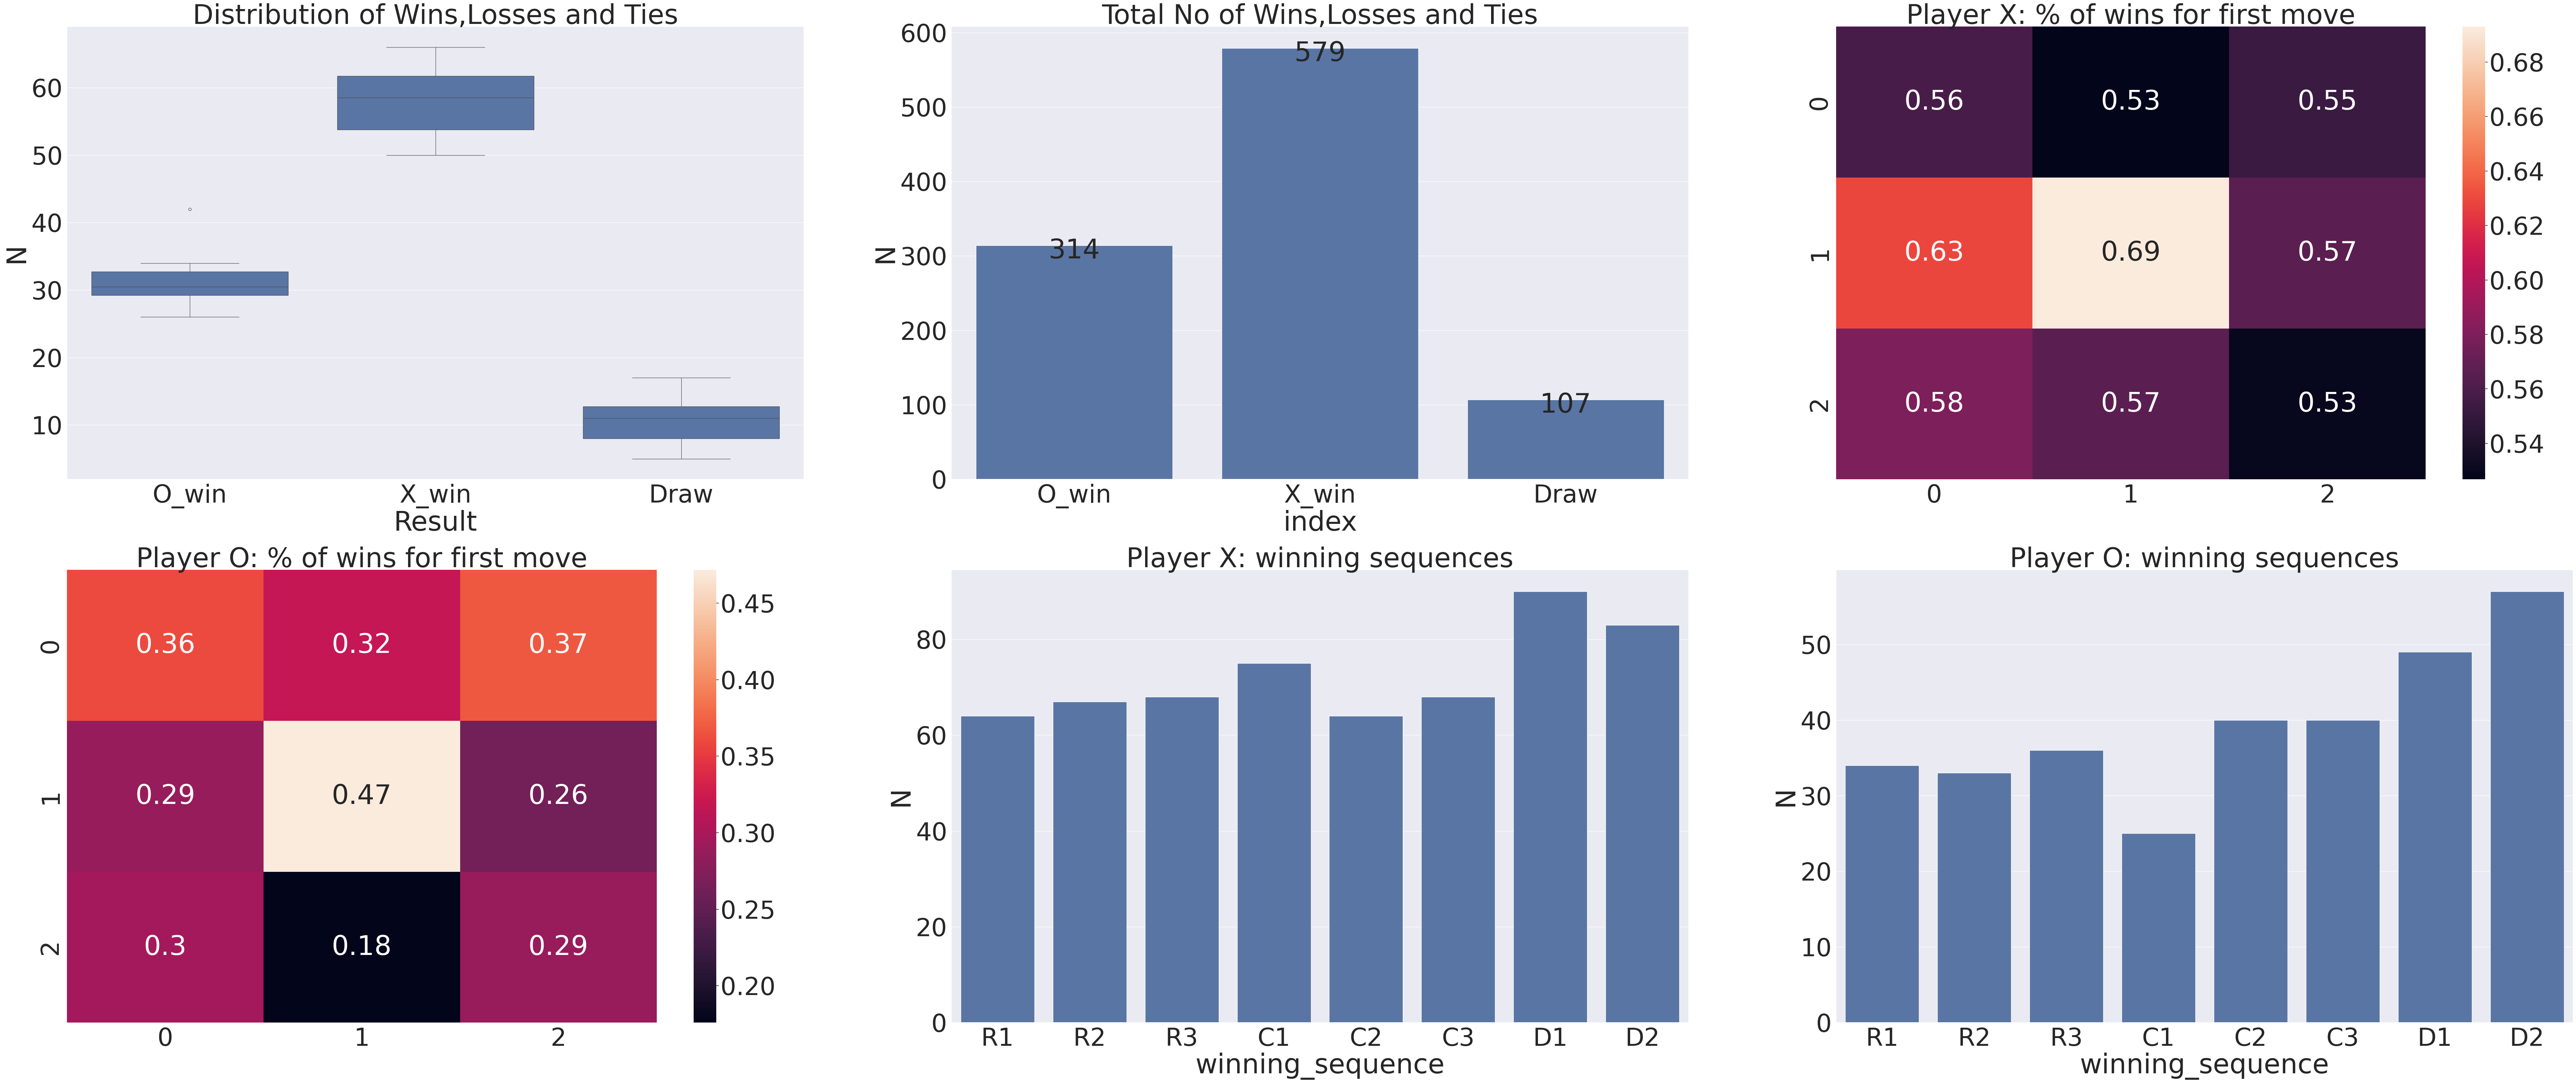

In [20]:
plot_results(win_statistics)

These results indicates that when both players are using a random policy, X wins a majority of games due to first mover advantage.

For both players, occupying the central square in the first move mazimizes the chances of winning.

Further, for both players, the winning sequence is most likely to be along the diagonal.

## Trained X vs Random O

Now we will create a function to train the agents using the Q-Learning algorithm.

100%|██████████| 5000/5000 [00:18<00:00, 274.52it/s]


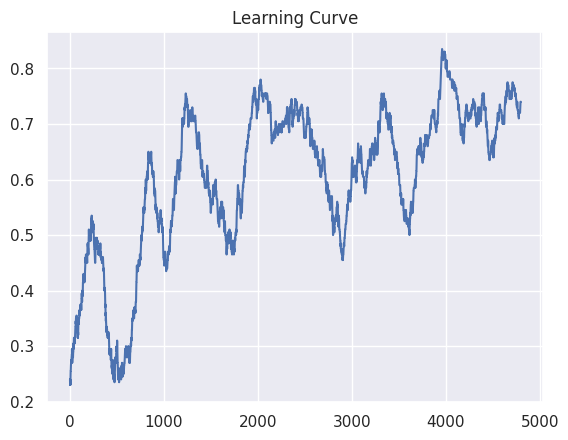

In [21]:
np.random.seed(1)
#,_,rewards_X,rewards_O = train(Q_X, Q_O,n_games=8000,alpha = 0.5, gamma = 0.9,train_X=True,train_O=False)
Q_X,_,rewards_X,rewards_O = train(n_games=5000,alpha = 0.5, gamma = 0.9,train_X=True,train_O=False,is_random=True)
Q_X_trained = Q_X

In [22]:
win_statistics = get_win_statistics(Q_X_trained,Q_O,sets = 10, games_in_set = 100,X_strategy = 'greedy', \
                                    O_strategy='eps_greedy',eps_X=1.0,eps_O=1.0)

 65%|██████▌   | 65/100 [00:00<00:00, 215.35it/s]

          
   X  X  3
   4  X  O
   O  O  X
          
   X  X  X
   O  X  O
   7  O  9
          
   X  X  X
   4  O  6
   O  X  O
          
   X  X  X
   X  O  O
   O  X  O
          
   X  O  O
   X  X  6
   X  8  O
          
   X  O  3
   X  5  6
   X  O  9
          
   X  2  X
   4  X  O
   X  O  O
          
   X  X  X
   O  X  6
   7  O  O
          
   X  O  O
   4  5  O
   X  X  X
          
   X  O  X
   O  X  O
   X  X  O
          
   X  X  3
   O  X  6
   O  O  X
          
   X  O  3
   X  O  O
   X  X  9
          
   X  X  X
   4  X  O
   O  8  O
          
   X  2  3
   O  O  O
   7  X  X
          
   X  O  3
   X  5  6
   X  O  9
          
   X  O  O
   4  X  6
   O  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  O  X
   X  O  O
   X  X  O
          
   X  2  O
   X  5  O
   X  8  9
          
   X  O  3
   O  O  6
   X  X  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  O
   4  X  6
   O  X  X
          
   X  O  X
   O  X  6

100%|██████████| 100/100 [00:00<00:00, 202.19it/s]


          
   X  X  X
   O  X  O
   7  O  9
          
   X  O  O
   X  O  X
   X  X  O
          
   X  O  3
   O  X  6
   O  X  X
          
   X  O  3
   O  O  6
   X  X  X
          
   X  X  X
   O  O  6
   O  8  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  3
   X  5  6
   X  O  9
          
   X  2  3
   X  O  O
   X  X  O
          
   X  2  O
   X  X  X
   O  8  O
          
   X  O  O
   O  X  X
   O  X  X
          
   X  2  3
   X  O  O
   X  X  O
          
   X  X  X
   O  5  6
   O  X  O
          
   X  2  O
   X  X  X
   7  O  O
          
   X  X  O
   4  X  6
   O  X  O
          
   X  O  O
   4  X  6
   O  X  X
          
   X  O  X
   O  X  O
   7  8  X
          
   X  O  O
   O  O  X
   X  X  X
          
   X  O  X
   4  X  O
   X  8  O
          
   X  O  X
   X  X  O
   O  O  X
          
   X  2  O
   4  X  O
   7  8  X
          
   X  2  O
   X  O  6
   X  8  9
          
   X  2  3
   O  X  6
   7  O  X
          
   X  2  3
   4  X  6

 38%|███▊      | 38/100 [00:00<00:00, 184.88it/s]

          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  2  O
   X  O  6
   X  8  9
          
   X  2  O
   X  O  O
   X  X  9
          
   X  X  O
   4  X  6
   O  X  O
          
   X  O  3
   X  5  6
   X  O  9
          
   X  O  X
   X  O  O
   O  X  X
          
   X  2  O
   X  X  6
   X  O  O
          
   X  X  X
   4  5  O
   O  X  O
          
   X  O  O
   X  5  6
   X  8  9
          
   X  2  O
   X  5  6
   X  8  O
          
   X  O  3
   X  O  6
   X  8  9
          
   X  X  X
   4  X  O
   O  8  O
          
   X  2  X
   O  X  6
   O  O  X
          
   X  O  3
   X  5  6
   X  O  9
          
   X  X  O
   4  X  6
   O  X  O
          
   X  O  3
   4  X  6
   7  O  X
          
   X  X  X
   O  O  6
   7  X  O
          
   X  O  O
   O  X  X
   O  X  X
          
   X  2  O
   O  O  6
   X  X  X
          
   X  O  O
   4  5  O
   X  X  X
          
   X  X  O
   4  X  O
   7  O  X
          
   X  2  O
   X  O  6

 76%|███████▌  | 76/100 [00:00<00:00, 180.59it/s]

          
   X  O  X
   X  X  O
   O  X  O
          
   X  O  X
   O  X  X
   X  O  O
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  X
   O  X  O
   X  X  O
          
   X  O  X
   4  X  O
   X  8  O
          
   X  2  X
   O  O  O
   X  O  X
          
   X  O  3
   X  5  6
   X  O  9
          
   X  2  O
   O  X  6
   X  O  X
          
   X  2  3
   4  X  6
   O  O  X
          
   X  O  X
   O  X  O
   7  8  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  3
   O  5  O
   X  X  X
          
   X  O  X
   O  X  O
   7  8  X
          
   X  O  X
   4  X  O
   X  8  O
          
   X  O  X
   O  X  6
   O  8  X
          
   X  X  X
   4  X  O
   7  O  O
          
   X  2  O
   X  O  6
   X  8  9
          
   X  X  O
   4  X  O
   7  O  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  X
   X  O  O
   O  X  X
          
   X  X  X
   O  X  O
   O  X  O
          
   X  X  O
   4  X  O
   O  X  9
          
   X  O  3
   X  O  6

100%|██████████| 100/100 [00:00<00:00, 178.65it/s]


          
   X  X  X
   4  X  O
   7  O  O
          
   X  2  X
   O  X  O
   X  8  O
          
   X  2  O
   X  X  O
   X  O  9
          
   X  O  X
   X  X  O
   O  O  X
          
   X  2  O
   X  X  X
   7  O  O
          
   X  2  O
   4  X  O
   7  8  X
          
   X  X  O
   4  X  O
   7  O  X
          
   X  O  X
   X  O  X
   O  X  O
          
   X  X  O
   O  X  X
   X  O  O
          
   X  X  3
   4  X  O
   O  O  X
          
   X  2  X
   O  O  O
   X  O  X
          
   X  2  3
   4  X  6
   O  O  X
          
   X  2  O
   X  X  X
   O  O  9
          
   X  O  O
   O  O  X
   X  X  X
          
   X  2  O
   O  5  O
   X  X  X
          
   X  O  X
   O  X  X
   O  X  O
          
   X  2  X
   O  X  6
   O  O  X
          
   X  O  X
   O  X  O
   X  X  O
          
   X  X  X
   4  X  O
   7  O  O
          
   X  X  3
   4  X  O
   O  O  X
          
   X  X  X
   O  X  O
   7  O  9
          
   X  O  3
   O  O  6
   X  X  X
          
   X  O  O
   X  5  X

  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  O  3
   X  O  O
   X  X  9
          
   X  O  O
   O  O  X
   X  X  X
          
   X  2  O
   4  X  O
   7  8  X
          
   X  2  3
   O  O  O
   X  8  X
          
   X  2  O
   X  5  O
   X  8  9
          
   X  2  O
   X  X  6
   X  O  O
          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  3
   X  O  6
   X  8  9
          
   X  O  O
   X  5  6
   X  8  9
          
   X  2  O
   4  X  O
   7  8  X
          
   X  O  3
   O  O  6
   X  X  X
          
   X  2  O
   4  O  X
   O  X  9
          
   X  2  O
   X  O  O
   X  X  9
          
   X  X  O
   4  X  O
   7  O  X


 40%|████      | 40/100 [00:00<00:00, 196.00it/s]

          
   X  X  X
   4  O  6
   O  X  O
          
   X  2  X
   O  X  O
   X  8  O
          
   X  X  X
   O  O  X
   O  X  O
          
   X  O  X
   4  X  O
   X  8  O
          
   X  2  3
   O  X  6
   7  O  X
          
   X  O  O
   X  O  6
   X  X  9
          
   X  O  X
   O  X  X
   X  O  O
          
   X  X  O
   4  X  O
   7  O  X
          
   X  2  O
   O  5  O
   X  X  X
          
   X  O  X
   O  X  X
   X  O  O
          
   X  2  O
   O  O  6
   X  X  X
          
   X  2  3
   4  X  6
   O  O  X
          
   X  O  3
   X  O  6
   X  X  O
          
   X  O  3
   O  X  O
   X  8  X
          
   X  2  O
   O  X  6
   O  X  X
          
   X  X  X
   O  O  X
   O  X  O
          
   X  O  O
   O  5  6
   X  X  X
          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  3
   4  X  6
   7  O  X
          
   X  2  3
   4  X  6
   O  O  X
          
   X  X  O
   4  X  O
   7  O  X
          
   X  O  X
   O  X  O

 60%|██████    | 60/100 [00:00<00:00, 187.62it/s]

          
   X  2  O
   X  X  O
   X  O  9
          
   X  O  3
   4  X  6
   7  O  X
          
   X  O  O
   O  X  X
   X  O  X
          
   X  O  3
   O  X  O
   X  8  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  X
   X  O  X
   O  X  O
          
   X  2  O
   X  O  O
   X  X  9
          
   X  O  X
   O  X  O
   X  X  O
          
   X  X  X
   O  O  X
   O  X  O
          
   X  O  O
   X  5  6
   X  8  9
          
   X  2  O
   X  O  X
   O  X  O
          
   X  O  X
   O  X  O
   X  X  O


 81%|████████  | 81/100 [00:00<00:00, 192.84it/s]

          
   X  X  X
   O  5  6
   O  X  O
          
   X  X  3
   O  X  6
   O  O  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  3
   X  X  O
   X  8  O
          
   X  2  O
   O  O  6
   X  X  X
          
   X  X  X
   4  X  O
   7  O  O
          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  3
   X  O  6
   X  8  9
          
   X  X  X
   4  X  O
   O  8  O
          
   X  2  X
   4  X  O
   X  O  O
          
   X  O  3
   4  X  6
   7  O  X
          
   X  2  O
   O  X  6
   X  O  X
          
   X  X  3
   O  X  6
   O  O  X
          
   X  2  3
   4  X  6
   O  O  X
          
   X  2  O
   X  X  6
   X  O  O
          
   X  O  O
   X  5  6
   X  8  9
          
   X  X  O
   4  O  X
   O  X  O
          
   X  X  O
   4  X  O
   O  X  9
          
   X  2  O
   X  5  O
   X  8  9
          
   X  X  X
   4  O  O
   7  X  O
          
   X  X  X
   O  O  6
   7  X  O
          
   X  2  O
   O  X  6
   X  O  X
          
   X  2  X
   O  X  6

100%|██████████| 100/100 [00:00<00:00, 183.61it/s]

          
   X  X  X
   O  X  O
   O  X  O
          
   X  2  X
   4  X  O
   X  O  O
          
   X  O  3
   4  X  O
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  X  3
   O  X  O
   O  X  9
          
   X  2  O
   O  O  6
   X  X  X



 21%|██        | 21/100 [00:00<00:00, 200.10it/s]

          
   X  X  X
   O  X  O
   7  O  9
          
   X  X  X
   4  X  O
   7  O  O
          
   X  O  O
   O  O  X
   X  X  X
          
   X  O  3
   X  O  6
   X  8  9
          
   X  X  O
   4  X  O
   O  X  9
          
   X  O  X
   X  X  O
   O  O  X
          
   X  2  O
   4  O  X
   O  X  9
          
   X  O  3
   X  O  O
   X  X  9
          
   X  O  O
   X  X  6
   7  O  X
          
   X  X  X
   4  O  6
   O  X  O
          
   X  X  X
   4  5  O
   O  X  O
          
   X  O  3
   X  O  O
   X  X  9
          
   X  X  O
   O  X  O
   7  8  X
          
   X  O  O
   O  O  X
   X  X  X
          
   X  X  X
   4  O  O
   7  X  O
          
   X  2  O
   O  O  6
   X  X  X
          
   X  2  O
   O  5  O
   X  X  X
          
   X  O  3
   X  O  6
   X  8  9
          
   X  2  X
   O  X  O
   O  8  X
          
   X  X  O
   4  X  O
   O  X  9
          
   X  2  3
   O  X  O
   O  X  X
          
   X  O  3
   O  O  6
   X  X  X
          
   X  2  O
   X  5  6

 42%|████▏     | 42/100 [00:00<00:00, 202.48it/s]

          
   X  O  3
   X  O  X
   X  8  O
          
   X  2  O
   X  O  6
   X  8  9
          
   X  O  3
   O  5  O
   X  X  X
          
   X  2  O
   O  X  6
   O  X  X
          
   X  X  X
   O  5  6
   O  X  O
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  3
   X  O  X
   X  8  O
          
   X  2  O
   X  X  O
   X  O  9
          
   X  X  X
   O  5  6
   O  X  O
          
   X  O  X
   O  X  X
   X  O  O
          
   X  2  O
   X  X  6
   X  O  O
          
   X  2  3
   O  X  O
   O  X  X
          
   X  2  O
   O  O  6
   X  X  X
          
   X  O  3
   X  X  6
   X  O  O
          
   X  2  O
   X  X  6
   X  O  O
          
   X  2  O
   O  X  6
   X  O  X
          
   X  X  O
   4  X  6
   O  X  O
          
   X  2  3
   O  X  6
   7  O  X
          
   X  O  3
   4  X  6
   7  O  X
          
   X  2  O
   X  X  6
   X  O  O


 63%|██████▎   | 63/100 [00:00<00:00, 193.57it/s]

          
   X  2  O
   O  O  6
   X  X  X
          
   X  O  X
   4  X  O
   X  8  O
          
   X  X  O
   4  X  O
   7  O  X
          
   X  X  O
   4  X  6
   O  X  O
          
   X  O  X
   X  X  O
   O  X  O
          
   X  O  3
   X  5  6
   X  O  9
          
   X  O  3
   O  X  O
   X  8  X
          
   X  X  X
   4  X  O
   7  O  O
          
   X  O  3
   X  O  6
   X  8  9
          
   X  O  O
   O  X  X
   X  X  O
          
   X  O  O
   4  5  O
   X  X  X
          
   X  2  O
   X  O  6
   X  8  9
          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  X
   4  X  O
   O  8  X
          
   X  O  3
   4  X  6
   7  O  X
          
   X  2  O
   O  O  6
   X  X  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  3
   X  O  O
   X  X  9
          
   X  X  3
   4  X  O
   O  O  X
          
   X  O  3
   O  O  6
   X  X  X
          
   X  O  3
   O  X  O
   X  8  X
          
   X  2  O
   O  X  6
   X  O  X
          
   X  X  X
   O  O  6

100%|██████████| 100/100 [00:00<00:00, 198.38it/s]


          
   X  O  X
   4  X  O
   O  8  X
          
   X  O  3
   O  5  O
   X  X  X
          
   X  O  X
   O  X  O
   X  X  O
          
   X  O  X
   X  O  O
   O  X  X
          
   X  2  O
   X  X  X
   7  O  O
          
   X  O  3
   X  O  X
   X  8  O
          
   X  2  O
   X  O  6
   O  X  9
          
   X  O  3
   4  X  6
   7  O  X
          
   X  X  X
   4  X  O
   7  O  O
          
   X  2  O
   O  X  6
   X  O  X
          
   X  O  3
   O  5  O
   X  X  X
          
   X  2  O
   X  O  6
   O  X  9
          
   X  X  3
   O  X  O
   O  X  9
          
   X  X  X
   O  X  O
   O  X  O
          
   X  2  3
   O  X  6
   7  O  X
          
   X  X  3
   4  X  O
   O  O  X
          
   X  O  3
   X  5  6
   X  O  9



 22%|██▏       | 22/100 [00:00<00:00, 217.97it/s]

          
   X  X  X
   4  X  O
   7  O  O
          
   X  O  3
   4  X  O
   O  X  X
          
   X  O  X
   O  X  6
   X  8  O
          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  3
   X  X  O
   X  8  O
          
   X  O  3
   X  O  6
   X  8  9
          
   X  O  X
   O  X  X
   X  O  O
          
   X  O  3
   X  X  6
   X  O  O
          
   X  O  O
   4  5  O
   X  X  X
          
   X  2  3
   O  X  O
   O  X  X
          
   X  O  X
   4  X  O
   X  8  O
          
   X  2  O
   X  5  O
   X  8  9
          
   X  2  3
   4  X  O
   O  8  X
          
   X  2  O
   X  O  O
   X  X  9
          
   X  X  O
   4  X  O
   7  O  X
          
   X  O  X
   X  O  O
   O  X  X
          
   X  2  3
   4  X  O
   O  8  X
          
   X  2  X
   O  X  O
   X  8  O
          
   X  2  O
   X  O  6
   X  8  9
          
   X  2  O
   X  5  6
   X  8  O
          
   X  2  O
   X  O  6
   O  X  9
          
   X  2  O
   O  X  O
   X  X  O


 44%|████▍     | 44/100 [00:00<00:00, 193.15it/s]

          
   X  O  X
   O  X  X
   X  O  O
          
   X  2  O
   4  X  O
   7  8  X
          
   X  X  X
   4  O  6
   O  X  O
          
   X  O  X
   X  X  O
   O  O  X
          
   X  X  X
   O  X  O
   7  8  O
          
   X  O  O
   X  5  6
   X  8  9
          
   X  X  X
   X  O  O
   O  X  O
          
   X  X  X
   X  O  O
   O  X  O
          
   X  O  3
   O  X  6
   O  X  X
          
   X  X  O
   O  X  O
   X  O  X
          
   X  2  O
   X  O  O
   X  X  9
          
   X  2  O
   O  O  6
   X  X  X
          
   X  O  X
   O  X  X
   X  O  O
          
   X  O  X
   X  X  O
   O  X  O
          
   X  O  O
   4  5  O
   X  X  X
          
   X  2  3
   4  X  6
   O  O  X
          
   X  O  X
   X  O  X
   O  X  O
          
   X  2  O
   X  O  X
   O  X  O
          
   X  O  O
   X  X  6
   X  8  O
          
   X  O  X
   X  X  O
   X  O  O
          
   X  2  O
   O  X  6
   O  X  X
          
   X  O  X
   O  X  X
   O  X  O


 64%|██████▍   | 64/100 [00:00<00:00, 177.21it/s]

          
   X  2  O
   O  X  6
   O  X  X
          
   X  X  X
   O  X  6
   7  O  O
          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  3
   X  X  6
   X  O  O
          
   X  2  O
   X  X  6
   X  O  O
          
   X  O  3
   X  5  6
   X  O  9
          
   X  2  3
   4  X  6
   O  O  X
          
   X  2  O
   O  O  6
   X  X  X
          
   X  2  O
   X  X  O
   X  O  9
          
   X  2  X
   4  X  O
   X  O  O
          
   X  O  3
   4  X  6
   7  O  X
          
   X  O  X
   X  O  O
   X  X  O
          
   X  O  X
   X  O  X
   O  X  O
          
   X  2  O
   O  O  6
   X  X  X
          
   X  O  3
   X  O  6
   X  8  9
          
   X  O  X
   O  X  O
   X  X  O
          
   X  2  3
   4  X  O
   O  8  X
          
   X  O  X
   X  X  O
   O  X  O
          
   X  X  O
   O  X  X
   O  X  O
          
   X  2  3
   O  X  6
   7  O  X
          
   X  O  3
   4  X  6
   7  O  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  X  X
   O  X  O

 84%|████████▍ | 84/100 [00:00<00:00, 182.73it/s]


          
   X  O  X
   O  X  X
   X  O  O
          
   X  2  3
   4  X  O
   O  8  X
          
   X  X  O
   O  X  X
   X  O  O
          
   X  X  X
   O  X  O
   O  X  O
          
   X  O  X
   X  O  O
   O  X  X
          
   X  X  X
   O  X  O
   7  O  9
          
   X  O  O
   O  5  6
   X  X  X
          
   X  2  O
   X  O  6
   X  8  9
          
   X  O  X
   O  X  X
   X  O  O
          
   X  O  O
   4  X  6
   O  X  X
          
   X  2  O
   X  5  6
   X  8  O
          
   X  O  3
   X  O  6
   X  8  9
          
   X  O  X
   4  X  O
   X  8  O
          
   X  O  X
   O  X  6
   X  8  O
          
   X  O  3
   O  X  O
   X  8  X
          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  X  X
   O  X  O
   7  8  O
          
   X  2  O
   X  O  6
   X  8  9
          
   X  O  3
   O  X  6
   O  X  X
          
   X  2  O
   O  X  6
   O  X  X
          
   X  X  X
   O  X  O
   7  8  O
          
   X  2  O
   X  X  

100%|██████████| 100/100 [00:00<00:00, 186.56it/s]


          
   X  2  3
   O  X  O
   O  X  X
          
   X  O  X
   4  X  O
   O  8  X
          
   X  O  3
   X  O  O
   X  X  9


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  2  O
   X  5  6
   X  8  O
          
   X  2  O
   X  5  6
   X  8  O
          
   X  2  3
   X  O  O
   X  X  O
          
   X  2  O
   4  X  O
   7  8  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  3
   O  X  6
   O  X  X
          
   X  O  O
   O  X  X
   X  X  O
          
   X  O  X
   X  O  O
   O  X  X
          
   X  2  O
   O  O  6
   X  X  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  3
   X  X  6
   X  O  O
          
   X  O  3
   O  5  O
   X  X  X
          
   X  O  3
   4  X  6
   7  O  X
          
   X  O  X
   X  X  O
   X  O  O
          
   X  X  O
   O  X  X
   X  O  O
          
   X  O  X
   O  X  6
   X  8  O
          
   X  X  O
   O  X  X
   X  O  O
          
   X  X  O
   O  X  O
   X  O  X
          
   X  O  X
   O  X  O
   X  X  O


 42%|████▏     | 42/100 [00:00<00:00, 200.28it/s]

          
   X  X  3
   4  X  O
   O  O  X
          
   X  2  X
   4  X  O
   X  O  O
          
   X  O  3
   4  X  6
   7  O  X
          
   X  O  3
   O  5  O
   X  X  X
          
   X  O  3
   4  X  6
   7  O  X
          
   X  2  O
   X  O  6
   X  8  9
          
   X  2  O
   O  X  6
   X  O  X
          
   X  2  3
   O  X  O
   O  X  X
          
   X  O  3
   X  X  6
   X  O  O
          
   X  X  O
   O  X  O
   X  O  X
          
   X  O  X
   O  X  O
   X  X  O
          
   X  O  3
   4  X  6
   7  O  X
          
   X  X  X
   4  O  O
   7  X  O
          
   X  O  X
   X  O  X
   O  X  O
          
   X  X  X
   4  O  6
   O  X  O
          
   X  O  3
   O  O  6
   X  X  X
          
   X  2  O
   O  X  6
   O  X  X
          
   X  2  O
   X  X  6
   X  O  O
          
   X  O  O
   X  X  X
   7  8  O
          
   X  2  3
   4  X  O
   O  8  X
          
   X  2  X
   4  X  O
   X  O  O
          
   X  2  3
   4  X  6
   O  O  X
          
   X  O  X
   X  X  O

100%|██████████| 100/100 [00:00<00:00, 193.92it/s]


          
   X  O  O
   O  O  X
   X  X  X
          
   X  2  O
   X  O  X
   O  X  O
          
   X  2  3
   4  X  O
   O  8  X
          
   X  X  X
   X  O  O
   O  X  O
          
   X  2  X
   O  X  O
   O  8  X
          
   X  O  O
   O  O  X
   X  X  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  3
   O  O  6
   X  X  X
          
   X  X  3
   4  X  O
   O  O  X
          
   X  2  O
   X  5  6
   X  8  O
          
   X  2  3
   O  X  O
   O  X  X
          
   X  2  O
   4  X  O
   7  8  X
          
   X  X  X
   4  5  O
   O  X  O
          
   X  O  O
   X  5  6
   X  8  9
          
   X  X  O
   O  X  X
   X  O  O
          
   X  O  O
   O  X  X
   X  O  X
          
   X  O  3
   X  O  6
   X  X  O
          
   X  2  O
   X  X  O
   X  O  9
          
   X  X  X
   4  X  O
   7  O  O
          
   X  X  O
   O  O  X
   X  X  O
          
   X  O  X
   O  X  6
   O  8  X
          
   X  2  O
   X  O  6
   X  8  9
          
   X  2  O
   O  X  


 42%|████▏     | 42/100 [00:00<00:00, 186.29it/s]

          
   X  O  O
   X  X  X
   X  O  O
          
   X  O  3
   X  O  O
   X  X  9
          
   X  O  X
   O  O  X
   O  X  X
          
   X  X  X
   X  O  O
   O  X  O
          
   X  X  O
   4  X  6
   O  X  O
          
   X  O  X
   X  X  O
   O  X  O
          
   X  2  3
   4  X  6
   O  O  X
          
   X  O  X
   X  O  X
   O  X  O
          
   X  2  O
   4  O  X
   O  X  9
          
   X  2  O
   X  X  X
   O  8  O
          
   X  X  X
   4  X  O
   7  O  O
          
   X  2  O
   O  O  6
   X  X  X
          
   X  X  O
   4  X  O
   O  X  9
          
   X  2  O
   O  X  O
   X  X  O
          
   X  O  3
   X  O  6
   X  8  9
          
   X  2  3
   4  X  6
   O  O  X
          
   X  2  O
   O  O  6
   X  X  X
          
   X  O  X
   O  X  6
   O  8  X
          
   X  2  3
   O  X  6
   7  O  X
          
   X  X  X
   4  X  O
   7  O  O
          
   X  2  O
   X  X  X
   O  O  9
          
   X  X  X
   O  O  X
   O  X  O
          
   X  O  3
   4  X  O

 84%|████████▍ | 84/100 [00:00<00:00, 199.93it/s]

          
   X  O  3
   O  O  6
   X  X  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  X  O
   O  X  X
   X  O  O
          
   X  2  3
   O  X  6
   7  O  X
          
   X  2  3
   X  O  O
   X  X  O
          
   X  2  O
   O  X  6
   X  O  X
          
   X  X  X
   4  X  O
   7  O  O
          
   X  O  3
   4  X  O
   O  X  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  2  O
   O  X  6
   X  O  X
          
   X  O  X
   O  X  6
   X  8  O
          
   X  O  O
   O  X  X
   O  X  X
          
   X  O  O
   O  X  X
   O  X  X
          
   X  O  X
   O  X  O
   X  X  O
          
   X  O  3
   4  X  6
   7  O  X
          
   X  2  O
   O  5  O
   X  X  X
          
   X  X  X
   O  X  O
   7  O  9
          
   X  O  3
   X  X  6
   X  O  O
          
   X  O  3
   X  5  6
   X  O  9
          
   X  O  O
   O  O  X
   X  X  X
          
   X  O  3
   O  5  O
   X  X  X
          
   X  O  O
   X  O  6
   X  X  9
          
   X  O  3
   X  X  O

100%|██████████| 100/100 [00:00<00:00, 194.05it/s]


          
   X  X  X
   O  O  X
   O  X  O
          
   X  X  3
   O  X  6
   O  O  X
          
   X  X  X
   X  O  O
   O  X  O
          
   X  2  3
   X  O  O
   X  X  O
          
   X  O  O
   4  X  6
   O  X  X
          
   X  2  O
   O  X  6
   O  X  X
          
   X  2  X
   4  X  O
   X  O  O
          
   X  2  3
   O  O  O
   X  8  X
          
   X  2  O
   X  5  O
   X  8  9
          
   X  O  O
   X  X  6
   X  8  O
          
   X  X  X
   O  O  6
   O  8  X
          
   X  O  X
   O  X  O
   X  X  O
          
   X  X  X
   O  O  6
   O  8  X
          
   X  2  O
   X  5  6
   X  8  O
          
   X  2  X
   O  O  O
   X  O  X
          
   X  O  O
   O  O  X
   X  X  X


 19%|█▉        | 19/100 [00:00<00:00, 186.08it/s]

          
   X  O  3
   X  5  6
   X  O  9
          
   X  2  O
   X  O  X
   O  X  O
          
   X  O  X
   4  X  O
   O  8  X
          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  X
   O  O  X
   X  X  O
          
   X  O  X
   X  O  X
   O  X  O
          
   X  2  O
   X  X  X
   O  8  O
          
   X  O  3
   X  X  O
   X  8  O
          
   X  2  3
   4  X  6
   O  O  X
          
   X  O  O
   O  O  X
   X  X  X
          
   X  X  X
   O  O  X
   O  X  O
          
   X  2  O
   O  5  O
   X  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  2  O
   X  O  6
   O  X  9
          
   X  2  O
   X  X  X
   O  8  O
          
   X  X  X
   O  O  X
   O  X  O
          
   X  O  O
   X  O  6
   X  X  9
          
   X  X  X
   X  O  O
   O  X  O
          
   X  O  3
   O  X  6
   O  X  X
          
   X  2  O
   4  X  O
   7  8  X
          
   X  2  X
   4  X  O
   X  O  O


 39%|███▉      | 39/100 [00:00<00:00, 192.47it/s]

          
   X  O  X
   X  O  O
   X  X  O
          
   X  2  O
   X  O  6
   O  X  9
          
   X  2  O
   X  O  6
   X  8  9
          
   X  O  O
   O  O  X
   X  X  X
          
   X  2  O
   X  O  X
   O  X  O
          
   X  2  O
   X  O  X
   O  X  O
          
   X  O  3
   X  X  6
   X  O  O
          
   X  X  O
   O  X  X
   O  X  O
          
   X  O  3
   4  X  O
   O  X  X
          
   X  O  3
   X  O  6
   X  8  9
          
   X  X  3
   O  X  6
   O  O  X
          
   X  O  X
   X  X  O
   O  X  O
          
   X  O  X
   O  O  X
   O  X  X
          
   X  X  X
   4  X  O
   7  O  O
          
   X  2  O
   O  5  O
   X  X  X
          
   X  2  O
   O  5  O
   X  X  X
          
   X  2  O
   X  X  6
   X  O  O
          
   X  O  X
   X  O  O
   X  X  O


 60%|██████    | 60/100 [00:00<00:00, 197.88it/s]

          
   X  2  O
   O  X  6
   X  O  X
          
   X  X  O
   O  X  X
   O  X  O
          
   X  2  O
   X  X  X
   O  O  9
          
   X  X  O
   4  X  O
   7  O  X
          
   X  O  X
   O  O  X
   X  X  O
          
   X  O  3
   X  O  6
   X  8  9
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  3
   X  O  O
   X  X  9
          
   X  O  3
   O  O  6
   X  X  X
          
   X  X  X
   4  X  O
   7  O  O
          
   X  O  O
   X  5  6
   X  8  9
          
   X  2  O
   X  X  6
   X  O  O
          
   X  X  O
   O  X  X
   X  O  O
          
   X  O  3
   O  O  6
   X  X  X
          
   X  O  O
   X  5  X
   X  8  O
          
   X  O  3
   O  X  6
   O  X  X
          
   X  2  O
   4  O  X
   O  X  9
          
   X  2  O
   4  X  O
   7  8  X
          
   X  O  O
   4  X  6
   O  X  X
          
   X  O  3
   O  O  6
   X  X  X
          
   X  O  X
   O  X  X
   O  X  O
          
   X  2  O
   X  O  6
   X  8  9
          
   X  O  X
   O  X  O

100%|██████████| 100/100 [00:00<00:00, 184.31it/s]

          
   X  O  3
   O  5  O
   X  X  X
          
   X  X  X
   O  X  O
   7  O  9
          
   X  O  3
   X  X  O
   X  8  O
          
   X  O  X
   O  O  X
   O  X  X
          
   X  X  X
   O  X  O
   O  X  O
          
   X  O  O
   X  5  6
   X  8  9
          
   X  2  O
   O  X  6
   O  X  X
          
   X  X  O
   O  X  X
   X  O  O
          
   X  O  O
   O  X  X
   O  X  X
          
   X  O  3
   O  O  6
   X  X  X
          
   X  O  3
   X  X  6
   X  O  O
          
   X  2  O
   X  5  6
   X  8  O
          
   X  O  X
   4  X  O
   X  8  O
          
   X  2  X
   O  X  O
   O  8  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  3
   X  X  O
   X  8  O
          
   X  O  X
   O  X  O
   X  X  O
          
   X  O  3
   X  O  6
   X  X  O
          
   X  O  3
   X  O  6
   X  8  9
          
   X  X  X
   4  X  O
   7  O  O
          
   X  X  X
   O  X  O


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  2  X
   4  X  O
   X  O  O
          
   X  2  O
   4  X  O
   7  8  X
          
   X  O  3
   X  O  6
   X  8  9
          
   X  2  O
   X  O  O
   X  X  9
          
   X  2  3
   4  X  O
   O  8  X
          
   X  2  3
   4  X  6
   O  O  X
          
   X  X  3
   O  X  O
   O  X  9
          
   X  O  X
   O  X  6
   X  8  O
          
   X  O  O
   X  5  X
   X  8  O
          
   X  O  O
   O  O  X
   X  X  X
          
   X  O  X
   O  X  X
   X  O  O
          
   X  X  3
   O  O  O
   O  X  X
          
   X  2  O
   O  O  6
   X  X  X
          
   X  X  O
   4  X  O
   7  O  X
          
   X  X  O
   4  X  O
   7  O  X
          
   X  2  O
   X  O  X
   O  X  O
          
   X  O  3
   X  O  6
   X  8  9
          
   X  2  O
   X  5  O
   X  8  9
          
   X  O  O
   X  5  6
   X  8  9


 43%|████▎     | 43/100 [00:00<00:00, 208.65it/s]

          
   X  O  X
   X  X  O
   X  O  O
          
   X  2  X
   O  X  O
   X  8  O
          
   X  2  O
   X  O  6
   O  X  9
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  X
   O  O  X
   O  X  X
          
   X  X  X
   O  X  O
   7  O  9
          
   X  X  X
   X  O  O
   O  X  O
          
   X  X  3
   4  X  O
   O  O  X
          
   X  2  O
   X  X  O
   X  O  9
          
   X  X  X
   O  O  X
   O  X  O
          
   X  X  X
   4  X  O
   O  8  O
          
   X  2  O
   X  5  O
   X  8  9
          
   X  X  X
   4  X  O
   7  O  O
          
   X  O  3
   O  5  O
   X  X  X
          
   X  O  3
   X  5  6
   X  O  9
          
   X  X  X
   4  X  O
   7  O  O
          
   X  2  O
   X  5  6
   X  8  O
          
   X  2  O
   X  X  X
   O  O  9
          
   X  O  X
   X  X  O
   O  X  O
          
   X  O  3
   X  O  6
   X  X  O
          
   X  2  O
   X  X  X
   O  8  O
          
   X  X  X
   O  O  X
   O  X  O
          
   X  O  3
   4  X  6

 64%|██████▍   | 64/100 [00:00<00:00, 200.10it/s]

          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  O
   O  X  X
   X  X  O
          
   X  O  3
   O  5  O
   X  X  X
          
   X  2  3
   4  X  O
   O  8  X
          
   X  2  3
   O  X  6
   7  O  X
          
   X  X  X
   O  X  6
   7  O  O
          
   X  X  O
   O  X  O
   X  O  X
          
   X  2  O
   X  O  6
   X  8  9
          
   X  O  3
   O  5  O
   X  X  X
          
   X  X  X
   X  O  O
   O  X  O
          
   X  2  O
   O  O  6
   X  X  X
          
   X  2  O
   4  X  O
   7  8  X
          
   X  O  O
   O  5  6
   X  X  X
          
   X  2  O
   X  O  O
   X  X  9
          
   X  O  X
   O  X  X
   X  O  O
          
   X  2  O
   X  5  O
   X  8  9
          
   X  O  X
   X  X  O
   O  X  O
          
   X  X  X
   O  X  O
   O  X  O
          
   X  O  3
   O  O  6
   X  X  X
          
   X  2  O
   X  O  6
   X  8  9


100%|██████████| 100/100 [00:00<00:00, 201.46it/s]

          
   X  X  X
   4  X  O
   7  O  O
          
   X  2  3
   O  X  6
   7  O  X
          
   X  2  O
   X  O  6
   X  8  9
          
   X  O  O
   O  O  X
   X  X  X
          
   X  O  O
   O  O  X
   X  X  X
          
   X  O  O
   X  X  X
   7  8  O
          
   X  O  3
   O  O  6
   X  X  X
          
   X  2  3
   4  X  O
   O  8  X
          
   X  2  3
   4  X  6
   O  O  X
          
   X  X  X
   4  X  O
   7  O  O
          
   X  2  O
   X  X  X
   O  O  9
          
   X  2  X
   4  X  O
   X  O  O
          
   X  X  X
   O  5  6
   O  X  O
          
   X  O  3
   4  X  O
   O  X  X
          
   X  X  O
   4  X  O
   O  X  9
          
   X  X  X
   O  O  6
   7  X  O
          
   X  O  3
   O  5  O
   X  X  X
          
   X  X  3
   4  X  O
   O  O  X
          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  3
   4  X  O
   O  X  X
          
   X  O  X
   X  O  O
   O  X  X
          
   X  X  3
   O  X  O
   O  X  9
          
   X  O  X
   O  X  6


 42%|████▏     | 42/100 [00:00<00:00, 206.31it/s]

          
   X  O  3
   O  5  O
   X  X  X
          
   X  O  O
   X  5  6
   X  8  9
          
   X  2  O
   X  O  6
   X  8  9
          
   X  O  O
   X  5  6
   X  8  9
          
   X  2  O
   O  X  6
   X  O  X
          
   X  O  3
   X  X  O
   X  8  O
          
   X  X  X
   4  X  O
   O  8  O
          
   X  X  X
   O  X  O
   7  O  9
          
   X  X  O
   4  X  O
   O  X  9
          
   X  O  X
   X  X  O
   O  X  O
          
   X  X  X
   4  X  O
   O  8  O
          
   X  O  3
   X  X  6
   X  O  O
          
   X  2  O
   X  5  6
   X  8  O
          
   X  X  O
   4  X  6
   O  X  O
          
   X  2  O
   X  O  O
   X  X  9
          
   X  O  X
   O  O  X
   X  X  O
          
   X  O  X
   X  X  O
   O  X  O
          
   X  2  O
   X  O  6
   O  X  9
          
   X  O  O
   X  5  6
   X  8  9
          
   X  O  O
   O  X  X
   X  O  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  O
   X  X  X
   7  O  O
          
   X  O  3
   X  O  6

100%|██████████| 100/100 [00:00<00:00, 199.41it/s]

          
   X  X  X
   4  O  6
   O  X  O
          
   X  O  X
   O  X  6
   O  8  X
          
   X  2  O
   X  O  6
   O  X  9
          
   X  2  O
   X  5  6
   X  8  O
          
   X  O  3
   X  5  6
   X  O  9
          
   X  2  3
   O  X  O
   O  X  X
          
   X  2  3
   O  X  6
   7  O  X
          
   X  2  O
   X  5  O
   X  8  9
          
   X  2  O
   X  O  6
   O  X  9
          
   X  2  X
   4  X  O
   X  O  O
          
   X  O  O
   X  5  6
   X  8  9
          
   X  2  O
   X  O  6
   O  X  9
          
   X  O  X
   X  X  O
   X  O  O
          
   X  O  3
   O  O  6
   X  X  X
          
   X  2  O
   X  O  X
   O  X  O
          
   X  2  O
   X  5  O
   X  8  9
          
   X  O  3
   X  5  6
   X  O  9
          
   X  2  O
   X  5  6
   X  8  O
          
   X  O  X
   O  O  X
   O  X  X
          
   X  X  X
   O  X  O
   O  X  O
          
   X  O  3
   4  X  O
   O  X  X
          
   X  O  X
   X  O  X
   O  X  O
          
   X  O  3
   4  X  6

<Figure size 640x480 with 0 Axes>

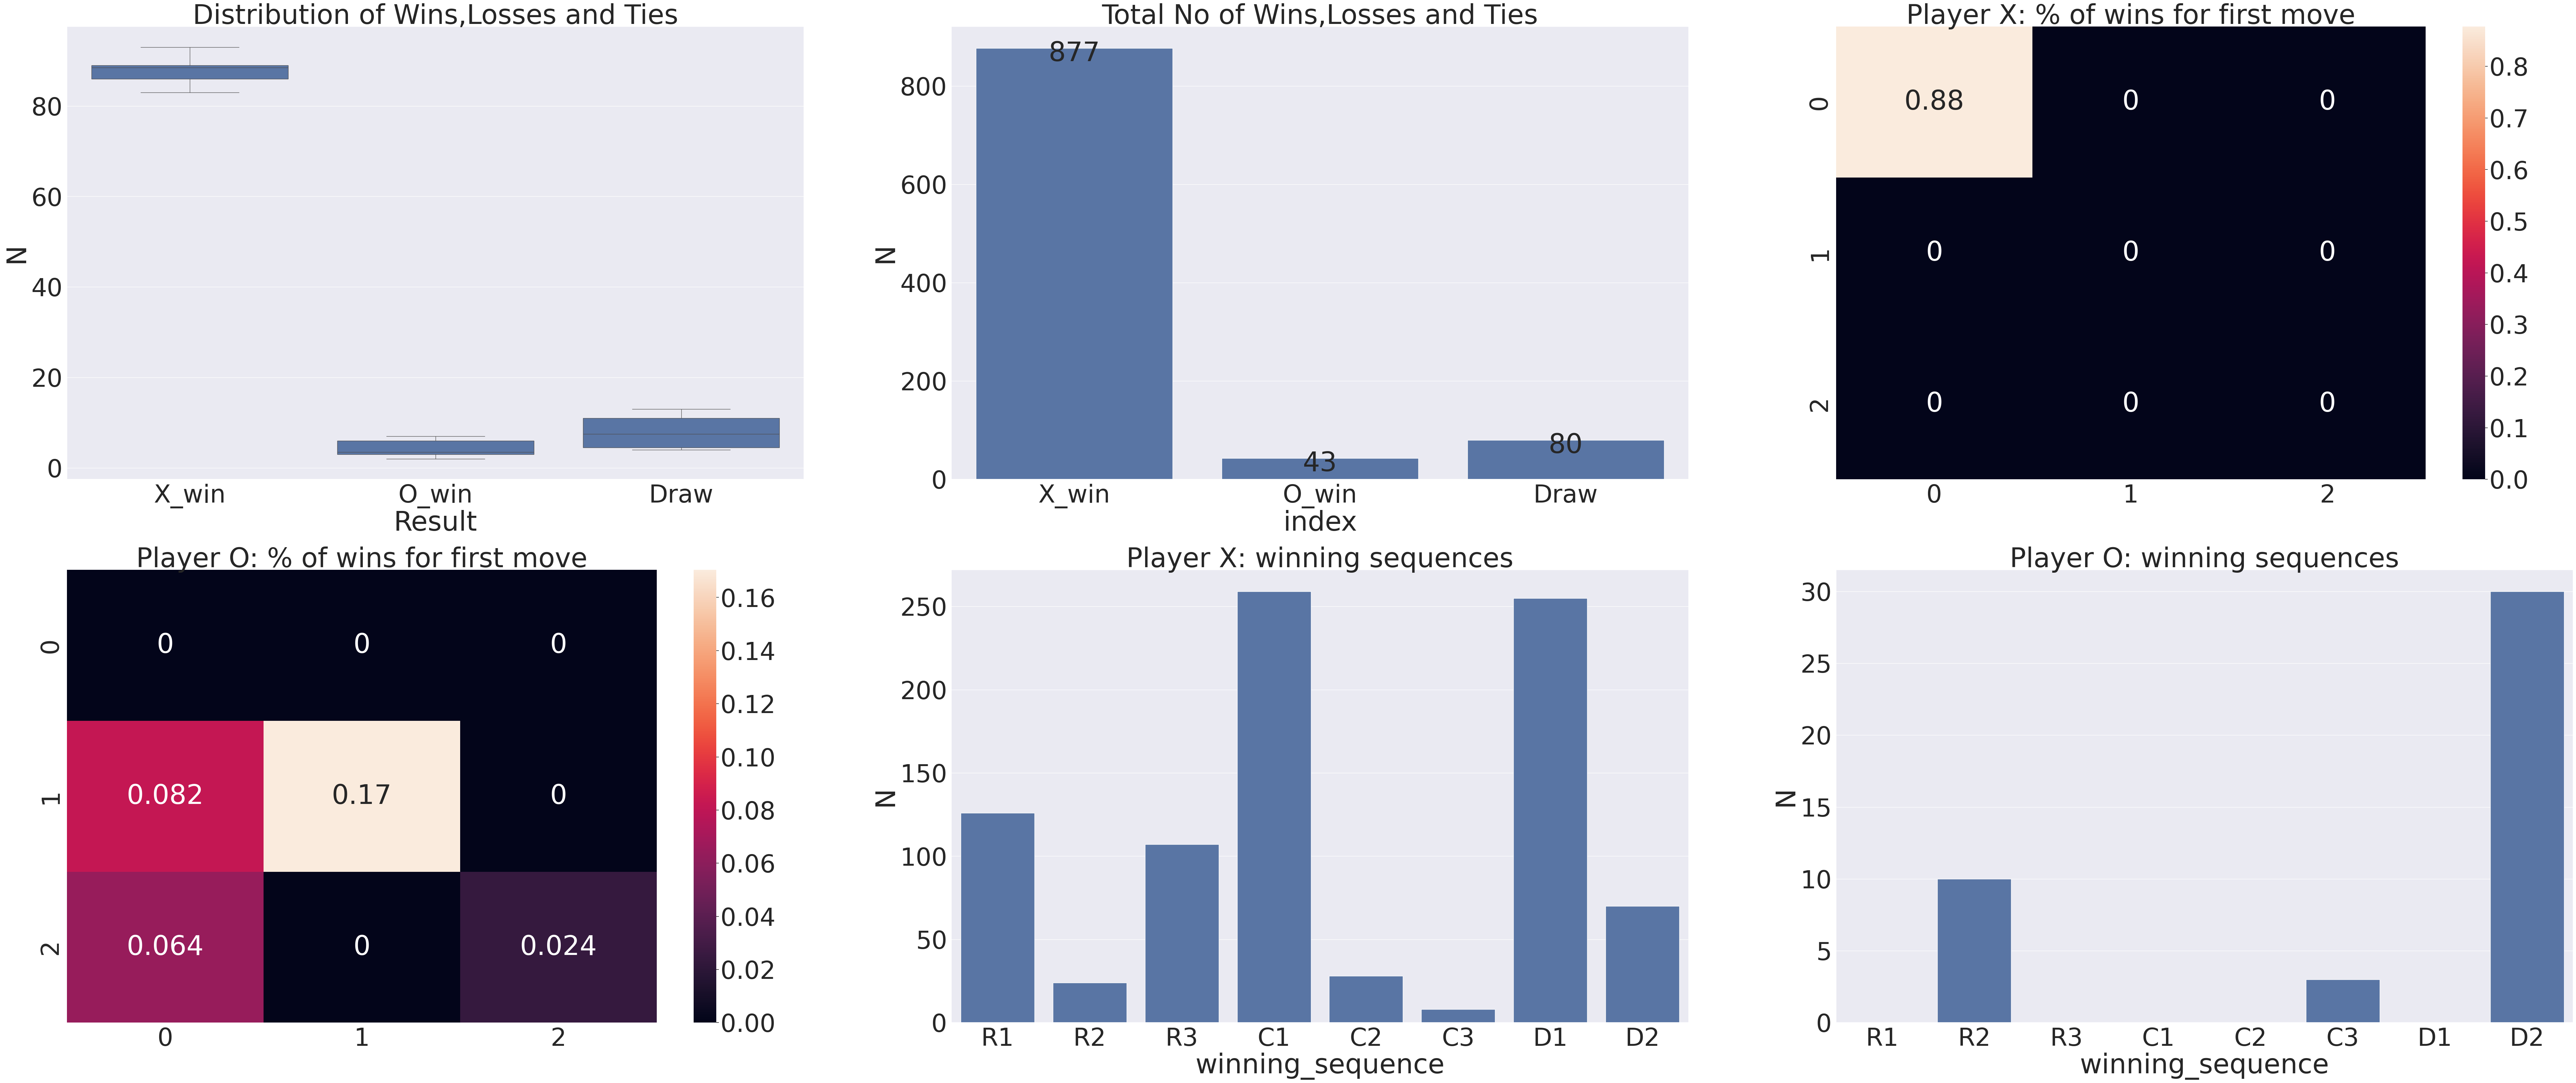

In [23]:
plot_results(win_statistics)

These results indicate that player X has learned to easily beat a random player O.
Player X consistently chooses the top right hand box and seem to win the majority of games through the right most column (C3) or the off diagonal(D2).

## Random X vs Trained O

Now we will train O to play against a random X

100%|██████████| 20000/20000 [01:08<00:00, 292.30it/s]


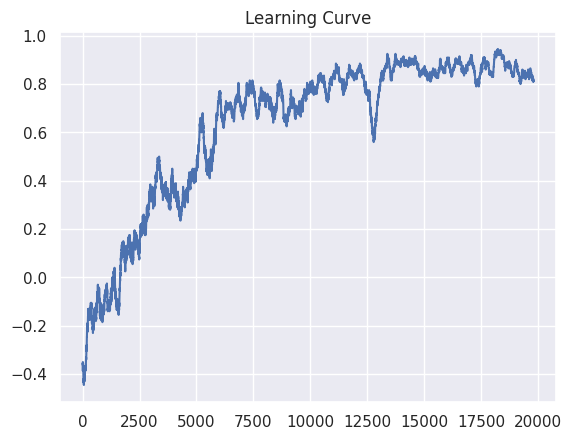

In [24]:
np.random.seed(1)
#,_,rewards_X,rewards_O = train(Q_X, Q_O,n_games=8000,alpha = 0.5, gamma = 0.9,train_X=True,train_O=False)
_,Q_O,rewards_X,rewards_O = train(n_games=20000,alpha = 0.5, gamma = 0.5,train_X=False,train_O=True,is_random=True)
Q_O_trained = Q_O

The learning curve indicates training has converged after about 15000 games.

In [25]:
win_statistics = get_win_statistics(Q_X,Q_O_trained,sets = 10, games_in_set = 100,X_strategy = 'eps_greedy',O_strategy='greedy',eps_X=1.0,
                   eps_O=1.0)

 22%|██▏       | 22/100 [00:00<00:00, 207.50it/s]

          
   X  X  O
   O  X  X
   X  O  O
          
   1  2  O
   X  O  X
   O  8  X
          
   1  2  X
   O  O  O
   X  8  X
          
   1  2  O
   X  X  O
   7  X  O
          
   X  X  X
   O  5  6
   7  O  9
          
   O  O  O
   4  X  X
   X  X  O
          
   X  O  O
   4  X  O
   X  X  O
          
   1  X  O
   4  O  X
   O  8  X
          
   1  X  X
   4  X  6
   O  O  O
          
   O  2  3
   X  O  X
   X  8  O
          
   X  2  3
   O  O  O
   X  X  9
          
   O  X  O
   X  O  X
   X  O  X
          
   X  2  3
   O  O  O
   X  X  9
          
   X  X  3
   O  O  O
   X  8  9
          
   1  O  X
   X  O  X
   7  O  9
          
   X  X  O
   X  O  O
   O  8  X
          
   1  X  X
   4  5  X
   O  O  O
          
   X  X  3
   4  X  6
   O  O  O
          
   X  X  3
   O  O  O
   X  8  9
          
   X  X  O
   X  O  6
   O  X  O
          
   X  2  O
   4  5  O
   X  X  O
          
   X  O  O
   O  X  X
   X  X  O
          
   X  O  X
   4  O  X

 67%|██████▋   | 67/100 [00:00<00:00, 208.17it/s]

          
   X  X  O
   4  O  O
   X  X  O
          
   1  2  O
   X  5  O
   X  X  O
          
   X  2  O
   X  X  O
   O  X  O
          
   1  O  3
   4  O  X
   X  O  X
          
   X  2  O
   X  5  O
   7  X  O
          
   X  X  O
   O  O  X
   X  X  O
          
   X  2  X
   O  O  O
   7  X  9
          
   X  2  O
   X  5  O
   X  O  X
          
   1  X  3
   X  5  X
   O  O  O
          
   1  2  X
   O  O  O
   X  8  X
          
   X  X  O
   O  X  X
   X  O  O
          
   O  X  X
   O  5  6
   O  8  X
          
   O  2  X
   X  O  6
   X  8  O
          
   X  O  X
   4  O  6
   X  O  9
          
   O  2  X
   X  O  6
   X  8  O
          
   X  X  O
   X  O  6
   O  X  O
          
   1  2  O
   X  X  O
   7  X  O
          
   1  X  3
   O  O  O
   X  8  X
          
   X  O  X
   X  O  O
   O  X  X
          
   O  2  3
   X  O  X
   7  X  O
          
   X  X  O
   4  O  O
   X  X  O
          
   1  X  O
   4  O  X
   O  8  X
          
   X  X  3
   O  O  O

100%|██████████| 100/100 [00:00<00:00, 193.51it/s]


          
   1  X  O
   4  O  X
   O  X  9
          
   X  O  X
   O  O  O
   7  X  X
          
   X  2  O
   X  O  O
   O  X  X
          
   X  X  X
   O  X  6
   O  8  O
          
   X  X  O
   O  O  6
   O  X  X
          
   X  X  O
   X  O  6
   O  X  O
          
   1  O  X
   X  O  X
   7  O  9
          
   X  X  O
   4  O  O
   X  X  O
          
   X  2  X
   O  X  X
   O  O  O
          
   1  O  X
   4  O  X
   X  O  9
          
   X  X  O
   X  O  O
   O  X  9
          
   O  2  3
   X  O  6
   X  X  O
          
   1  O  X
   X  O  X
   7  O  9
          
   X  O  X
   X  O  6
   7  O  9
          
   X  X  O
   O  X  O
   X  8  O
          
   1  2  X
   X  X  6
   O  O  O
          
   X  2  O
   X  O  X
   O  O  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  2  O
   X  5  O
   7  X  O
          
   O  X  X
   X  O  6
   7  8  O
          
   O  X  X
   X  O  X
   O  8  O
          
   O  O  X
   X  X  O
   X  O  X
          
   O  2  X
   4  O  X
   X  8  O
          
   O  X  X
   O  5  6
   O  8  X
          
   1  2  X
   O  O  O
   X  8  X
          
   X  2  O
   4  O  6
   O  X  X
          
   X  O  X
   O  O  X
   7  8  X
          
   O  O  O
   X  X  O
   7  X  X
          
   O  X  X
   O  O  O
   X  8  X
          
   1  O  3
   X  O  6
   X  O  X
          
   O  X  X
   4  O  6
   7  X  O
          
   X  O  X
   O  X  X
   O  X  O

 37%|███▋      | 37/100 [00:00<00:00, 183.23it/s]


          
   X  2  X
   O  O  O
   X  8  9
          
   X  O  X
   4  O  X
   X  O  O
          
   1  X  3
   4  X  X
   O  O  O
          
   X  X  O
   O  X  X
   X  O  O
          
   O  2  X
   O  X  X
   O  X  O
          
   X  X  O
   4  O  X
   O  O  X
          
   X  2  O
   X  5  O
   7  X  O
          
   1  2  X
   O  O  O
   X  8  X
          
   1  O  3
   X  O  6
   X  O  X
          
   O  2  X
   X  O  6
   X  8  O
          
   1  2  X
   O  O  O
   7  X  X
          
   X  O  3
   O  O  X
   X  O  X
          
   X  2  X
   O  X  X
   O  O  O
          
   X  2  O
   X  O  X
   O  O  X
          
   O  2  X
   4  O  X
   7  X  O
          
   X  2  O
   X  5  O
   X  O  X
          
   1  2  O
   4  O  X
   O  X  X
          
   X  X  O
   4  O  6
   O  8  X
          
   X  2  3
   O  O  O
   X  X  9
          
   1  O  3
   X  O  6
   X  O  X
          
   X  X  O
   X  X  O
   O  8  O
          
   1  O  X
   X  O  O
   X  O  X
          
   X  2  O
   X  5  

 56%|█████▌    | 56/100 [00:00<00:00, 183.52it/s]

          
   O  X  O
   X  X  O
   X  O  X
          
   X  X  X
   O  5  6
   7  O  9
          
   X  O  X
   O  O  O
   X  X  9
          
   X  X  3
   O  X  O
   7  O  X
          
   O  X  X
   O  5  6
   O  X  9
          
   O  X  3
   X  O  X
   O  X  O
          
   1  O  X
   X  O  X
   X  O  O
          
   X  X  O
   X  5  X
   O  O  O
          
   1  X  O
   X  O  X
   O  8  9
          
   1  X  O
   4  O  X
   O  8  X
          
   X  X  O
   O  X  X
   X  O  O
          
   O  O  X
   X  X  O
   X  O  X
          
   O  X  X
   4  O  6
   7  X  O
          
   1  2  O
   X  O  X
   O  8  X
          
   X  O  X
   O  O  O
   7  X  X
          
   X  X  O
   4  O  O
   O  X  X
          
   1  2  O
   4  O  X
   O  X  X


 97%|█████████▋| 97/100 [00:00<00:00, 191.37it/s]

          
   O  X  O
   X  O  X
   X  O  X
          
   1  2  O
   X  O  X
   O  8  X
          
   1  2  X
   O  O  O
   7  X  X
          
   X  X  O
   X  5  X
   O  O  O
          
   X  2  3
   O  O  O
   7  X  X
          
   X  O  X
   O  X  X
   X  O  O
          
   O  O  O
   X  X  O
   7  X  X
          
   O  O  O
   X  X  6
   O  X  X
          
   1  2  O
   X  X  O
   7  X  O
          
   X  O  X
   X  O  X
   O  O  9
          
   1  2  O
   X  5  O
   X  X  O
          
   1  X  O
   4  O  X
   O  X  9
          
   X  2  O
   X  O  X
   O  O  X
          
   X  O  3
   4  O  6
   X  O  X
          
   O  X  O
   X  X  O
   X  O  X
          
   O  X  O
   X  O  X
   X  O  X
          
   1  O  3
   4  O  X
   X  O  X
          
   O  2  X
   4  O  X
   X  8  O
          
   X  2  X
   X  X  O
   O  O  O
          
   1  2  O
   X  O  X
   O  8  X
          
   O  X  X
   O  O  X
   X  8  O
          
   1  2  O
   4  O  X
   O  X  X
          
   1  X  O
   X  O  X

100%|██████████| 100/100 [00:00<00:00, 182.72it/s]


          
   X  X  O
   O  O  X
   X  X  O
          
   O  2  X
   X  O  6
   X  8  O
          
   O  O  O
   4  X  X
   X  X  O


 21%|██        | 21/100 [00:00<00:00, 203.26it/s]

          
   X  2  X
   X  X  O
   O  O  O
          
   O  X  X
   X  O  O
   O  X  X
          
   O  2  X
   4  O  X
   X  8  O
          
   X  X  3
   4  X  6
   O  O  O
          
   1  2  O
   X  5  O
   X  X  O
          
   X  2  O
   4  X  O
   7  X  O
          
   X  X  X
   O  X  6
   7  O  O
          
   X  X  O
   4  O  X
   O  8  9
          
   1  X  3
   X  X  6
   O  O  O
          
   1  X  3
   X  5  X
   O  O  O
          
   1  2  X
   4  X  X
   O  O  O
          
   1  X  O
   4  O  X
   O  X  9
          
   X  O  X
   X  O  O
   O  X  X
          
   1  2  O
   X  X  O
   X  8  O
          
   X  O  O
   X  X  O
   7  X  O
          
   X  X  X
   X  O  O
   O  X  O
          
   X  2  3
   O  O  O
   7  X  X
          
   O  O  O
   4  5  X
   X  X  9
          
   1  X  3
   X  X  6
   O  O  O
          
   X  2  O
   X  X  O
   O  8  X
          
   1  X  X
   4  X  6
   O  O  O
          
   1  2  O
   X  X  O
   7  X  O
          
   X  X  O
   X  5  O

 62%|██████▏   | 62/100 [00:00<00:00, 190.41it/s]

          
   O  X  X
   4  O  6
   X  8  O
          
   1  X  O
   X  O  O
   X  X  O
          
   X  2  O
   X  5  O
   7  X  O
          
   X  X  3
   O  O  O
   X  8  9
          
   O  X  X
   X  O  O
   X  8  O
          
   X  X  O
   O  X  O
   X  8  O
          
   X  O  O
   4  X  O
   X  X  O
          
   O  X  O
   X  O  X
   O  8  X
          
   1  X  X
   X  X  O
   O  O  O
          
   X  O  X
   O  O  6
   X  O  X
          
   O  2  X
   4  O  6
   X  X  O
          
   X  O  X
   X  O  O
   O  X  X
          
   O  2  X
   X  O  O
   X  X  O
          
   X  X  X
   O  5  O
   7  O  X
          
   1  X  O
   X  O  X
   O  8  9
          
   O  O  O
   X  X  O
   7  X  X
          
   O  2  3
   X  O  X
   X  8  O
          
   X  X  O
   4  O  X
   O  8  9
          
   1  O  O
   X  O  X
   X  O  X
          
   1  2  O
   4  O  X
   O  X  X
          
   O  X  X
   X  O  6
   O  X  O
          
   1  2  O
   X  X  O
   7  X  O
          
   O  X  O
   4  O  X

 82%|████████▏ | 82/100 [00:00<00:00, 182.36it/s]


          
   X  O  X
   O  O  O
   X  X  9
          
   X  X  O
   O  O  X
   O  X  9
          
   1  O  3
   4  O  X
   X  O  X
          
   X  2  X
   X  O  X
   O  O  O
          
   1  X  3
   4  X  X
   O  O  O
          
   1  2  O
   X  5  O
   X  X  O
          
   1  O  3
   X  O  6
   X  O  X
          
   1  O  3
   4  O  X
   X  O  X
          
   O  X  O
   4  O  X
   X  X  O
          
   1  X  O
   X  O  O
   O  X  X


100%|██████████| 100/100 [00:00<00:00, 188.47it/s]

          
   X  2  X
   X  X  O
   O  O  O
          
   X  2  O
   X  X  O
   7  8  O
          
   X  O  X
   4  O  6
   7  O  X
          
   X  O  X
   O  O  6
   X  O  X
          
   X  2  X
   O  O  O
   X  8  9
          
   1  X  O
   4  O  6
   O  X  X
          
   O  O  O
   X  O  X
   X  8  X
          
   O  X  O
   X  X  O
   X  O  X
          
   1  O  X
   X  O  O
   X  O  X
          
   X  O  X
   O  X  X
   X  O  O
          
   X  X  O
   X  5  X
   O  O  O
          
   X  2  X
   O  O  O
   7  8  X
          
   1  X  X
   4  X  6
   O  O  O
          
   O  X  X
   4  O  X
   7  8  O
          
   1  X  3
   4  X  X
   O  O  O
          
   1  X  X
   O  O  O
   7  8  X
          
   1  X  O
   X  O  X
   O  8  9
          
   1  O  3
   4  O  X
   X  O  X



 19%|█▉        | 19/100 [00:00<00:00, 186.58it/s]

          
   1  X  X
   O  X  X
   O  O  O
          
   X  X  O
   4  O  O
   O  X  X
          
   X  X  O
   O  O  X
   O  X  9
          
   1  X  O
   4  O  X
   O  X  9
          
   X  X  3
   X  O  X
   O  O  O
          
   1  X  O
   X  O  O
   X  X  O
          
   1  X  3
   4  X  X
   O  O  O
          
   O  X  X
   4  O  X
   7  8  O
          
   X  O  X
   X  O  O
   O  X  X
          
   X  2  O
   X  X  O
   O  X  O
          
   O  X  O
   X  5  O
   X  X  O
          
   1  O  X
   X  O  X
   7  O  9
          
   O  O  O
   X  5  X
   7  X  9
          
   O  X  X
   4  O  X
   7  8  O
          
   X  X  3
   4  X  6
   O  O  O
          
   1  2  X
   4  X  X
   O  O  O
          
   O  O  X
   4  O  X
   X  X  O
          
   O  2  X
   4  O  X
   X  8  O
          
   X  O  X
   X  O  X
   7  O  O
          
   1  X  3
   O  O  O
   X  8  X
          
   O  2  X
   4  O  X
   7  X  O
          
   X  X  O
   X  O  X
   O  O  9
          
   X  X  O
   X  5  X

 42%|████▏     | 42/100 [00:00<00:00, 209.53it/s]

          
   1  X  O
   4  O  6
   O  X  X

 63%|██████▎   | 63/100 [00:00<00:00, 195.83it/s]


          
   1  X  O
   4  O  6
   O  X  X
          
   O  X  X
   O  5  6
   O  8  X
          
   O  X  O
   X  O  X
   O  8  X
          
   X  2  O
   4  O  6
   O  X  X
          
   X  X  O
   4  O  O
   O  X  X
          
   O  2  X
   X  O  X
   7  8  O
          
   X  O  X
   O  O  X
   O  X  X
          
   O  X  X
   X  O  O
   X  O  X
          
   X  X  O
   4  5  O
   7  X  O
          
   O  2  X
   4  O  X
   X  8  O
          
   O  X  3
   O  X  6
   O  8  X
          
   X  2  O
   4  X  O
   7  X  O
          
   X  X  O
   O  O  X
   O  8  X
          
   X  X  X
   O  O  X
   O  8  9
          
   1  X  X
   X  X  O
   O  O  O
          
   O  X  X
   X  O  O
   X  8  O
          
   1  X  O
   X  O  6
   O  X  9
          
   X  O  X
   X  O  X
   7  O  O
          
   1  X  3
   4  X  X
   O  O  O
          
   O  O  O
   4  5  X
   X  X  9
          
   X  2  X
   X  X  O
   O  O  O
          
   X  O  X
   4  O  X
   7  O  9
          
   1  X  O
   4  O  

100%|██████████| 100/100 [00:00<00:00, 194.18it/s]


          
   1  2  O
   X  O  X
   O  X  9
          
   X  2  O
   4  O  6
   O  X  X
          
   O  O  X
   4  O  X
   X  X  O
          
   O  O  O
   X  O  X
   X  8  X
          
   X  X  O
   O  O  X
   X  O  X
          
   X  O  X
   O  O  X
   X  O  9
          
   O  2  X
   4  O  X
   7  X  O
          
   1  2  X
   O  O  O
   X  8  X
          
   X  X  O
   O  X  X
   X  O  O
          
   O  X  X
   O  X  6
   O  O  X
          
   O  X  X
   4  O  6
   7  X  O
          
   O  O  X
   4  O  X
   X  X  O
          
   X  O  X
   X  O  O
   7  O  X
          
   X  O  X
   O  X  X
   O  X  O
          
   X  X  X
   O  5  6
   7  O  9
          
   O  2  3
   X  O  X
   X  8  O
          
   X  2  O
   X  X  O
   7  8  O
          
   1  O  X
   4  O  6
   X  O  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   1  O  O
   X  O  X
   O  X  X
          
   1  X  3
   O  O  O
   X  8  X
          
   X  O  X
   O  O  6
   X  O  X
          
   O  X  3
   O  5  6
   O  X  X
          
   X  X  3
   4  5  X
   O  O  O

 40%|████      | 40/100 [00:00<00:00, 192.88it/s]


          
   X  2  O
   X  X  O
   O  8  X
          
   1  O  3
   4  O  X
   X  O  X
          
   X  X  O
   4  O  6
   O  X  9
          
   O  X  3
   X  O  X
   O  X  O
          
   X  O  X
   X  O  6
   O  O  X
          
   1  2  O
   X  X  O
   X  8  O
          
   O  O  X
   X  X  O
   X  X  O
          
   1  X  3
   X  X  6
   O  O  O
          
   O  X  X
   O  O  X
   X  8  O
          
   1  2  X
   O  O  O
   X  8  X
          
   X  X  3
   4  X  6
   O  O  O
          
   X  O  X
   X  O  O
   O  X  X
          
   O  X  X
   X  X  O
   O  O  X
          
   X  X  3
   X  O  X
   O  O  O
          
   1  O  X
   4  O  6
   X  O  X
          
   X  X  3
   X  O  X
   O  O  O
          
   X  O  X
   4  O  X
   X  O  O
          
   X  O  X
   O  O  X
   X  O  9
          
   O  O  O
   4  X  6
   7  X  X
          
   X  O  O
   O  X  X
   X  X  O
          
   X  2  O
   X  5  O
   7  X  O
          
   1  2  X
   4  X  X
   O  O  O
          
   O  X  O
   X  5  

 61%|██████    | 61/100 [00:00<00:00, 199.17it/s]

          
   X  X  O
   O  O  X
   X  O  X
          
   X  2  3
   O  O  O
   X  X  9
          
   O  2  X
   4  O  X
   X  8  O
          
   1  X  O
   X  5  O
   7  X  O
          
   1  2  X
   O  O  O
   7  X  X
          
   X  O  3
   4  O  6
   X  O  X
          
   X  2  O
   O  O  X
   O  X  X
          
   X  X  O
   4  O  X
   O  O  X
          
   O  X  X
   4  O  X
   7  8  O
          
   X  X  3
   X  5  6
   O  O  O
          
   X  O  X
   X  X  O
   O  X  O
          
   1  O  3
   4  O  X
   X  O  X
          
   X  2  O
   X  O  O
   X  8  X
          
   O  2  X
   O  O  6
   X  X  X
          
   O  X  X
   X  O  6
   O  X  O
          
   X  X  X
   X  O  O
   O  8  9
          
   1  X  3
   X  X  6
   O  O  O
          
   O  X  X
   X  X  O
   O  O  X
          
   X  O  X
   O  X  X
   O  X  O
          
   1  2  O
   4  X  O
   X  X  O


 81%|████████  | 81/100 [00:00<00:00, 179.23it/s]

          
   1  O  3
   4  O  X
   X  O  X
          
   X  2  X
   O  X  X
   O  O  O
          
   O  O  O
   X  5  X
   7  X  9
          
   O  X  X
   X  X  6
   O  O  O
          
   X  2  O
   X  X  O
   O  8  X
          
   X  O  X
   O  O  X
   X  O  9
          
   O  X  X
   O  5  6
   O  8  X
          
   O  X  O
   X  X  O
   X  O  X
          
   1  X  O
   X  X  O
   7  8  O
          
   X  O  3
   4  O  X
   X  O  9
          
   O  X  O
   X  O  X
   X  8  O
          
   X  O  3
   O  O  X
   X  O  X
          
   1  X  3
   4  X  X
   O  O  O
          
   X  X  O
   O  X  O
   X  8  O
          
   O  O  O
   X  X  O
   X  8  X
          
   1  2  O
   X  5  O
   X  X  O
          
   1  X  3
   X  5  X
   O  O  O
          
   X  O  O
   O  X  X
   X  X  O
          
   1  X  O
   4  O  X
   O  8  X
          
   O  2  3
   X  O  X
   X  8  O
          
   1  X  O
   X  O  X
   O  8  9
          
   X  X  O
   X  5  O
   O  X  O
          
   X  O  O
   4  X  O

100%|██████████| 100/100 [00:00<00:00, 176.03it/s]


          
   X  O  O
   O  X  X
   X  X  O
          
   X  O  X
   O  X  X
   O  X  O
          
   1  2  O
   4  X  O
   X  X  O


 17%|█▋        | 17/100 [00:00<00:00, 164.56it/s]

          
   O  X  O
   X  O  6
   O  X  X
          
   X  X  O
   O  X  X
   X  O  O
          
   X  X  O
   4  O  6
   O  X  9
          
   X  X  O
   X  O  O
   O  8  X
          
   O  O  X
   X  X  O
   O  X  X
          
   O  X  X
   4  O  X
   7  8  O
          
   O  X  X
   X  O  6
   7  8  O
          
   X  X  O
   4  O  O
   O  X  X
          
   1  X  3
   4  X  X
   O  O  O
          
   X  X  3
   O  O  O
   X  8  9
          
   X  O  O
   O  X  X
   X  X  O
          
   X  2  O
   4  O  6
   O  X  X
          
   X  O  X
   O  X  X
   O  X  O
          
   O  X  3
   X  O  6
   X  8  O
          
   X  X  O
   O  X  X
   X  O  O
          
   O  O  O
   4  X  X
   X  X  O
          
   1  2  O
   4  O  X
   O  X  X


 34%|███▍      | 34/100 [00:00<00:00, 152.14it/s]

          
   X  X  3
   O  X  X
   O  O  O
          
   X  X  O
   4  5  O
   7  X  O
          
   1  X  O
   X  O  O
   X  X  O
          
   O  2  X
   X  O  X
   O  X  O
          
   X  O  3
   4  O  6
   X  O  X
          
   X  O  X
   X  X  O
   O  X  O
          
   X  X  O
   X  O  O
   O  8  X
          
   1  2  O
   X  X  O
   X  8  O
          
   X  X  O
   O  X  X
   X  O  O
          
   X  O  3
   4  O  6
   X  O  X
          
   1  X  3
   4  X  X
   O  O  O
          
   1  O  X
   X  O  O
   X  O  X
          
   X  X  O
   X  O  O
   O  8  X
          
   X  O  O
   O  X  X
   X  X  O
          
   O  O  3
   X  O  X
   X  X  O
          
   X  2  X
   O  O  O
   7  8  X
          
   O  X  X
   4  O  X
   7  8  O
          
   X  2  O
   4  X  O
   7  X  O
          
   X  X  O
   O  O  X
   O  X  9
          
   X  X  O
   O  O  X
   O  X  9
          
   1  2  O
   X  5  O
   X  X  O
          
   X  O  3
   4  O  6
   X  O  X
          
   O  2  X
   4  O  X

 50%|█████     | 50/100 [00:00<00:00, 153.33it/s]

          
   O  2  X
   4  O  6
   X  X  O
          
   1  O  3
   X  O  X
   7  O  X
          
   O  2  3
   X  O  X
   7  X  O
          
   1  O  X
   4  O  X
   X  O  9


 66%|██████▌   | 66/100 [00:00<00:00, 149.55it/s]

          
   1  O  X
   4  O  X
   X  O  9
          
   X  O  X
   4  O  X
   7  O  9
          
   X  O  X
   O  X  O
   X  8  9
          
   O  O  O
   X  X  O
   X  X  9
          
   O  X  3
   O  5  X
   O  8  X
          
   X  2  X
   O  X  X
   O  O  O
          
   X  O  O
   4  O  X
   X  O  X
          
   O  X  3
   O  5  6
   O  X  X
          
   X  X  O
   O  O  X
   X  X  O
          
   X  X  3
   X  5  6
   O  O  O
          
   1  X  O
   X  O  O
   X  X  O
          
   1  O  3
   4  O  X
   X  O  X
          
   1  X  O
   X  X  O
   X  O  O


 87%|████████▋ | 87/100 [00:00<00:00, 169.69it/s]

          
   O  X  X
   4  O  6
   7  X  O
          
   X  O  X
   X  O  X
   7  O  O
          
   1  X  O
   X  5  O
   7  X  O
          
   O  O  O
   4  5  X
   X  X  9
          
   1  X  O
   4  O  X
   O  8  X
          
   X  2  O
   O  O  X
   O  X  X
          
   X  X  O
   4  O  X
   O  X  O
          
   1  O  X
   X  O  X
   7  O  9
          
   1  2  O
   4  O  X
   O  X  X
          
   1  X  O
   X  O  X
   O  8  9
          
   X  2  O
   X  5  O
   7  X  O
          
   O  X  X
   O  5  6
   O  X  9
          
   1  X  O
   X  X  O
   7  8  O
          
   X  2  O
   O  X  X
   O  8  X
          
   X  2  O
   X  X  O
   7  8  O
          
   X  X  3
   O  O  O
   X  O  X
          
   X  2  O
   X  5  O
   7  X  O
          
   1  O  O
   X  O  X
   O  X  X
          
   X  2  X
   O  X  X
   O  O  O
          
   X  X  X
   X  O  O
   O  8  9
          
   X  O  3
   4  O  6
   X  O  X
          
   X  O  O
   X  X  O
   7  X  O
          
   X  2  O
   X  X  O

100%|██████████| 100/100 [00:00<00:00, 162.20it/s]


          
   1  2  X
   O  O  O
   X  8  X
          
   1  X  O
   X  5  O
   7  X  O
          
   O  O  X
   X  X  O
   X  O  X
          
   O  2  X
   4  O  X
   X  8  O


  0%|          | 0/100 [00:00<?, ?it/s]

          
   1  2  X
   O  O  O
   7  X  X
          
   X  X  O
   O  O  X
   X  O  X
          
   O  O  O
   X  X  O
   X  8  X
          
   X  O  O
   O  X  X
   X  X  O
          
   O  X  O
   X  O  O
   X  X  X
          
   1  2  O
   4  X  O
   X  X  O
          
   X  2  O
   4  X  O
   7  X  O
          
   1  X  O
   X  O  O
   O  X  X
          
   O  2  X
   4  O  X
   X  8  O


 18%|█▊        | 18/100 [00:00<00:00, 177.99it/s]

          
   X  X  3
   O  O  O
   X  O  X
          
   1  2  O
   X  X  O
   7  X  O
          
   O  O  O
   X  X  O
   X  8  X
          
   X  2  X
   O  O  O
   X  8  9
          
   O  X  3
   4  O  6
   X  X  O
          
   1  X  X
   4  X  6
   O  O  O
          
   O  X  X
   O  O  O
   X  8  X
          
   1  2  O
   4  O  X
   O  X  X
          
   1  X  O
   X  O  O
   X  X  O


 39%|███▉      | 39/100 [00:00<00:00, 195.15it/s]

          
   1  2  O
   X  5  O
   X  X  O
          
   X  2  3
   O  O  O
   X  X  9
          
   X  O  X
   O  O  6
   X  O  X
          
   X  X  3
   4  5  X
   O  O  O
          
   X  X  O
   4  O  X
   O  8  9
          
   X  O  3
   X  O  6
   7  O  X
          
   O  O  O
   X  X  O
   X  8  X
          
   X  O  3
   4  O  X
   X  O  9
          
   X  X  3
   4  X  6
   O  O  O
          
   1  O  X
   X  O  O
   X  O  X
          
   1  X  O
   X  5  O
   7  X  O
          
   1  X  X
   4  X  6
   O  O  O
          
   1  X  3
   O  O  O
   X  X  9
          
   X  2  O
   X  O  X
   O  O  X
          
   1  O  3
   X  O  6
   X  O  X
          
   X  2  O
   4  X  O
   7  X  O
          
   X  X  3
   O  X  X
   O  O  O
          
   X  X  O
   O  O  X
   X  O  X
          
   X  X  O
   X  O  X
   O  O  9
          
   O  X  X
   X  O  6
   7  8  O
          
   1  X  O
   X  5  O
   7  X  O


 59%|█████▉    | 59/100 [00:00<00:00, 194.97it/s]

          
   1  X  O
   X  X  O
   X  O  O
          
   1  X  O
   4  O  X
   O  8  X
          
   X  O  X
   X  O  O
   O  X  X
          
   X  2  3
   O  O  O
   X  X  9
          
   X  O  X
   4  O  X
   7  O  9
          
   X  X  O
   4  O  O
   O  X  X
          
   O  X  X
   X  O  6
   7  8  O
          
   1  X  X
   O  O  O
   7  8  X
          
   X  O  X
   O  O  O
   7  X  X
          
   X  O  X
   X  O  X
   O  X  O
          
   O  X  X
   4  O  X
   7  8  O
          
   O  O  O
   4  X  X
   7  X  9
          
   X  X  O
   4  O  O
   O  X  X
          
   X  X  3
   O  O  O
   X  8  9
          
   X  X  X
   O  X  6
   7  O  O
          
   O  X  3
   X  O  6
   X  8  O
          
   O  X  X
   O  5  6
   O  8  X
          
   O  O  X
   4  O  X
   X  X  O
          
   1  2  O
   4  X  O
   X  X  O
          
   O  X  X
   O  O  6
   O  X  X
          
   X  O  3
   4  O  X
   7  O  X

100%|██████████| 100/100 [00:00<00:00, 192.57it/s]


          
   X  O  X
   X  X  O
   O  X  O
          
   X  2  O
   O  X  X
   O  8  X
          
   X  X  O
   4  O  6
   O  X  9
          
   O  X  X
   4  O  6
   X  8  O
          
   1  2  X
   O  O  O
   X  8  X
          
   X  2  3
   O  O  O
   X  X  9
          
   X  O  O
   4  X  6
   O  X  X
          
   O  2  X
   4  O  6
   X  X  O
          
   O  2  X
   4  O  X
   X  8  O
          
   O  O  O
   4  5  X
   7  X  X
          
   1  X  X
   O  O  O
   O  X  X
          
   X  X  O
   O  O  X
   X  O  X
          
   O  2  3
   4  O  X
   X  X  O
          
   O  O  X
   X  X  O
   X  O  X
          
   1  O  X
   X  O  X
   X  O  O
          
   X  X  O
   4  O  X
   O  O  X
          
   X  O  X
   X  O  O
   O  X  X
          
   O  X  O
   X  X  O
   X  8  O
          
   X  X  O
   4  O  X
   O  O  X
          
   O  2  X
   4  O  X
   7  X  O
          
   X  2  O
   O  X  O
   X  X  O
          
   O  2  X
   X  O  6
   7  X  O
          
   O  X  O
   X  O  

 40%|████      | 40/100 [00:00<00:00, 199.29it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  2  O
   X  X  O
   7  8  O
          
   1  O  X
   X  O  X
   X  O  O
          
   X  O  X
   X  O  O
   O  X  X
          
   X  O  O
   X  X  O
   7  X  O
          
   1  X  O
   O  O  X
   O  X  X
          
   1  X  3
   4  X  X
   O  O  O
          
   O  2  X
   X  O  6
   X  8  O
          
   1  2  X
   X  X  6
   O  O  O
          
   1  2  O
   X  X  O
   7  X  O
          
   O  2  X
   X  O  6
   X  8  O
          
   1  2  X
   4  X  X
   O  O  O
          
   1  2  O
   X  X  O
   X  8  O
          
   X  2  O
   X  O  O
   O  X  X
          
   O  O  X
   X  X  O
   O  X  X
          
   X  X  O
   O  X  X
   X  O  O
          
   X  X  O
   4  O  X
   O  O  X
          
   1  X  O
   4  O  X
   O  8  X
          
   1  O  X
   4  O  6
   X  O  X
          
   X  2  O
   X  5  O
   7  X  O
          
   1  2  O
   X  X  O
   X  8  O
          
   O  X  X
   X  X  6
   O  O  O
          
   1  X  3
   X  X  6

 82%|████████▏ | 82/100 [00:00<00:00, 199.03it/s]

          
   O  X  X
   4  O  6
   7  X  O
          
   X  X  X
   O  X  6
   7  O  O
          
   X  X  X
   O  O  X
   O  X  O
          
   O  2  X
   O  O  6
   X  X  X
          
   X  O  X
   O  O  O
   7  X  X
          
   1  2  O
   4  X  O
   X  X  O
          
   X  X  O
   4  O  X
   O  O  X
          
   X  O  X
   X  O  O
   7  O  X
          
   X  2  X
   O  O  O
   X  8  9
          
   O  X  O
   X  5  O
   X  X  O
          
   O  X  X
   4  O  6
   7  X  O
          
   O  X  X
   X  X  6
   O  O  O
          
   X  O  3
   4  O  6
   X  O  X
          
   O  X  O
   X  X  O
   X  8  O
          
   X  O  X
   X  X  O
   O  X  O
          
   X  2  3
   O  O  O
   X  X  9
          
   1  X  O
   4  O  X
   O  8  X
          
   X  O  X
   O  O  X
   X  X  O
          
   X  O  X
   X  O  O
   7  O  X
          
   1  O  3
   X  O  6
   X  O  X
          
   O  X  X
   O  O  X
   X  8  O
          
   X  O  3
   4  O  X
   7  O  X
          
   X  2  O
   X  X  O

100%|██████████| 100/100 [00:00<00:00, 194.83it/s]


          
   O  X  X
   O  5  6
   O  X  9
          
   X  O  O
   X  O  6
   O  X  X
          
   X  X  O
   O  X  X
   X  O  O
          
   O  2  X
   4  O  X
   7  X  O
          
   X  O  O
   4  X  6
   O  X  X
          
   O  2  X
   X  O  X
   7  8  O
          
   1  X  O
   X  O  O
   X  X  O
          
   X  X  O
   O  O  X
   X  X  O
          
   1  2  X
   O  O  O
   7  X  X
          
   X  X  O
   O  X  O
   X  8  O
          
   X  X  O
   4  O  X
   O  X  O
          
   O  O  O
   X  X  O
   X  8  X
          
   X  2  3
   O  O  O
   X  8  X
          
   X  X  O
   O  O  X
   O  8  X
          
   X  O  3
   O  O  X
   X  O  X
          
   X  2  3
   O  O  O
   X  8  X
          
   O  2  X
   4  O  X
   7  X  O
          
   1  X  O
   X  O  O
   O  X  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   1  2  O
   4  O  X
   O  X  X
          
   X  X  3
   4  X  6
   O  O  O


 40%|████      | 40/100 [00:00<00:00, 199.40it/s]

          
   1  X  X
   X  X  O
   O  O  O
          
   1  2  O
   X  X  O
   X  8  O
          
   1  O  3
   X  O  X
   X  O  9
          
   1  X  X
   O  O  O
   7  8  X
          
   X  X  O
   4  O  6
   O  8  X
          
   X  X  3
   X  5  6
   O  O  O
          
   O  X  X
   X  O  O
   X  O  X
          
   X  O  X
   O  X  X
   O  X  O
          
   O  X  X
   4  O  X
   7  8  O
          
   O  X  O
   4  O  X
   X  X  O
          
   X  2  O
   4  X  O
   7  X  O
          
   O  X  O
   X  O  6
   O  X  X
          
   1  X  3
   4  X  X
   O  O  O
          
   O  X  X
   O  5  X
   O  8  9
          
   X  2  3
   O  O  O
   7  X  X
          
   1  O  X
   X  O  O
   X  O  X
          
   X  2  O
   X  X  O
   7  8  O
          
   X  X  3
   O  X  X
   O  O  O
          
   X  X  O
   O  X  X
   X  O  O
          
   O  O  O
   4  5  X
   X  X  9
          
   X  O  O
   O  X  X
   X  X  O
          
   O  2  X
   X  O  X
   7  8  O
          
   O  2  X
   4  O  X

 81%|████████  | 81/100 [00:00<00:00, 201.80it/s]


          
   X  X  O
   4  O  X
   O  8  9
          
   O  X  X
   O  5  X
   O  8  9
          
   O  2  X
   4  O  X
   7  X  O
          
   O  O  O
   X  5  X
   7  X  9
          
   1  X  3
   4  X  X
   O  O  O
          
   X  2  3
   O  O  O
   7  X  X
          
   1  O  3
   4  O  X
   X  O  X
          
   X  2  X
   O  O  O
   7  8  X
          
   O  X  X
   4  O  X
   7  8  O
          
   1  2  O
   4  X  O
   X  X  O
          
   X  2  X
   O  O  O
   7  8  X
          
   1  X  O
   X  X  O
   7  8  O
          
   X  O  X
   O  O  X
   X  O  9
          
   X  O  X
   X  O  O
   7  O  X
          
   X  X  O
   X  X  O
   O  8  O
          
   1  2  O
   X  O  X
   O  X  9
          
   O  2  O
   X  O  X
   O  X  X
          
   O  X  O
   4  O  X
   X  X  O
          
   X  O  X
   X  O  O
   O  X  X
          
   X  2  3
   O  O  O
   X  X  9
          
   1  O  3
   X  O  X
   X  O  9
          
   O  X  O
   X  X  O
   X  O  X
          
   O  2  X
   4  O  

100%|██████████| 100/100 [00:00<00:00, 189.28it/s]


          
   1  2  X
   O  O  O
   X  8  X
          
   O  2  X
   4  O  X
   7  X  O
          
   O  O  O
   X  X  6
   7  X  9
          
   X  2  X
   O  O  O
   7  8  X
          
   X  2  O
   X  O  O
   O  X  X
          
   O  X  X
   4  O  X
   7  8  O
          
   1  X  3
   O  O  O
   X  X  9
          
   O  X  X
   O  5  6
   O  8  X
          
   1  2  X
   O  O  O
   7  X  X
          
   X  X  O
   4  X  6
   O  X  O
          
   1  X  X
   O  O  O
   7  8  X
          
   O  X  3
   X  O  X
   O  X  O


 19%|█▉        | 19/100 [00:00<00:00, 183.60it/s]

          
   X  X  3
   O  X  X
   O  O  O
          
   O  X  X
   O  5  X
   O  8  9
          
   X  O  X
   4  O  X
   7  O  9
          
   O  X  3
   O  5  6
   O  X  X
          
   X  O  3
   O  O  X
   X  O  X
          
   O  2  3
   X  O  6
   X  X  O
          
   O  O  O
   X  X  O
   X  8  X
          
   1  O  3
   4  O  X
   X  O  X
          
   O  X  X
   X  X  O
   O  O  X
          
   1  X  X
   O  O  O
   7  8  X
          
   O  O  O
   X  X  6
   O  X  X
          
   1  X  X
   O  X  X
   O  O  O
          
   X  2  O
   X  O  O
   O  X  X
          
   X  O  3
   4  O  6
   X  O  X
          
   1  O  3
   X  O  X
   X  O  9
          
   X  X  X
   O  5  6
   7  O  9
          
   X  X  O
   O  O  O
   X  X  9
          
   X  O  O
   O  X  X
   X  X  O
          
   X  X  3
   O  X  X
   O  O  O


 38%|███▊      | 38/100 [00:00<00:00, 175.29it/s]

          
   X  2  X
   X  X  O
   O  O  O
          
   O  X  X
   O  5  6
   O  X  9
          
   O  O  O
   X  X  O
   X  X  9
          
   O  2  X
   X  O  6
   X  8  O
          
   X  X  3
   O  O  O
   7  8  X
          
   X  X  3
   X  O  X
   O  O  O
          
   X  2  X
   4  X  6
   O  O  O
          
   X  2  X
   O  X  X
   O  O  O
          
   X  2  3
   O  O  O
   X  X  9
          
   X  O  X
   O  O  O
   X  8  X
          
   X  X  O
   4  O  6
   O  8  X
          
   1  X  3
   X  X  6
   O  O  O
          
   O  2  X
   4  O  X
   7  X  O
          
   X  O  O
   X  O  6
   O  X  X
          
   1  2  O
   X  X  O
   7  X  O
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  O
   X  O  O
   O  X  X
          
   X  O  O
   X  O  6
   O  X  X
          
   1  2  O
   X  X  O
   7  X  O
          
   1  O  3
   X  O  6
   X  O  X
          
   O  2  3
   X  O  6
   X  X  O
          
   O  2  X
   X  O  6
   7  X  O
          
   O  2  X
   X  O  6

 57%|█████▋    | 57/100 [00:00<00:00, 179.25it/s]


          
   O  X  3
   O  X  6
   O  8  X
          
   X  2  O
   X  O  O
   O  X  X
          
   O  O  3
   X  O  X
   X  X  O
          
   1  X  3
   O  O  O
   X  X  9
          
   X  X  O
   O  O  X
   X  O  X
          
   1  X  X
   O  O  O
   7  8  X
          
   1  X  X
   O  O  O
   7  8  X
          
   X  2  3
   O  O  O
   7  X  X

 77%|███████▋  | 77/100 [00:00<00:00, 184.87it/s]


          
   1  X  3
   X  5  X
   O  O  O
          
   X  X  3
   O  X  X
   O  O  O
          
   1  X  X
   X  X  O
   O  O  O
          
   O  X  X
   4  O  6
   7  X  O
          
   X  X  3
   4  X  6
   O  O  O
          
   X  2  O
   4  5  O
   X  X  O
          
   O  X  X
   X  O  O
   X  O  X
          
   X  O  X
   O  X  O
   X  8  9
          
   X  X  X
   O  5  6
   X  O  O
          
   1  2  O
   X  5  O
   X  X  O
          
   1  X  X
   4  X  6
   O  O  O
          
   X  2  O
   X  5  O
   7  X  O
          
   1  X  3
   4  X  X
   O  O  O
          
   X  X  3
   O  O  O
   X  8  9
          
   1  X  X
   O  O  O
   7  8  X
          
   O  X  X
   4  O  6
   7  X  O
          
   O  2  X
   4  O  6
   X  X  O
          
   X  2  X
   O  X  X
   O  O  O
          
   X  2  O
   X  X  O
   7  8  O
          
   1  2  O
   4  O  X
   O  X  X
          
   O  X  X
   X  O  O
   7  X  O
          
   O  X  X
   X  O  X
   O  8  O
          
   1  X  O
   X  X  

100%|██████████| 100/100 [00:00<00:00, 181.24it/s]


          
   1  X  3
   X  X  6
   O  O  O
          
   O  X  X
   4  O  6
   X  8  O
          
   X  X  3
   4  X  6
   O  O  O
          
   X  X  O
   4  O  O
   O  X  X


<Figure size 640x480 with 0 Axes>

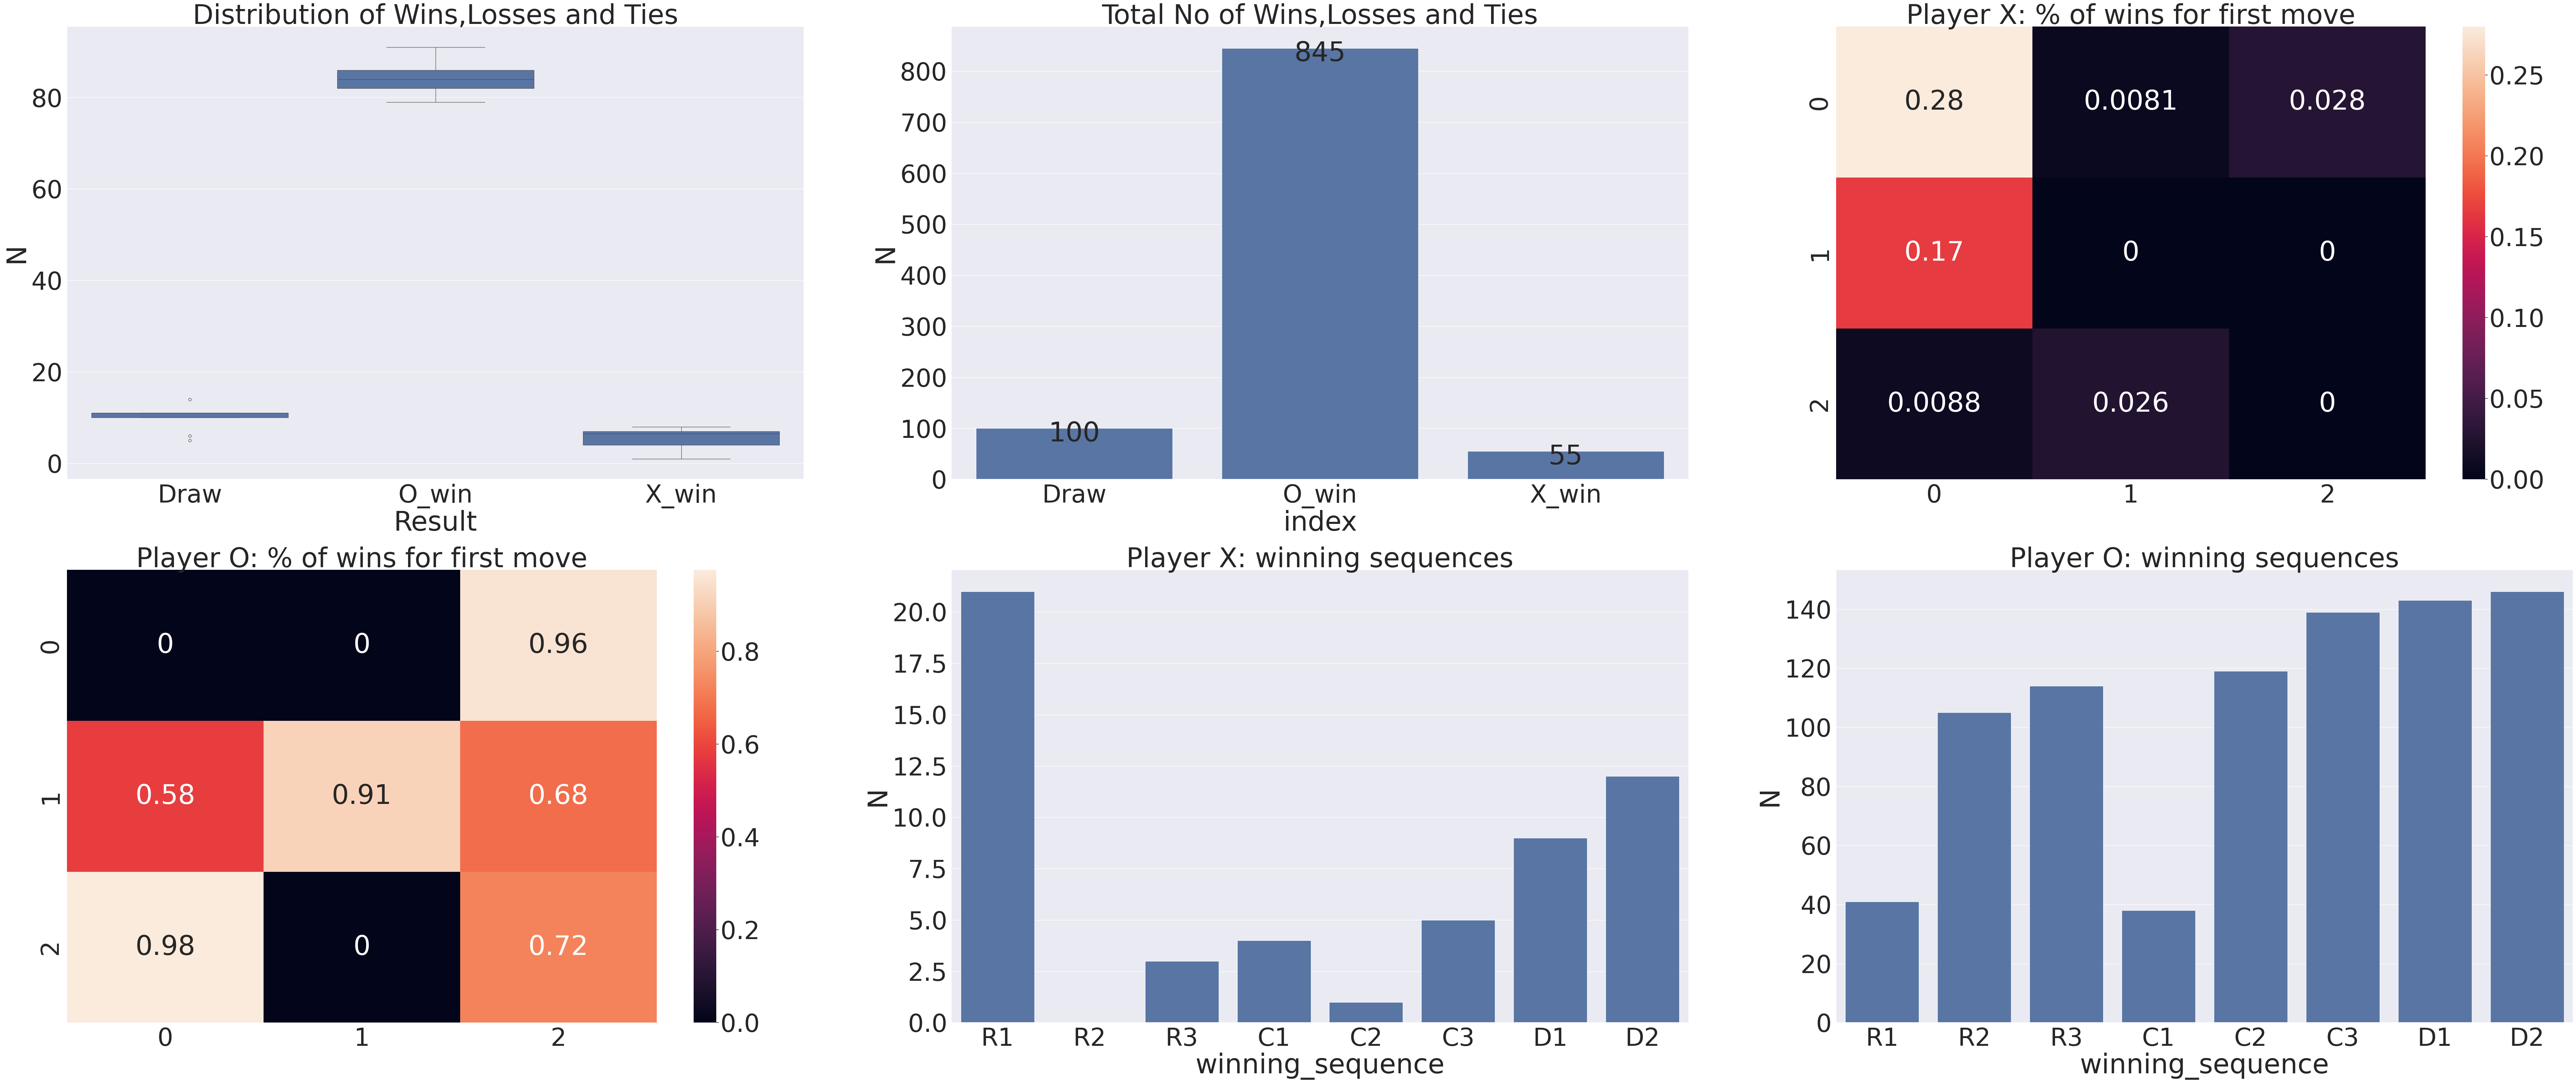

In [26]:
plot_results(win_statistics)

The above results indicate that Player O has learned to consistently beat  the random player X. What is interesting to note is that the RL approach results in Player O beating Player X more consistently (85%) of the time than when using the Minimax approach (~ 81%).

We can also see the player O consistently picks boxes along the leading diagonal as its first move. Most of its wins come from occupying the leading diagonal(D1) or the middle column(C2).

## Trained X vs Trained O

Now we will pit the two trained players against each other.

In [27]:
win_statistics = get_win_statistics(Q_X_trained,Q_O_trained,sets = 10, games_in_set = 100,X_strategy = 'greedy',O_strategy='greedy',eps_X=1.0,
                   eps_O=1.0)

 36%|███▌      | 36/100 [00:00<00:00, 178.46it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

100%|██████████| 100/100 [00:00<00:00, 202.73it/s]


          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  


 54%|█████▍    | 54/100 [00:00<00:00, 251.60it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

100%|██████████| 100/100 [00:00<00:00, 237.03it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O


 48%|████▊     | 48/100 [00:00<00:00, 223.99it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

 71%|███████   | 71/100 [00:00<00:00, 210.03it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

100%|██████████| 100/100 [00:00<00:00, 213.25it/s]



          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X


 25%|██▌       | 25/100 [00:00<00:00, 245.74it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

 50%|█████     | 50/100 [00:00<00:00, 218.83it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

 73%|███████▎  | 73/100 [00:00<00:00, 222.61it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

100%|██████████| 100/100 [00:00<00:00, 217.55it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X



  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X


 46%|████▌     | 46/100 [00:00<00:00, 216.83it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

100%|██████████| 100/100 [00:00<00:00, 214.81it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O


 50%|█████     | 50/100 [00:00<00:00, 232.73it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

100%|██████████| 100/100 [00:00<00:00, 233.70it/s]


          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  


 46%|████▌     | 46/100 [00:00<00:00, 221.92it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

 93%|█████████▎| 93/100 [00:00<00:00, 227.17it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

100%|██████████| 100/100 [00:00<00:00, 221.49it/s]


          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X


 23%|██▎       | 23/100 [00:00<00:00, 228.22it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

 48%|████▊     | 48/100 [00:00<00:00, 238.53it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X


 98%|█████████▊| 98/100 [00:00<00:00, 240.71it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

100%|██████████| 100/100 [00:00<00:00, 235.29it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X



 24%|██▍       | 24/100 [00:00<00:00, 237.70it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

 48%|████▊     | 48/100 [00:00<00:00, 194.33it/s]


          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  

 97%|█████████▋| 97/100 [00:00<00:00, 220.67it/s]


          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  

100%|██████████| 100/100 [00:00<00:00, 205.98it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X



 49%|████▉     | 49/100 [00:00<00:00, 241.70it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O

 97%|█████████▋| 97/100 [00:00<00:00, 218.80it/s]


          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  

100%|██████████| 100/100 [00:00<00:00, 223.06it/s]

          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X
          
   X  2  3
   O  O  O
   7  X  X


<Figure size 640x480 with 0 Axes>

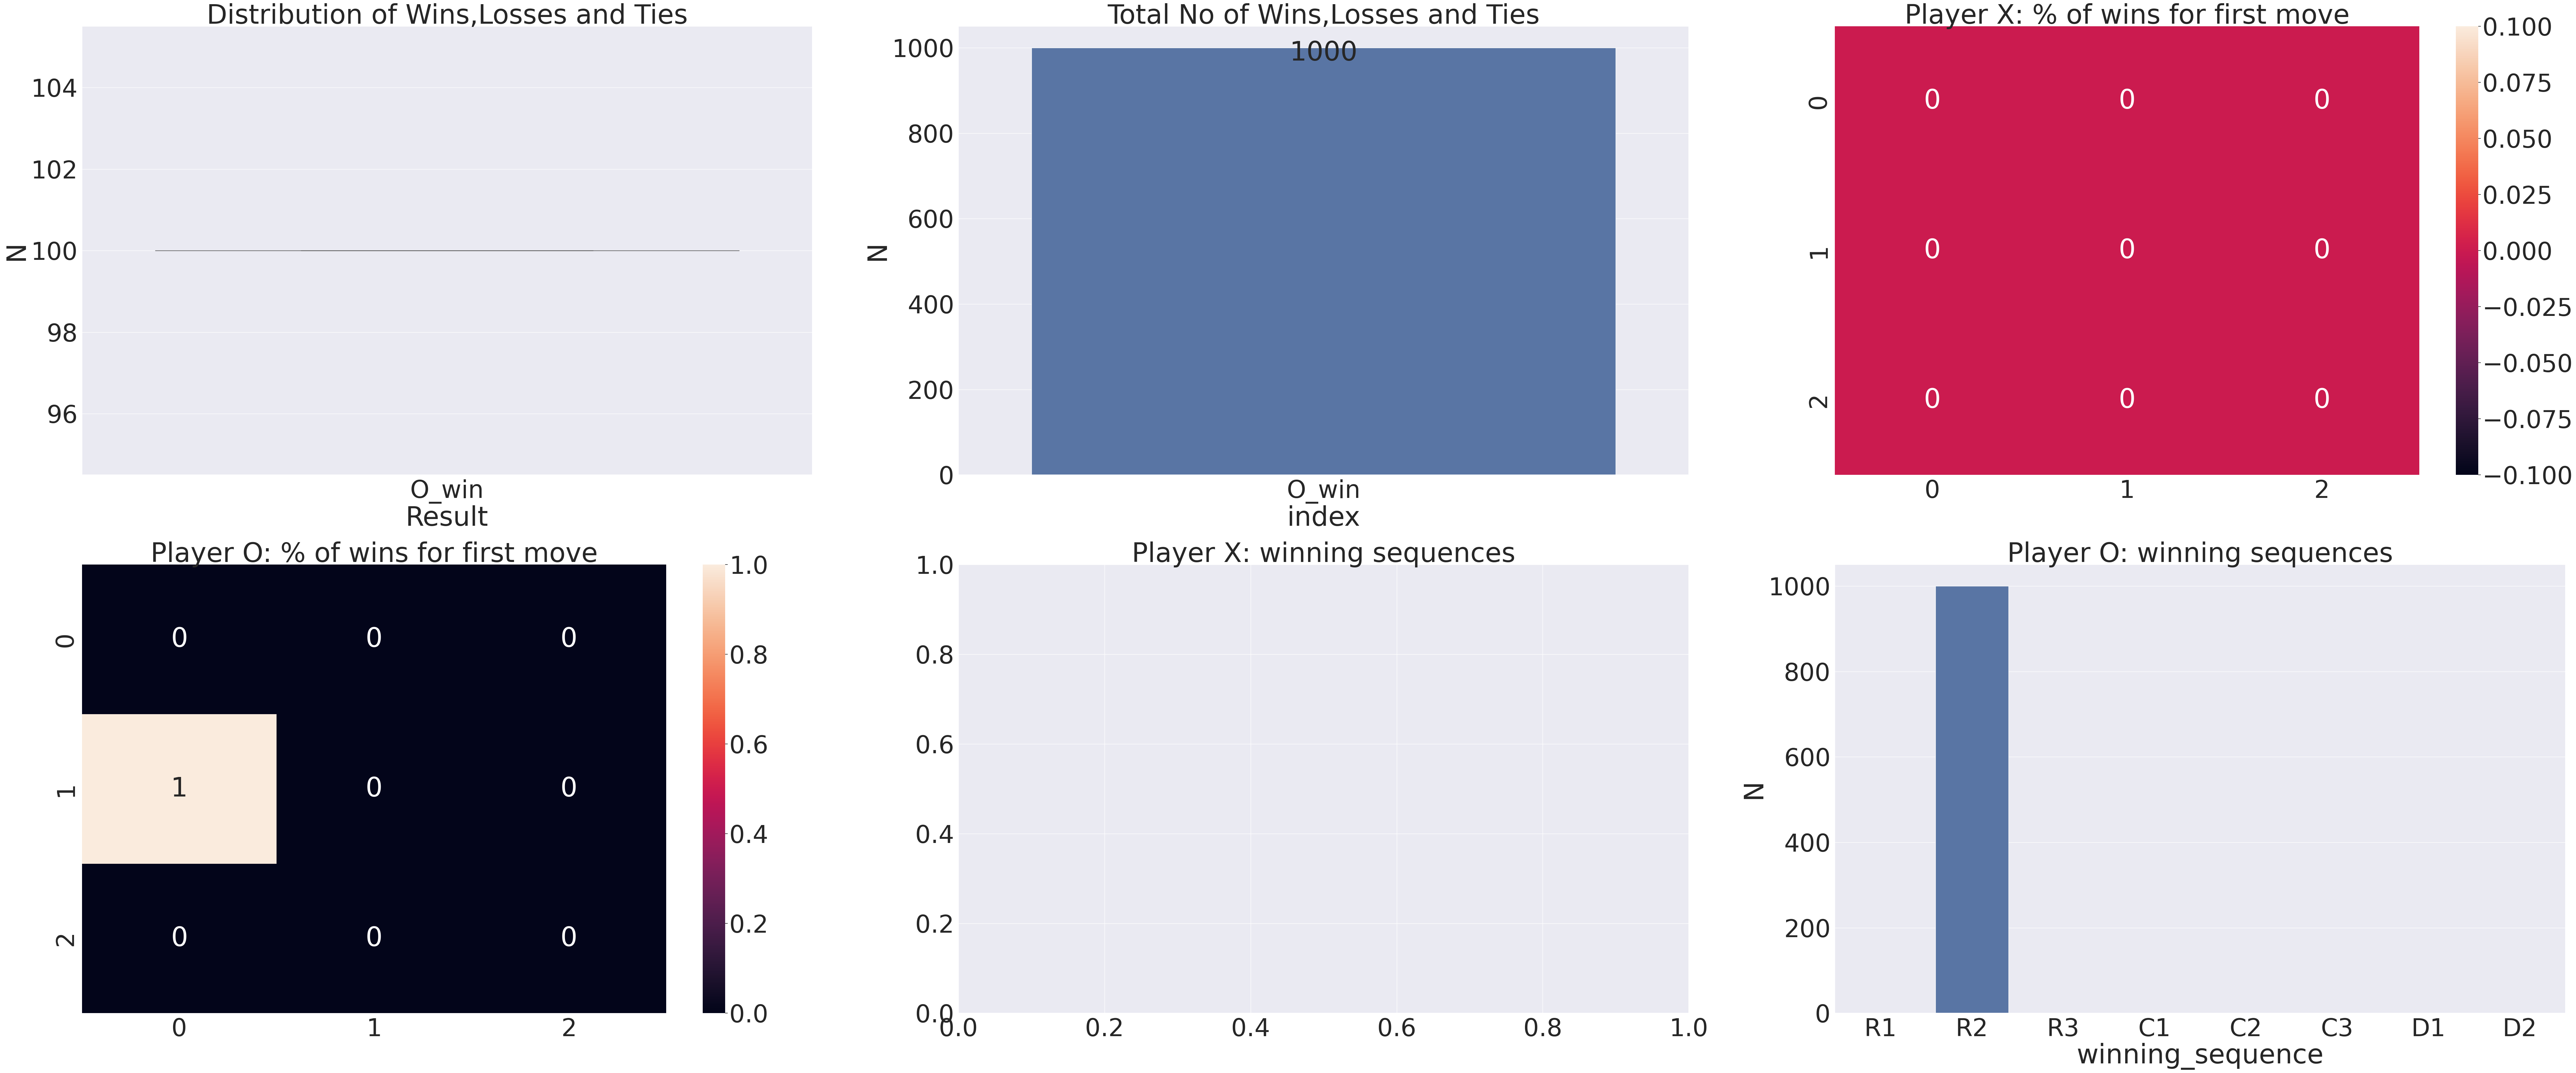

In [28]:
plot_results(win_statistics)

When the two trained agents face off, all games end in ties.

## Retrained X vs Trained O

Initially we trained X against a random O, now we will retrain X against a trained O

100%|██████████| 1000/1000 [00:05<00:00, 199.29it/s]


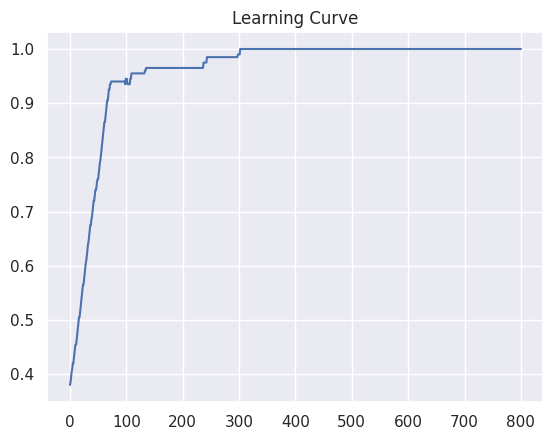

In [29]:
np.random.seed(1)
Q_X,Q_O,rewards_X,rewards_O = train(n_games=1000,alpha = 0.5, gamma = 0.9,train_X=True,train_O=False,is_random=False,Q_O = Q_O_trained)
Q_X_retrained = Q_X

In [30]:
win_statistics= get_win_statistics(Q_X_retrained,Q_O_trained,sets = 10, games_in_set = 100,X_strategy = 'greedy',\
                                   O_strategy='greedy',eps_X=1.0,eps_O=1.0)

 36%|███▌      | 36/100 [00:00<00:00, 177.08it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

 73%|███████▎  | 73/100 [00:00<00:00, 178.25it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

100%|██████████| 100/100 [00:00<00:00, 173.11it/s]


          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 40%|████      | 40/100 [00:00<00:00, 183.75it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

 59%|█████▉    | 59/100 [00:00<00:00, 178.87it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 96%|█████████▌| 96/100 [00:00<00:00, 175.98it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

100%|██████████| 100/100 [00:00<00:00, 173.83it/s]


          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 18%|█▊        | 18/100 [00:00<00:00, 167.08it/s]

          
   X  O  X
   O  O  X
   O  X  X


 35%|███▌      | 35/100 [00:00<00:00, 166.81it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

 74%|███████▍  | 74/100 [00:00<00:00, 181.63it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

100%|██████████| 100/100 [00:00<00:00, 171.99it/s]


          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 38%|███▊      | 38/100 [00:00<00:00, 186.22it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

 77%|███████▋  | 77/100 [00:00<00:00, 184.95it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

100%|██████████| 100/100 [00:00<00:00, 179.14it/s]


          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 38%|███▊      | 38/100 [00:00<00:00, 178.85it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

 58%|█████▊    | 58/100 [00:00<00:00, 186.06it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 77%|███████▋  | 77/100 [00:00<00:00, 179.21it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

 95%|█████████▌| 95/100 [00:00<00:00, 177.72it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


100%|██████████| 100/100 [00:00<00:00, 176.37it/s]


          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 39%|███▉      | 39/100 [00:00<00:00, 182.07it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 76%|███████▌  | 76/100 [00:00<00:00, 175.73it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

100%|██████████| 100/100 [00:00<00:00, 176.43it/s]


          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 19%|█▉        | 19/100 [00:00<00:00, 184.97it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 38%|███▊      | 38/100 [00:00<00:00, 184.98it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 57%|█████▋    | 57/100 [00:00<00:00, 178.83it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 75%|███████▌  | 75/100 [00:00<00:00, 177.25it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


100%|██████████| 100/100 [00:00<00:00, 179.23it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 36%|███▌      | 36/100 [00:00<00:00, 178.31it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

 74%|███████▍  | 74/100 [00:00<00:00, 179.23it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

100%|██████████| 100/100 [00:00<00:00, 175.93it/s]


          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 38%|███▊      | 38/100 [00:00<00:00, 184.20it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

 57%|█████▋    | 57/100 [00:00<00:00, 181.30it/s]


          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


 76%|███████▌  | 76/100 [00:00<00:00, 177.14it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

100%|██████████| 100/100 [00:00<00:00, 171.59it/s]


          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


  0%|          | 0/100 [00:00<?, ?it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X

 36%|███▌      | 36/100 [00:00<00:00, 177.03it/s]


          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  

 73%|███████▎  | 73/100 [00:00<00:00, 178.57it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X

100%|██████████| 100/100 [00:00<00:00, 176.57it/s]

          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X
          
   X  O  X
   O  O  X
   O  X  X


<Figure size 640x480 with 0 Axes>

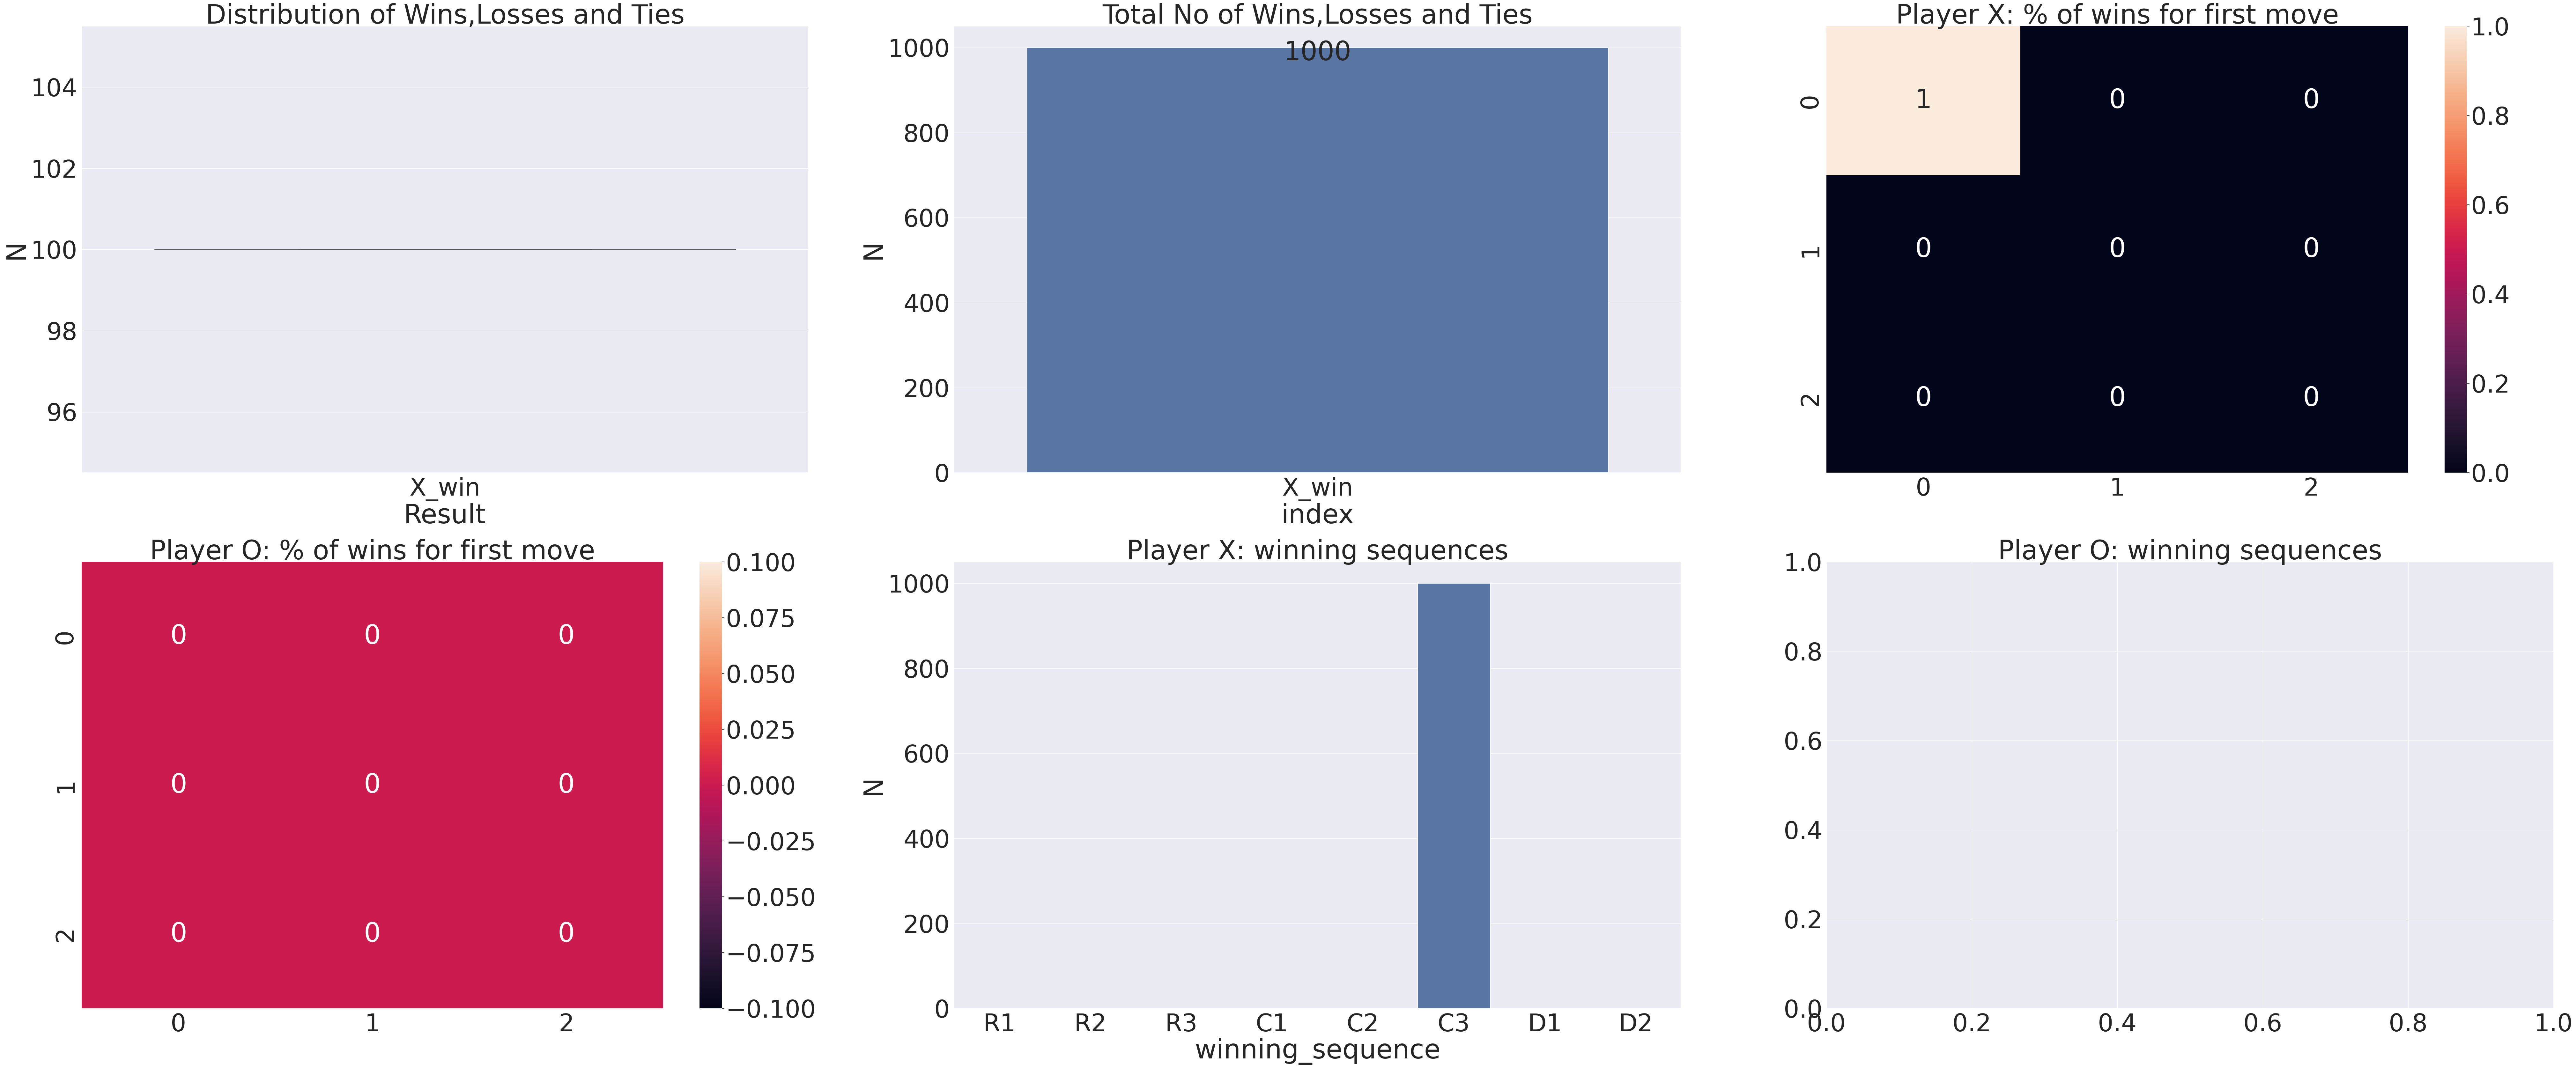

In [31]:
plot_results(win_statistics)

The re-trained player X beats the trained Player in 100% of the games.

## Conclusion

Reinforcement learning is a powerful paradigm in AI that can potentially be the key to solving several real world problems. Although the early days of RL has seen an almost exclusively focus on games, there are several practical applications of RL outside of games that industry is working on. At Oracle, we are working on a potentially category defining product that uses reinforcement learning at its core. Watch this space for more!

In [32]:
# Assuming Q_X is the Q-table for the agent as 'X'
t_board = TicTacToe(player='X', reward_type='goal_reward')
t_board.play_game(Q_X_retrained)

Game start!
          
   1  2  3
   4  5  6
   7  8  9
Agent's move:
          
   X  2  3
   4  5  6
   7  8  9
Your move:
Choose your move (1-9): 5
          
   X  2  3
   4  O  6
   7  8  9
Agent's move:
          
   X  2  3
   4  O  6
   7  X  9
Your move:
Choose your move (1-9): 6
          
   X  2  3
   4  O  O
   7  X  9
Agent's move:
          
   X  X  3
   4  O  O
   7  X  9
Your move:
Choose your move (1-9): 4
          
   X  X  3
   O  O  O
   7  X  9
You win!
